# Tarea 4, Josue Arrieta y Felipe Cubero

## Predicción de admisiones estudiantiles con KERAS.

### Mi primera red neuronal, mejorar el Test Cambiando Hiperparametros

Información de la UCLA basada en 3 datos:

   - GRE Scores (Test)
   - GPA Scores (Grades)
   - Class rank (1-4)

El dataset original se encuentra en: http://www.ats.ucla.edu/ y en este mismo apartado corresponde al file *binary.csv* extraido directaemten del sitio.

La red neuronal se corre utilizando Keras. 

# Primera Parte: Importar el set de datos

Antes de agregar el set de datos se van a bloquear los "Warnings" que se desplieguan cada vez que se corre un codigo. 

Posteriormente, se importa la libreria Pandas, para poder manipular el set de datos. Por ultimo se asigna una nueva variable "data" en la que se va a contener, se imprimen los datos para visualizarlos. 

In [2]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
data = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')
print(data)

     admit  gre   gpa  rank
0        0  380  3.61     3
1        1  660  3.67     3
2        1  800  4.00     1
3        1  640  3.19     4
4        0  520  2.93     4
..     ...  ...   ...   ...
395      0  620  4.00     2
396      0  560  3.04     3
397      0  460  2.63     2
398      0  700  3.65     2
399      0  600  3.89     3

[400 rows x 4 columns]


# Primera Parte: Visualizacion de los datos

Luego de importar los datos, es importante entender como se comportan. Una forma muy sencilla de realizarlo es realizar un mapeo y entender la dificultad del set de datos. 

Para ello se realiza un grafico con los de los factores del arreglo: Gre y gpa como variable x y adim como variable Y.  Se utiliza libreria matplotlib para poder graficar, ademas se utilizar un grafico tipo ggplot, el cual muestra una distribucion de puntos. 

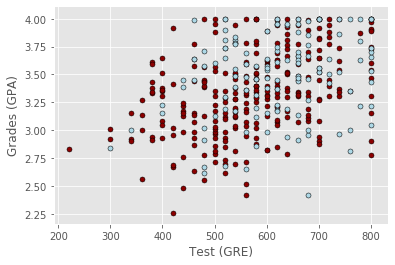

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import numpy as np
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'darkred', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'lightblue', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
plot_points(data)
plt.show()

En apariencia GRADES y TEST no parecen tener relación clara. Del grafico no se puede encontrar alguna distribucion de los datos. 

El grafico anterior contenia mucha informacion, pues  tenia implicito la variable Rank, ahora se va a ejecutar el mismo grafico utilizando una segregacion por rank, para ello se van a generar entidades con el nombre de data_rank1, ...2, ...3 y ...4. Esto con el fin de poder observar variaciones por rango de colegio. La hipotesis es que el rango de colegio impacta el estar o no aceptado en la universidad. 

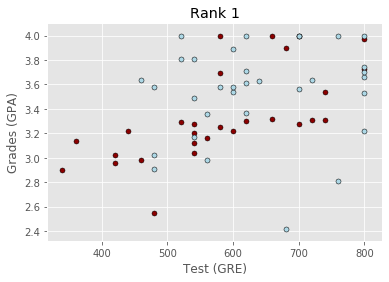

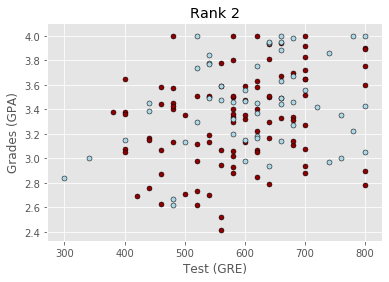

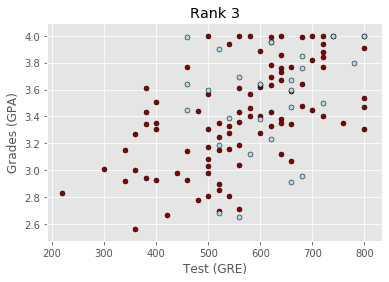

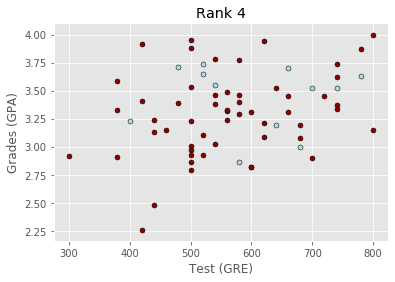

In [3]:
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

Al separar por Rank, se logra observar que que hay un impacto en la salidas, para el rango 1 aunmento los admitidos y parace haber mayor proporcion de solicitantes respecto al rango 4. 

# Segunda parte: preprocesado de los datos.

- Se remueven NaNs
- One-hot encode con rank
- Normalizacion de GRE y GPA, de manera que queden en el rango (0,1)
- Se parten los datos en input X - labels y

In [5]:
import keras
from keras.utils import np_utils

# remove NaNs
data = data.fillna(0)

# One-hot encoding the rank
processed_data = pd.get_dummies(data, columns=['rank'])

# Normalizing the gre and the gpa scores to be in the interval (0,1)
processed_data["gre"] = processed_data["gre"]/800
processed_data["gpa"] = processed_data["gpa"]/4

# Splitting the data input into X, and the labels y 
X = np.array(processed_data)[:,1:]
X = X.astype('float32')
y = keras.utils.to_categorical(data["admit"],2)

In [6]:
# Checking that the input and output look correct
print("Shape of X:", X.shape)
print("\nShape of y:", y.shape)
print("\nFirst 10 rows of X")
print(X[:10])
print("\nFirst 10 rows of y")
print(y[:10])

Shape of X: (400, 6)

Shape of y: (400, 2)

First 10 rows of X
[[0.475  0.9025 0.     0.     1.     0.    ]
 [0.825  0.9175 0.     0.     1.     0.    ]
 [1.     1.     1.     0.     0.     0.    ]
 [0.8    0.7975 0.     0.     0.     1.    ]
 [0.65   0.7325 0.     0.     0.     1.    ]
 [0.95   0.75   0.     1.     0.     0.    ]
 [0.7    0.745  1.     0.     0.     0.    ]
 [0.5    0.77   0.     1.     0.     0.    ]
 [0.675  0.8475 0.     0.     1.     0.    ]
 [0.875  0.98   0.     1.     0.     0.    ]]

First 10 rows of y
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


# Tercera Parte: Particion de los datos en treaining y testing.

In [7]:
# break training set into training and validation sets
(X_train, X_test) = X[50:], X[:50]
(y_train, y_test) = y[50:], y[:50]

# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (350, 6)
350 train samples
50 test samples


# Cuarta Parte: Definición de la arquitectura de la red neuronal:

In [8]:
# Imports
import warnings 
warnings.filterwarnings("ignore")
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model

model = Sequential()      #Utilizamos un modelo secuencial, segun el modelo visto en clase

model.add(Dense(128, input_dim=6))   #Defuinicion de la primera capa se eligieron 128 nodulos a conveniencia,
                                    #dado que para el set de training se tienen350 datos de entrada, la dimension 
                                   #de la data es de 6"
model.add(Activation('relu'))   #se utiliza funcion relu como funcion de activacion 

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('sigmoid'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

W0907 12:03:48.400493 36400 deprecation_wrapper.py:119] From C:\Users\Felipe\Miniconda3\envs\py3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0907 12:03:48.432409 36400 deprecation_wrapper.py:119] From C:\Users\Felipe\Miniconda3\envs\py3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0907 12:03:48.434404 36400 deprecation_wrapper.py:119] From C:\Users\Felipe\Miniconda3\envs\py3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0907 12:03:48.497235 36400 deprecation_wrapper.py:119] From C:\Users\Felipe\Miniconda3\envs\py3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0907 12:03:48.524162 36400 deprecat

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


# Quinta Parte: Entrenamiento del modelo

In [9]:
# Training the model
import warnings 
warnings.filterwarnings("ignore")
model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=1)
#model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

W0907 12:03:55.573229 36400 deprecation.py:323] From C:\Users\Felipe\Miniconda3\envs\py3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0907 12:03:55.633068 36400 deprecation_wrapper.py:119] From C:\Users\Felipe\Miniconda3\envs\py3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/200


InternalError: 2 root error(s) found.
  (0) Internal: Blas GEMM launch failed : a.shape=(100, 6), b.shape=(6, 128), m=100, n=128, k=6
	 [[{{node dense_1/MatMul}}]]
  (1) Internal: Blas GEMM launch failed : a.shape=(100, 6), b.shape=(6, 128), m=100, n=128, k=6
	 [[{{node dense_1/MatMul}}]]
	 [[loss/mul/_87]]
0 successful operations.
0 derived errors ignored.

# Sexta parte: Score del modelo

In [10]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 297us/step

 Training Accuracy: 0.7285714278902327
50/50 [==============================] - 0s 80us/step

 Testing Accuracy: 0.6599999976158142


# Primer intento:
- Cambiando funicones de optimizacion a Tanh, se indaga el impacto de modificar la funcion de ativacion en el modelo.



In [24]:
model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('tanh')) #usando tanh

model.add(Dense(64))
model.add(Activation('tanh')) #usando tanh

model.add(Dense(32))
model.add(Activation('tanh')) #usando tanh

model.add(Dense(2))
model.add(Activation('tanh')) #usando tanh

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               896       
_________________________________________________________________
activation_14 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_15 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
activation_16 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 66        
__________

In [25]:
# Training the model
#model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
model.fit(X_train, y_train, epochs=500, batch_size=100, verbose=1)

In [26]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 857us/step

 Training Accuracy: 0.6971428568022592
50/50 [==============================] - 0s 80us/step

 Testing Accuracy: 0.5599999976158142


# No mejoro, respecto al original. Empeoro el entrenamiento y el accurency fue mucho menor al esperado. La funcion de tangente hiperbolica no tuvo un impacto correcto en el proceso.

# Segundo intento 

- Utilizar funciones relu y sigmoid, segun secuencia original
- Utilizar dropout, de 0.3 de forma decendiente. Esto implica que el 30% de los nodulos se van a desactivar en cada corrida. 
- Epoch a 600, se van a probar 600 veces los datos en el test. 
- Batch 200, los datos se van a partir en grupos de 200. 


In [28]:
import warnings 
warnings.filterwarnings("ignore")

model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.3))       #Utilizando dropout

model.add(Dense(64))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.2))       #Utilizando dropout

model.add(Dense(32))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(2))
model.add(Activation('sigmoid')) #usando tanh


model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               896       
_________________________________________________________________
activation_22 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_23 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
__________

In [29]:

model.fit(X_train, y_train, epochs=600, batch_size=200, verbose=0)

In [30]:
 #Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 1ms/step

 Training Accuracy: 0.7142857136045183
50/50 [==============================] - 0s 80us/step

 Testing Accuracy: 0.6400000095367432


# Se mantuvo igual a la del codigo original, no hubo mejora

# Tercer intento
- Utilizar softplus en capas internals y sigmoid en la salida, se continua modificando las funciones de activacion, se cambia la estretegia incluyendo una nueva funcion de activacion Softplus. 
- Dropout( decendiente iniciando en 0.3) 
- Epochs a 50
- Batch de 25

In [31]:
model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('softplus')) #usando relu
model.add(Dropout(0.3))       #Utilizando dropout

model.add(Dense(64))
model.add(Activation('softplus')) #usando relu
model.add(Dropout(0.2))       #Utilizando dropout

model.add(Dense(32))
model.add(Activation('softplus')) #usando relu
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(2))
model.add(Activation('sigmoid')) #usando tanh


model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               896       
_________________________________________________________________
activation_26 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_27 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
__________

In [32]:
model.fit(X_train, y_train, epochs=50, batch_size=25, verbose=0)

In [33]:
#Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 1ms/step

 Training Accuracy: 0.6999999996594021
50/50 [==============================] - 0s 80us/step

 Testing Accuracy: 0.5599999976158142


# Empeoro el modelo, por lo que se va a modificar el modelo para intentar subirlo. Se descarta la funcion Softplus como una mejora.

# Cuarto intento
- Funciones de ativacion relu para capas internas y sigmoid para externa
- Dropout decendiente 0.3
- Epochs a 50 se baja la cantidad de epochs para observar el efecto de menor repeticiones en el modelo. 
- Batch de 25, se redujo la cantidad de batch para no bajar el nievle de entrenamiento. 



In [34]:
model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.3))       #Utilizando dropout

model.add(Dense(64))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.2))       #Utilizando dropout

model.add(Dense(32))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(2))
model.add(Activation('sigmoid')) #usando tanh


model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               896       
_________________________________________________________________
activation_30 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_31 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
__________

In [35]:
model.fit(X_train, y_train, epochs=50, batch_size=25, verbose=0)

In [36]:
#Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 994us/step

 Training Accuracy: 0.7085714282308306
50/50 [==============================] - 0s 160us/step

 Testing Accuracy: 0.6400000095367432


# Mejoro respecto a la corrida anterior pero no es suficiente. Se correra  eliminando la capa intermedia. (32 entidades)

# Quinto intento
- Se elimina capa interna de 32 entidades, se elimina la capa de 32 neuronas.
- Funciones de ativacion relu para capas internas y sigmoid para externa
- Dropout decendiente 0.3
- Epochs a 50
- Batch de 25


In [37]:
model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.3))       #Utilizando dropout

model.add(Dense(64))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.2))       #Utilizando dropout

model.add(Dense(2))
model.add(Activation('sigmoid')) #usando tanh


model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 128)               896       
_________________________________________________________________
activation_34 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_35 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 130       
__________

In [38]:
model.fit(X_train, y_train, epochs=50, batch_size=25, verbose=0)

In [39]:
#Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 1ms/step

 Training Accuracy: 0.7142857163293022
50/50 [==============================] - 0s 160us/step

 Testing Accuracy: 0.6600000095367432


# Mejoro pero el modelo esta menor al obtenido en clase, se va a alterar el numero de entidades iniciales en cada capa para ver el impacto de la cantidad de neuronas

# Sexto intento: 

- Se elimina capa interna de 32 entidades. 

## se aumenta la cantidad de neuronas por capa para observar el efecto de la cantidad de neuronas.
- Primer capa con 300 nodulos, 
- Segunda capa con 150 nodulos
- Funciones de ativacion relu para capas internas y sigmoid para externa
- Dropout decendiente 0.3
- Epochs a 10, se bajan para ver el impacto en el training. 
- Batch de 15


In [40]:
model = Sequential()

model.add(Dense(300, input_dim=6))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.3))       #Utilizando dropout

model.add(Dense(150))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.2))       #Utilizando dropout

model.add(Dense(2))
model.add(Activation('sigmoid')) #usando tanh


model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 300)               2100      
_________________________________________________________________
activation_37 (Activation)   (None, 300)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 150)               45150     
_________________________________________________________________
activation_38 (Activation)   (None, 150)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 302       
__________

### En el training verbose muestra  en 0 solo que se ejecuto el training en 1, el progreso y 2 el epchs que se han hecho. 

In [41]:
model.fit(X_train, y_train, epochs=10, batch_size=15, verbose=0)

In [42]:
#Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 1ms/step

 Training Accuracy: 0.7057142853736877
50/50 [==============================] - 0s 160us/step

 Testing Accuracy: 0.62


# No hubo un impacto favorable. 

#  Septimo intento
- Se elimina capa interna de 32 entidades. 
- Primer capa con 300 nodulos
- Segunda capa con 150 nodulos
- Funciones de ativacion relu para capas internas y sigmoid para externa
- Dropout decendiente 0.3
- Epochs a 2000 se aumenta el la cantidad de veces que se prueban los datos. 
- Batch de 10



In [43]:
model = Sequential()

model.add(Dense(300, input_dim=6))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.3))       #Utilizando dropout

model.add(Dense(150))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.2))       #Utilizando dropout

model.add(Dense(2))
model.add(Activation('sigmoid')) #usando tanh


model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 300)               2100      
_________________________________________________________________
activation_40 (Activation)   (None, 300)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 150)               45150     
_________________________________________________________________
activation_41 (Activation)   (None, 150)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 2)                 302       
__________

In [44]:
model.fit(X_train, y_train, epochs=2000, batch_size=10, verbose=2)

Epoch 1/2000
 - 1s - loss: 0.6213 - acc: 0.6914
Epoch 2/2000
 - 0s - loss: 0.5993 - acc: 0.7000
Epoch 3/2000
 - 0s - loss: 0.5918 - acc: 0.7086
Epoch 4/2000
 - 0s - loss: 0.5885 - acc: 0.6829
Epoch 5/2000
 - 0s - loss: 0.5979 - acc: 0.6914
Epoch 6/2000
 - 0s - loss: 0.5917 - acc: 0.7000
Epoch 7/2000
 - 0s - loss: 0.5929 - acc: 0.7029
Epoch 8/2000
 - 0s - loss: 0.5875 - acc: 0.7171
Epoch 9/2000
 - 0s - loss: 0.5929 - acc: 0.7057
Epoch 10/2000
 - 0s - loss: 0.5911 - acc: 0.6914
Epoch 11/2000
 - 0s - loss: 0.5857 - acc: 0.7229
Epoch 12/2000
 - 0s - loss: 0.5836 - acc: 0.6971
Epoch 13/2000
 - 0s - loss: 0.5853 - acc: 0.7029
Epoch 14/2000
 - 0s - loss: 0.5795 - acc: 0.7057
Epoch 15/2000
 - 0s - loss: 0.5922 - acc: 0.7029
Epoch 16/2000
 - 0s - loss: 0.5885 - acc: 0.6914
Epoch 17/2000
 - 0s - loss: 0.5853 - acc: 0.7029
Epoch 18/2000
 - 0s - loss: 0.5804 - acc: 0.7114
Epoch 19/2000
 - 0s - loss: 0.5864 - acc: 0.6971
Epoch 20/2000
 - 0s - loss: 0.5854 - acc: 0.7286
Epoch 21/2000
 - 0s - loss: 0

 - 0s - loss: 0.5623 - acc: 0.7229
Epoch 168/2000
 - 0s - loss: 0.5701 - acc: 0.7171
Epoch 169/2000
 - 0s - loss: 0.5700 - acc: 0.7086
Epoch 170/2000
 - 0s - loss: 0.5658 - acc: 0.7114
Epoch 171/2000
 - 0s - loss: 0.5780 - acc: 0.7086
Epoch 172/2000
 - 0s - loss: 0.5652 - acc: 0.7200
Epoch 173/2000
 - 0s - loss: 0.5705 - acc: 0.7114
Epoch 174/2000
 - 0s - loss: 0.5685 - acc: 0.7057
Epoch 175/2000
 - 0s - loss: 0.5708 - acc: 0.7057
Epoch 176/2000
 - 0s - loss: 0.5718 - acc: 0.7200
Epoch 177/2000
 - 0s - loss: 0.5681 - acc: 0.7200
Epoch 178/2000
 - 0s - loss: 0.5590 - acc: 0.7143
Epoch 179/2000
 - 0s - loss: 0.5681 - acc: 0.7143
Epoch 180/2000
 - 0s - loss: 0.5706 - acc: 0.7229
Epoch 181/2000
 - 0s - loss: 0.5666 - acc: 0.7171
Epoch 182/2000
 - 0s - loss: 0.5692 - acc: 0.7200
Epoch 183/2000
 - 0s - loss: 0.5618 - acc: 0.7200
Epoch 184/2000
 - 0s - loss: 0.5602 - acc: 0.7114
Epoch 185/2000
 - 0s - loss: 0.5573 - acc: 0.7086
Epoch 186/2000
 - 0s - loss: 0.5634 - acc: 0.7057
Epoch 187/2000


 - 0s - loss: 0.5755 - acc: 0.7086
Epoch 332/2000
 - 0s - loss: 0.5671 - acc: 0.7086
Epoch 333/2000
 - 0s - loss: 0.5661 - acc: 0.7229
Epoch 334/2000
 - 0s - loss: 0.5737 - acc: 0.7086
Epoch 335/2000
 - 0s - loss: 0.5631 - acc: 0.7229
Epoch 336/2000
 - 0s - loss: 0.5670 - acc: 0.7200
Epoch 337/2000
 - 0s - loss: 0.5649 - acc: 0.7171
Epoch 338/2000
 - 0s - loss: 0.5671 - acc: 0.7200
Epoch 339/2000
 - 0s - loss: 0.5593 - acc: 0.7229
Epoch 340/2000
 - 0s - loss: 0.5551 - acc: 0.7057
Epoch 341/2000
 - 0s - loss: 0.5662 - acc: 0.7229
Epoch 342/2000
 - 0s - loss: 0.5682 - acc: 0.7086
Epoch 343/2000
 - 0s - loss: 0.5532 - acc: 0.7086
Epoch 344/2000
 - 0s - loss: 0.5627 - acc: 0.7229
Epoch 345/2000
 - 0s - loss: 0.5696 - acc: 0.7143
Epoch 346/2000
 - 0s - loss: 0.5675 - acc: 0.7229
Epoch 347/2000
 - 0s - loss: 0.5700 - acc: 0.7114
Epoch 348/2000
 - 0s - loss: 0.5609 - acc: 0.7171
Epoch 349/2000
 - 0s - loss: 0.5588 - acc: 0.7086
Epoch 350/2000
 - 0s - loss: 0.5753 - acc: 0.7114
Epoch 351/2000


 - 0s - loss: 0.5640 - acc: 0.7229
Epoch 496/2000
 - 0s - loss: 0.5578 - acc: 0.7143
Epoch 497/2000
 - 0s - loss: 0.5591 - acc: 0.7200
Epoch 498/2000
 - 0s - loss: 0.5622 - acc: 0.7257
Epoch 499/2000
 - 0s - loss: 0.5563 - acc: 0.7086
Epoch 500/2000
 - 0s - loss: 0.5638 - acc: 0.7229
Epoch 501/2000
 - 0s - loss: 0.5515 - acc: 0.7171
Epoch 502/2000
 - 0s - loss: 0.5659 - acc: 0.7086
Epoch 503/2000
 - 0s - loss: 0.5632 - acc: 0.7143
Epoch 504/2000
 - 0s - loss: 0.5512 - acc: 0.7143
Epoch 505/2000
 - 0s - loss: 0.5624 - acc: 0.7200
Epoch 506/2000
 - 0s - loss: 0.5658 - acc: 0.7200
Epoch 507/2000
 - 0s - loss: 0.5601 - acc: 0.7114
Epoch 508/2000
 - 0s - loss: 0.5602 - acc: 0.7114
Epoch 509/2000
 - 0s - loss: 0.5582 - acc: 0.7171
Epoch 510/2000
 - 0s - loss: 0.5636 - acc: 0.7114
Epoch 511/2000
 - 0s - loss: 0.5595 - acc: 0.7143
Epoch 512/2000
 - 0s - loss: 0.5554 - acc: 0.7171
Epoch 513/2000
 - 0s - loss: 0.5591 - acc: 0.7171
Epoch 514/2000
 - 0s - loss: 0.5577 - acc: 0.7143
Epoch 515/2000


 - 0s - loss: 0.5571 - acc: 0.7114
Epoch 660/2000
 - 0s - loss: 0.5568 - acc: 0.7200
Epoch 661/2000
 - 0s - loss: 0.5579 - acc: 0.7171
Epoch 662/2000
 - 0s - loss: 0.5662 - acc: 0.7114
Epoch 663/2000
 - 0s - loss: 0.5691 - acc: 0.7200
Epoch 664/2000
 - 0s - loss: 0.5541 - acc: 0.7229
Epoch 665/2000
 - 0s - loss: 0.5526 - acc: 0.7171
Epoch 666/2000
 - 0s - loss: 0.5652 - acc: 0.7114
Epoch 667/2000
 - 0s - loss: 0.5570 - acc: 0.7086
Epoch 668/2000
 - 0s - loss: 0.5491 - acc: 0.7200
Epoch 669/2000
 - 0s - loss: 0.5538 - acc: 0.7143
Epoch 670/2000
 - 0s - loss: 0.5548 - acc: 0.7057
Epoch 671/2000
 - 0s - loss: 0.5533 - acc: 0.7257
Epoch 672/2000
 - 0s - loss: 0.5550 - acc: 0.7086
Epoch 673/2000
 - 0s - loss: 0.5493 - acc: 0.7171
Epoch 674/2000
 - 0s - loss: 0.5527 - acc: 0.7171
Epoch 675/2000
 - 0s - loss: 0.5575 - acc: 0.7143
Epoch 676/2000
 - 0s - loss: 0.5540 - acc: 0.7200
Epoch 677/2000
 - 0s - loss: 0.5599 - acc: 0.7143
Epoch 678/2000
 - 0s - loss: 0.5517 - acc: 0.7114
Epoch 679/2000


 - 0s - loss: 0.5559 - acc: 0.7057
Epoch 824/2000
 - 0s - loss: 0.5361 - acc: 0.7229
Epoch 825/2000
 - 0s - loss: 0.5509 - acc: 0.7314
Epoch 826/2000
 - 0s - loss: 0.5553 - acc: 0.7114
Epoch 827/2000
 - 0s - loss: 0.5445 - acc: 0.7171
Epoch 828/2000
 - 0s - loss: 0.5589 - acc: 0.7086
Epoch 829/2000
 - 0s - loss: 0.5378 - acc: 0.7229
Epoch 830/2000
 - 0s - loss: 0.5460 - acc: 0.7000
Epoch 831/2000
 - 0s - loss: 0.5486 - acc: 0.7200
Epoch 832/2000
 - 0s - loss: 0.5579 - acc: 0.7143
Epoch 833/2000
 - 0s - loss: 0.5517 - acc: 0.7200
Epoch 834/2000
 - 0s - loss: 0.5624 - acc: 0.7143
Epoch 835/2000
 - 0s - loss: 0.5626 - acc: 0.7143
Epoch 836/2000
 - 0s - loss: 0.5510 - acc: 0.7171
Epoch 837/2000
 - 0s - loss: 0.5504 - acc: 0.7171
Epoch 838/2000
 - 0s - loss: 0.5540 - acc: 0.7114
Epoch 839/2000
 - 0s - loss: 0.5636 - acc: 0.7171
Epoch 840/2000
 - 0s - loss: 0.5564 - acc: 0.7171
Epoch 841/2000
 - 0s - loss: 0.5530 - acc: 0.7143
Epoch 842/2000
 - 0s - loss: 0.5578 - acc: 0.7200
Epoch 843/2000


 - 0s - loss: 0.5431 - acc: 0.7200
Epoch 988/2000
 - 0s - loss: 0.5622 - acc: 0.7086
Epoch 989/2000
 - 0s - loss: 0.5518 - acc: 0.7200
Epoch 990/2000
 - 0s - loss: 0.5444 - acc: 0.7257
Epoch 991/2000
 - 0s - loss: 0.5559 - acc: 0.7200
Epoch 992/2000
 - 0s - loss: 0.5404 - acc: 0.7257
Epoch 993/2000
 - 0s - loss: 0.5423 - acc: 0.7114
Epoch 994/2000
 - 0s - loss: 0.5733 - acc: 0.7171
Epoch 995/2000
 - 0s - loss: 0.5382 - acc: 0.7343
Epoch 996/2000
 - 0s - loss: 0.5499 - acc: 0.7114
Epoch 997/2000
 - 0s - loss: 0.5582 - acc: 0.7171
Epoch 998/2000
 - 0s - loss: 0.5529 - acc: 0.7200
Epoch 999/2000
 - 0s - loss: 0.5385 - acc: 0.7171
Epoch 1000/2000
 - 0s - loss: 0.5464 - acc: 0.7200
Epoch 1001/2000
 - 0s - loss: 0.5611 - acc: 0.7314
Epoch 1002/2000
 - 0s - loss: 0.5450 - acc: 0.7171
Epoch 1003/2000
 - 0s - loss: 0.5364 - acc: 0.7229
Epoch 1004/2000
 - 0s - loss: 0.5447 - acc: 0.7229
Epoch 1005/2000
 - 0s - loss: 0.5663 - acc: 0.7171
Epoch 1006/2000
 - 0s - loss: 0.5600 - acc: 0.7200
Epoch 10

 - 0s - loss: 0.5457 - acc: 0.7171
Epoch 1149/2000
 - 0s - loss: 0.5571 - acc: 0.7029
Epoch 1150/2000
 - 0s - loss: 0.5622 - acc: 0.7400
Epoch 1151/2000
 - 0s - loss: 0.5392 - acc: 0.7286
Epoch 1152/2000
 - 0s - loss: 0.5510 - acc: 0.7029
Epoch 1153/2000
 - 0s - loss: 0.5535 - acc: 0.7143
Epoch 1154/2000
 - 0s - loss: 0.5733 - acc: 0.7114
Epoch 1155/2000
 - 0s - loss: 0.5499 - acc: 0.7286
Epoch 1156/2000
 - 0s - loss: 0.5464 - acc: 0.7143
Epoch 1157/2000
 - 0s - loss: 0.5491 - acc: 0.7114
Epoch 1158/2000
 - 0s - loss: 0.5639 - acc: 0.7000
Epoch 1159/2000
 - 0s - loss: 0.5458 - acc: 0.7229
Epoch 1160/2000
 - 0s - loss: 0.5657 - acc: 0.7200
Epoch 1161/2000
 - 0s - loss: 0.5567 - acc: 0.7057
Epoch 1162/2000
 - 0s - loss: 0.5540 - acc: 0.7257
Epoch 1163/2000
 - 0s - loss: 0.5458 - acc: 0.7257
Epoch 1164/2000
 - 0s - loss: 0.5669 - acc: 0.7371
Epoch 1165/2000
 - 0s - loss: 0.5502 - acc: 0.7229
Epoch 1166/2000
 - 0s - loss: 0.5504 - acc: 0.7257
Epoch 1167/2000
 - 0s - loss: 0.5618 - acc: 0.7

Epoch 1309/2000
 - 0s - loss: 0.5518 - acc: 0.7200
Epoch 1310/2000
 - 0s - loss: 0.5554 - acc: 0.7086
Epoch 1311/2000
 - 0s - loss: 0.5365 - acc: 0.7143
Epoch 1312/2000
 - 0s - loss: 0.5577 - acc: 0.7229
Epoch 1313/2000
 - 0s - loss: 0.5653 - acc: 0.7286
Epoch 1314/2000
 - 0s - loss: 0.5663 - acc: 0.7114
Epoch 1315/2000
 - 0s - loss: 0.5547 - acc: 0.7200
Epoch 1316/2000
 - 0s - loss: 0.5403 - acc: 0.7343
Epoch 1317/2000
 - 0s - loss: 0.5489 - acc: 0.7143
Epoch 1318/2000
 - 0s - loss: 0.5603 - acc: 0.7171
Epoch 1319/2000
 - 0s - loss: 0.5589 - acc: 0.7114
Epoch 1320/2000
 - 0s - loss: 0.5350 - acc: 0.7229
Epoch 1321/2000
 - 0s - loss: 0.5586 - acc: 0.7286
Epoch 1322/2000
 - 0s - loss: 0.5523 - acc: 0.7400
Epoch 1323/2000
 - 0s - loss: 0.5446 - acc: 0.7114
Epoch 1324/2000
 - 0s - loss: 0.5573 - acc: 0.7229
Epoch 1325/2000
 - 0s - loss: 0.5417 - acc: 0.7200
Epoch 1326/2000
 - 0s - loss: 0.5614 - acc: 0.7314
Epoch 1327/2000
 - 0s - loss: 0.5415 - acc: 0.7229
Epoch 1328/2000
 - 0s - loss: 0

Epoch 1470/2000
 - 0s - loss: 0.5385 - acc: 0.7229
Epoch 1471/2000
 - 0s - loss: 0.5548 - acc: 0.7257
Epoch 1472/2000
 - 0s - loss: 0.5628 - acc: 0.7200
Epoch 1473/2000
 - 0s - loss: 0.5511 - acc: 0.7200
Epoch 1474/2000
 - 0s - loss: 0.5340 - acc: 0.7257
Epoch 1475/2000
 - 0s - loss: 0.5676 - acc: 0.7229
Epoch 1476/2000
 - 0s - loss: 0.5629 - acc: 0.7143
Epoch 1477/2000
 - 0s - loss: 0.5309 - acc: 0.7171
Epoch 1478/2000
 - 0s - loss: 0.5506 - acc: 0.7229
Epoch 1479/2000
 - 0s - loss: 0.5400 - acc: 0.7200
Epoch 1480/2000
 - 0s - loss: 0.5420 - acc: 0.7200
Epoch 1481/2000
 - 0s - loss: 0.5380 - acc: 0.7171
Epoch 1482/2000
 - 0s - loss: 0.5508 - acc: 0.7171
Epoch 1483/2000
 - 0s - loss: 0.5596 - acc: 0.7257
Epoch 1484/2000
 - 0s - loss: 0.5453 - acc: 0.7171
Epoch 1485/2000
 - 0s - loss: 0.5584 - acc: 0.7114
Epoch 1486/2000
 - 0s - loss: 0.5437 - acc: 0.7286
Epoch 1487/2000
 - 0s - loss: 0.5745 - acc: 0.7229
Epoch 1488/2000
 - 0s - loss: 0.5358 - acc: 0.7314
Epoch 1489/2000
 - 0s - loss: 0

Epoch 1631/2000
 - 0s - loss: 0.5443 - acc: 0.7371
Epoch 1632/2000
 - 0s - loss: 0.5542 - acc: 0.7229
Epoch 1633/2000
 - 0s - loss: 0.5385 - acc: 0.7286
Epoch 1634/2000
 - 0s - loss: 0.5432 - acc: 0.7314
Epoch 1635/2000
 - 0s - loss: 0.5491 - acc: 0.7057
Epoch 1636/2000
 - 0s - loss: 0.5568 - acc: 0.7029
Epoch 1637/2000
 - 0s - loss: 0.5554 - acc: 0.7200
Epoch 1638/2000
 - 0s - loss: 0.5485 - acc: 0.7257
Epoch 1639/2000
 - 0s - loss: 0.5380 - acc: 0.7200
Epoch 1640/2000
 - 0s - loss: 0.5539 - acc: 0.7229
Epoch 1641/2000
 - 0s - loss: 0.5410 - acc: 0.7343
Epoch 1642/2000
 - 0s - loss: 0.5626 - acc: 0.7229
Epoch 1643/2000
 - 0s - loss: 0.5332 - acc: 0.7229
Epoch 1644/2000
 - 0s - loss: 0.5315 - acc: 0.7171
Epoch 1645/2000
 - 0s - loss: 0.5486 - acc: 0.7257
Epoch 1646/2000
 - 0s - loss: 0.5517 - acc: 0.7429
Epoch 1647/2000
 - 0s - loss: 0.5467 - acc: 0.7143
Epoch 1648/2000
 - 0s - loss: 0.5350 - acc: 0.7286
Epoch 1649/2000
 - 0s - loss: 0.5422 - acc: 0.7257
Epoch 1650/2000
 - 0s - loss: 0

Epoch 1792/2000
 - 0s - loss: 0.5431 - acc: 0.7143
Epoch 1793/2000
 - 0s - loss: 0.5500 - acc: 0.7143
Epoch 1794/2000
 - 0s - loss: 0.5473 - acc: 0.7171
Epoch 1795/2000
 - 0s - loss: 0.5453 - acc: 0.7200
Epoch 1796/2000
 - 0s - loss: 0.5510 - acc: 0.7114
Epoch 1797/2000
 - 0s - loss: 0.5423 - acc: 0.7171
Epoch 1798/2000
 - 0s - loss: 0.5540 - acc: 0.7257
Epoch 1799/2000
 - 0s - loss: 0.5323 - acc: 0.7200
Epoch 1800/2000
 - 0s - loss: 0.5506 - acc: 0.7229
Epoch 1801/2000
 - 0s - loss: 0.5494 - acc: 0.7171
Epoch 1802/2000
 - 0s - loss: 0.5546 - acc: 0.7143
Epoch 1803/2000
 - 0s - loss: 0.5463 - acc: 0.7114
Epoch 1804/2000
 - 0s - loss: 0.5434 - acc: 0.7171
Epoch 1805/2000
 - 0s - loss: 0.5285 - acc: 0.7143
Epoch 1806/2000
 - 0s - loss: 0.5437 - acc: 0.7229
Epoch 1807/2000
 - 0s - loss: 0.5562 - acc: 0.7314
Epoch 1808/2000
 - 0s - loss: 0.5444 - acc: 0.7229
Epoch 1809/2000
 - 0s - loss: 0.5390 - acc: 0.7200
Epoch 1810/2000
 - 0s - loss: 0.5345 - acc: 0.7200
Epoch 1811/2000
 - 0s - loss: 0

Epoch 1953/2000
 - 0s - loss: 0.5312 - acc: 0.7257
Epoch 1954/2000
 - 0s - loss: 0.5392 - acc: 0.7257
Epoch 1955/2000
 - 0s - loss: 0.5976 - acc: 0.7257
Epoch 1956/2000
 - 0s - loss: 0.5479 - acc: 0.7057
Epoch 1957/2000
 - 0s - loss: 0.5331 - acc: 0.7143
Epoch 1958/2000
 - 0s - loss: 0.5415 - acc: 0.7257
Epoch 1959/2000
 - 0s - loss: 0.5433 - acc: 0.7143
Epoch 1960/2000
 - 0s - loss: 0.5462 - acc: 0.7200
Epoch 1961/2000
 - 0s - loss: 0.5397 - acc: 0.7086
Epoch 1962/2000
 - 0s - loss: 0.5334 - acc: 0.7171
Epoch 1963/2000
 - 0s - loss: 0.5417 - acc: 0.7286
Epoch 1964/2000
 - 0s - loss: 0.5432 - acc: 0.7314
Epoch 1965/2000
 - 0s - loss: 0.5292 - acc: 0.7314
Epoch 1966/2000
 - 0s - loss: 0.5497 - acc: 0.7257
Epoch 1967/2000
 - 0s - loss: 0.5382 - acc: 0.7200
Epoch 1968/2000
 - 0s - loss: 0.5418 - acc: 0.7029
Epoch 1969/2000
 - 0s - loss: 0.5341 - acc: 0.7457
Epoch 1970/2000
 - 0s - loss: 0.5426 - acc: 0.7371
Epoch 1971/2000
 - 0s - loss: 0.5422 - acc: 0.7229
Epoch 1972/2000
 - 0s - loss: 0

In [45]:
#Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 1ms/step

 Training Accuracy: 0.7314285734721593
50/50 [==============================] - 0s 80us/step

 Testing Accuracy: 0.6599999976158142


# Se mejoro el training a 73 pero el modelo no es tan bueno. 

# Octavo intento

## Aumentando el numero de capas
- Primer capa con 300 nodulos y funcion sofplus
- Segunda capa con 150 nodulos y funcion relu
- Tercer capa con 75 nodulos y funcion tanh 
- Cuarta capa con 37 nodulos y funcion sigmoid
- Funciones de ativacion relu para capas internas y sigmoid para externa
- Dropout decendiente 0.3..
- Epochs a 5000
- Batch de 5


In [46]:
model = Sequential()

model.add(Dense(300, input_dim=6))
model.add(Activation('softplus')) #usando softplus
model.add(Dropout(0.3))       #Utilizando dropout

model.add(Dense(150))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.25))       #Utilizando dropout

model.add(Dense(75))
model.add(Activation('tanh')) #usando tanh
model.add(Dropout(0.2))       #Utilizando dropout


model.add(Dense(37))
model.add(Activation('sigmoid')) #usando sigmoid
model.add(Dropout(0.15))       #Utilizando dropout

model.add(Dense(2))
model.add(Activation('sigmoid')) #usando tanh


model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 300)               2100      
_________________________________________________________________
activation_43 (Activation)   (None, 300)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 150)               45150     
_________________________________________________________________
activation_44 (Activation)   (None, 150)               0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 75)                11325     
__________

In [47]:
model.fit(X_train, y_train, epochs=5000, batch_size=5, verbose=2)

Epoch 1/5000
 - 1s - loss: 0.6313 - acc: 0.6914
Epoch 2/5000
 - 0s - loss: 0.6298 - acc: 0.7000
Epoch 3/5000
 - 0s - loss: 0.6195 - acc: 0.7000
Epoch 4/5000
 - 0s - loss: 0.6227 - acc: 0.7000
Epoch 5/5000
 - 0s - loss: 0.6294 - acc: 0.7000
Epoch 6/5000
 - 0s - loss: 0.6156 - acc: 0.7000
Epoch 7/5000
 - 0s - loss: 0.6253 - acc: 0.7000
Epoch 8/5000
 - 0s - loss: 0.6247 - acc: 0.7000
Epoch 9/5000
 - 0s - loss: 0.6194 - acc: 0.7000
Epoch 10/5000
 - 0s - loss: 0.6269 - acc: 0.7000
Epoch 11/5000
 - 0s - loss: 0.6145 - acc: 0.7000
Epoch 12/5000
 - 0s - loss: 0.6205 - acc: 0.7000
Epoch 13/5000
 - 0s - loss: 0.6204 - acc: 0.7000
Epoch 14/5000
 - 0s - loss: 0.6183 - acc: 0.7000
Epoch 15/5000
 - 0s - loss: 0.6263 - acc: 0.7000
Epoch 16/5000
 - 0s - loss: 0.6188 - acc: 0.7000
Epoch 17/5000
 - 0s - loss: 0.6188 - acc: 0.7000
Epoch 18/5000
 - 0s - loss: 0.6168 - acc: 0.7000
Epoch 19/5000
 - 0s - loss: 0.6192 - acc: 0.7000
Epoch 20/5000
 - 0s - loss: 0.6231 - acc: 0.7000
Epoch 21/5000
 - 0s - loss: 0

 - 0s - loss: 0.5812 - acc: 0.7143
Epoch 168/5000
 - 0s - loss: 0.5911 - acc: 0.7143
Epoch 169/5000
 - 0s - loss: 0.5932 - acc: 0.6914
Epoch 170/5000
 - 0s - loss: 0.5891 - acc: 0.7057
Epoch 171/5000
 - 0s - loss: 0.5928 - acc: 0.6971
Epoch 172/5000
 - 0s - loss: 0.5840 - acc: 0.6943
Epoch 173/5000
 - 0s - loss: 0.5763 - acc: 0.7143
Epoch 174/5000
 - 0s - loss: 0.5902 - acc: 0.6943
Epoch 175/5000
 - 0s - loss: 0.5943 - acc: 0.7314
Epoch 176/5000
 - 0s - loss: 0.5857 - acc: 0.7143
Epoch 177/5000
 - 0s - loss: 0.5939 - acc: 0.6971
Epoch 178/5000
 - 0s - loss: 0.5861 - acc: 0.6857
Epoch 179/5000
 - 0s - loss: 0.5997 - acc: 0.7000
Epoch 180/5000
 - 0s - loss: 0.6022 - acc: 0.6971
Epoch 181/5000
 - 0s - loss: 0.5832 - acc: 0.6857
Epoch 182/5000
 - 0s - loss: 0.5897 - acc: 0.7143
Epoch 183/5000
 - 0s - loss: 0.5979 - acc: 0.6943
Epoch 184/5000
 - 0s - loss: 0.5902 - acc: 0.7314
Epoch 185/5000
 - 0s - loss: 0.5905 - acc: 0.7057
Epoch 186/5000
 - 0s - loss: 0.5911 - acc: 0.7086
Epoch 187/5000


 - 0s - loss: 0.5925 - acc: 0.6943
Epoch 332/5000
 - 0s - loss: 0.5892 - acc: 0.7029
Epoch 333/5000
 - 0s - loss: 0.5899 - acc: 0.7029
Epoch 334/5000
 - 0s - loss: 0.5918 - acc: 0.6914
Epoch 335/5000
 - 0s - loss: 0.5936 - acc: 0.7000
Epoch 336/5000
 - 0s - loss: 0.5969 - acc: 0.6857
Epoch 337/5000
 - 0s - loss: 0.5913 - acc: 0.6886
Epoch 338/5000
 - 0s - loss: 0.5783 - acc: 0.7057
Epoch 339/5000
 - 0s - loss: 0.5809 - acc: 0.7057
Epoch 340/5000
 - 0s - loss: 0.5895 - acc: 0.6943
Epoch 341/5000
 - 0s - loss: 0.5860 - acc: 0.7000
Epoch 342/5000
 - 0s - loss: 0.5860 - acc: 0.7114
Epoch 343/5000
 - 0s - loss: 0.5889 - acc: 0.7114
Epoch 344/5000
 - 0s - loss: 0.5890 - acc: 0.7143
Epoch 345/5000
 - 0s - loss: 0.5819 - acc: 0.7000
Epoch 346/5000
 - 0s - loss: 0.5747 - acc: 0.7086
Epoch 347/5000
 - 0s - loss: 0.5686 - acc: 0.7229
Epoch 348/5000
 - 0s - loss: 0.5874 - acc: 0.6857
Epoch 349/5000
 - 0s - loss: 0.5915 - acc: 0.7114
Epoch 350/5000
 - 0s - loss: 0.5817 - acc: 0.6971
Epoch 351/5000


 - 0s - loss: 0.5972 - acc: 0.7029
Epoch 496/5000
 - 0s - loss: 0.5754 - acc: 0.7314
Epoch 497/5000
 - 0s - loss: 0.5844 - acc: 0.7171
Epoch 498/5000
 - 0s - loss: 0.5934 - acc: 0.7000
Epoch 499/5000
 - 0s - loss: 0.5862 - acc: 0.7000
Epoch 500/5000
 - 0s - loss: 0.5867 - acc: 0.7143
Epoch 501/5000
 - 0s - loss: 0.5860 - acc: 0.7029
Epoch 502/5000
 - 0s - loss: 0.5885 - acc: 0.7143
Epoch 503/5000
 - 0s - loss: 0.5783 - acc: 0.6971
Epoch 504/5000
 - 0s - loss: 0.5860 - acc: 0.7000
Epoch 505/5000
 - 0s - loss: 0.5836 - acc: 0.7171
Epoch 506/5000
 - 0s - loss: 0.5817 - acc: 0.6943
Epoch 507/5000
 - 0s - loss: 0.5832 - acc: 0.7371
Epoch 508/5000
 - 0s - loss: 0.5792 - acc: 0.7000
Epoch 509/5000
 - 0s - loss: 0.5913 - acc: 0.7000
Epoch 510/5000
 - 0s - loss: 0.5842 - acc: 0.7057
Epoch 511/5000
 - 0s - loss: 0.5928 - acc: 0.6857
Epoch 512/5000
 - 0s - loss: 0.5808 - acc: 0.7057
Epoch 513/5000
 - 0s - loss: 0.5824 - acc: 0.6914
Epoch 514/5000
 - 0s - loss: 0.5868 - acc: 0.7171
Epoch 515/5000


 - 0s - loss: 0.5784 - acc: 0.7171
Epoch 660/5000
 - 0s - loss: 0.5926 - acc: 0.6971
Epoch 661/5000
 - 0s - loss: 0.5872 - acc: 0.7143
Epoch 662/5000
 - 0s - loss: 0.5794 - acc: 0.6857
Epoch 663/5000
 - 0s - loss: 0.5871 - acc: 0.6857
Epoch 664/5000
 - 0s - loss: 0.5847 - acc: 0.6771
Epoch 665/5000
 - 0s - loss: 0.5864 - acc: 0.6914
Epoch 666/5000
 - 0s - loss: 0.5939 - acc: 0.7029
Epoch 667/5000
 - 0s - loss: 0.5770 - acc: 0.7257
Epoch 668/5000
 - 0s - loss: 0.5798 - acc: 0.7000
Epoch 669/5000
 - 0s - loss: 0.5857 - acc: 0.6943
Epoch 670/5000
 - 0s - loss: 0.5900 - acc: 0.7057
Epoch 671/5000
 - 0s - loss: 0.5914 - acc: 0.6886
Epoch 672/5000
 - 0s - loss: 0.5697 - acc: 0.7114
Epoch 673/5000
 - 0s - loss: 0.5770 - acc: 0.6971
Epoch 674/5000
 - 0s - loss: 0.5868 - acc: 0.6971
Epoch 675/5000
 - 0s - loss: 0.5760 - acc: 0.7114
Epoch 676/5000
 - 0s - loss: 0.5700 - acc: 0.7114
Epoch 677/5000
 - 0s - loss: 0.5918 - acc: 0.7086
Epoch 678/5000
 - 0s - loss: 0.5883 - acc: 0.6829
Epoch 679/5000


 - 0s - loss: 0.5784 - acc: 0.7171
Epoch 824/5000
 - 0s - loss: 0.5981 - acc: 0.6914
Epoch 825/5000
 - 0s - loss: 0.5980 - acc: 0.7086
Epoch 826/5000
 - 0s - loss: 0.5912 - acc: 0.7000
Epoch 827/5000
 - 0s - loss: 0.5893 - acc: 0.7057
Epoch 828/5000
 - 0s - loss: 0.5824 - acc: 0.7029
Epoch 829/5000
 - 0s - loss: 0.5766 - acc: 0.7200
Epoch 830/5000
 - 0s - loss: 0.5863 - acc: 0.6886
Epoch 831/5000
 - 0s - loss: 0.5925 - acc: 0.7029
Epoch 832/5000
 - 0s - loss: 0.5790 - acc: 0.7086
Epoch 833/5000
 - 0s - loss: 0.5799 - acc: 0.7029
Epoch 834/5000
 - 0s - loss: 0.5768 - acc: 0.7000
Epoch 835/5000
 - 0s - loss: 0.5811 - acc: 0.7057
Epoch 836/5000
 - 0s - loss: 0.5884 - acc: 0.7000
Epoch 837/5000
 - 0s - loss: 0.5808 - acc: 0.7086
Epoch 838/5000
 - 0s - loss: 0.5810 - acc: 0.7229
Epoch 839/5000
 - 0s - loss: 0.5912 - acc: 0.6743
Epoch 840/5000
 - 0s - loss: 0.6019 - acc: 0.7029
Epoch 841/5000
 - 0s - loss: 0.5896 - acc: 0.7200
Epoch 842/5000
 - 0s - loss: 0.5951 - acc: 0.7000
Epoch 843/5000


 - 0s - loss: 0.5986 - acc: 0.7086
Epoch 988/5000
 - 0s - loss: 0.5919 - acc: 0.7029
Epoch 989/5000
 - 0s - loss: 0.5815 - acc: 0.7086
Epoch 990/5000
 - 0s - loss: 0.5870 - acc: 0.7057
Epoch 991/5000
 - 0s - loss: 0.6009 - acc: 0.6829
Epoch 992/5000
 - 0s - loss: 0.5790 - acc: 0.7171
Epoch 993/5000
 - 0s - loss: 0.5851 - acc: 0.7143
Epoch 994/5000
 - 0s - loss: 0.5831 - acc: 0.6914
Epoch 995/5000
 - 0s - loss: 0.5710 - acc: 0.7143
Epoch 996/5000
 - 0s - loss: 0.5777 - acc: 0.7029
Epoch 997/5000
 - 0s - loss: 0.5873 - acc: 0.7029
Epoch 998/5000
 - 0s - loss: 0.5817 - acc: 0.7143
Epoch 999/5000
 - 0s - loss: 0.5795 - acc: 0.7086
Epoch 1000/5000
 - 0s - loss: 0.5857 - acc: 0.7200
Epoch 1001/5000
 - 0s - loss: 0.5950 - acc: 0.7057
Epoch 1002/5000
 - 0s - loss: 0.5964 - acc: 0.6943
Epoch 1003/5000
 - 0s - loss: 0.5872 - acc: 0.6914
Epoch 1004/5000
 - 0s - loss: 0.5801 - acc: 0.6971
Epoch 1005/5000
 - 0s - loss: 0.5771 - acc: 0.7143
Epoch 1006/5000
 - 0s - loss: 0.5896 - acc: 0.7200
Epoch 10

 - 0s - loss: 0.5810 - acc: 0.7229
Epoch 1149/5000
 - 0s - loss: 0.5902 - acc: 0.7000
Epoch 1150/5000
 - 0s - loss: 0.5816 - acc: 0.7057
Epoch 1151/5000
 - 0s - loss: 0.5787 - acc: 0.7200
Epoch 1152/5000
 - 0s - loss: 0.5822 - acc: 0.6971
Epoch 1153/5000
 - 0s - loss: 0.5751 - acc: 0.7086
Epoch 1154/5000
 - 0s - loss: 0.5905 - acc: 0.6943
Epoch 1155/5000
 - 0s - loss: 0.5810 - acc: 0.7086
Epoch 1156/5000
 - 0s - loss: 0.5916 - acc: 0.7000
Epoch 1157/5000
 - 0s - loss: 0.5769 - acc: 0.7171
Epoch 1158/5000
 - 0s - loss: 0.5919 - acc: 0.6971
Epoch 1159/5000
 - 0s - loss: 0.5936 - acc: 0.6914
Epoch 1160/5000
 - 0s - loss: 0.5733 - acc: 0.7171
Epoch 1161/5000
 - 0s - loss: 0.5946 - acc: 0.7086
Epoch 1162/5000
 - 0s - loss: 0.5797 - acc: 0.7171
Epoch 1163/5000
 - 0s - loss: 0.5881 - acc: 0.7143
Epoch 1164/5000
 - 0s - loss: 0.5730 - acc: 0.7200
Epoch 1165/5000
 - 0s - loss: 0.5986 - acc: 0.6914
Epoch 1166/5000
 - 0s - loss: 0.5815 - acc: 0.6800
Epoch 1167/5000
 - 0s - loss: 0.5952 - acc: 0.7

Epoch 1309/5000
 - 0s - loss: 0.5851 - acc: 0.7057
Epoch 1310/5000
 - 0s - loss: 0.5949 - acc: 0.7000
Epoch 1311/5000
 - 0s - loss: 0.5811 - acc: 0.6914
Epoch 1312/5000
 - 0s - loss: 0.5730 - acc: 0.7114
Epoch 1313/5000
 - 0s - loss: 0.5900 - acc: 0.7143
Epoch 1314/5000
 - 0s - loss: 0.5976 - acc: 0.7114
Epoch 1315/5000
 - 0s - loss: 0.5759 - acc: 0.7086
Epoch 1316/5000
 - 0s - loss: 0.5710 - acc: 0.7257
Epoch 1317/5000
 - 0s - loss: 0.5779 - acc: 0.7057
Epoch 1318/5000
 - 0s - loss: 0.5923 - acc: 0.7057
Epoch 1319/5000
 - 0s - loss: 0.5814 - acc: 0.7314
Epoch 1320/5000
 - 0s - loss: 0.5848 - acc: 0.7057
Epoch 1321/5000
 - 0s - loss: 0.5765 - acc: 0.7000
Epoch 1322/5000
 - 0s - loss: 0.5940 - acc: 0.7086
Epoch 1323/5000
 - 0s - loss: 0.5910 - acc: 0.6971
Epoch 1324/5000
 - 0s - loss: 0.5894 - acc: 0.6857
Epoch 1325/5000
 - 0s - loss: 0.5908 - acc: 0.7086
Epoch 1326/5000
 - 0s - loss: 0.5905 - acc: 0.7000
Epoch 1327/5000
 - 0s - loss: 0.5901 - acc: 0.6886
Epoch 1328/5000
 - 0s - loss: 0

Epoch 1470/5000
 - 0s - loss: 0.6041 - acc: 0.6886
Epoch 1471/5000
 - 0s - loss: 0.5853 - acc: 0.7171
Epoch 1472/5000
 - 0s - loss: 0.5825 - acc: 0.7086
Epoch 1473/5000
 - 0s - loss: 0.5863 - acc: 0.6971
Epoch 1474/5000
 - 0s - loss: 0.5910 - acc: 0.7086
Epoch 1475/5000
 - 0s - loss: 0.5895 - acc: 0.7143
Epoch 1476/5000
 - 0s - loss: 0.5944 - acc: 0.7000
Epoch 1477/5000
 - 0s - loss: 0.5925 - acc: 0.7086
Epoch 1478/5000
 - 0s - loss: 0.5884 - acc: 0.7057
Epoch 1479/5000
 - 0s - loss: 0.5941 - acc: 0.7000
Epoch 1480/5000
 - 0s - loss: 0.5863 - acc: 0.7229
Epoch 1481/5000
 - 0s - loss: 0.5958 - acc: 0.7057
Epoch 1482/5000
 - 0s - loss: 0.5934 - acc: 0.7057
Epoch 1483/5000
 - 0s - loss: 0.5815 - acc: 0.7200
Epoch 1484/5000
 - 0s - loss: 0.5867 - acc: 0.7143
Epoch 1485/5000
 - 0s - loss: 0.5970 - acc: 0.6771
Epoch 1486/5000
 - 0s - loss: 0.5887 - acc: 0.6914
Epoch 1487/5000
 - 0s - loss: 0.5750 - acc: 0.6857
Epoch 1488/5000
 - 0s - loss: 0.5915 - acc: 0.6886
Epoch 1489/5000
 - 0s - loss: 0

Epoch 1631/5000
 - 0s - loss: 0.5925 - acc: 0.7057
Epoch 1632/5000
 - 0s - loss: 0.5816 - acc: 0.7114
Epoch 1633/5000
 - 0s - loss: 0.5835 - acc: 0.7000
Epoch 1634/5000
 - 0s - loss: 0.5758 - acc: 0.7171
Epoch 1635/5000
 - 0s - loss: 0.5890 - acc: 0.7200
Epoch 1636/5000
 - 0s - loss: 0.5781 - acc: 0.7029
Epoch 1637/5000
 - 0s - loss: 0.5732 - acc: 0.7086
Epoch 1638/5000
 - 0s - loss: 0.5912 - acc: 0.7143
Epoch 1639/5000
 - 0s - loss: 0.5846 - acc: 0.6971
Epoch 1640/5000
 - 0s - loss: 0.5853 - acc: 0.7029
Epoch 1641/5000
 - 0s - loss: 0.5937 - acc: 0.7029
Epoch 1642/5000
 - 0s - loss: 0.5838 - acc: 0.7057
Epoch 1643/5000
 - 0s - loss: 0.5721 - acc: 0.7000
Epoch 1644/5000
 - 0s - loss: 0.5858 - acc: 0.6971
Epoch 1645/5000
 - 0s - loss: 0.5925 - acc: 0.6857
Epoch 1646/5000
 - 0s - loss: 0.5670 - acc: 0.7343
Epoch 1647/5000
 - 0s - loss: 0.5774 - acc: 0.7057
Epoch 1648/5000
 - 0s - loss: 0.5819 - acc: 0.7086
Epoch 1649/5000
 - 0s - loss: 0.5710 - acc: 0.7229
Epoch 1650/5000
 - 0s - loss: 0

Epoch 1792/5000
 - 0s - loss: 0.5844 - acc: 0.7057
Epoch 1793/5000
 - 0s - loss: 0.5830 - acc: 0.7057
Epoch 1794/5000
 - 0s - loss: 0.5852 - acc: 0.6886
Epoch 1795/5000
 - 0s - loss: 0.5908 - acc: 0.7171
Epoch 1796/5000
 - 0s - loss: 0.5926 - acc: 0.7029
Epoch 1797/5000
 - 0s - loss: 0.5813 - acc: 0.6829
Epoch 1798/5000
 - 0s - loss: 0.5843 - acc: 0.7057
Epoch 1799/5000
 - 0s - loss: 0.5819 - acc: 0.7000
Epoch 1800/5000
 - 0s - loss: 0.5751 - acc: 0.7057
Epoch 1801/5000
 - 0s - loss: 0.5849 - acc: 0.6914
Epoch 1802/5000
 - 0s - loss: 0.5684 - acc: 0.7229
Epoch 1803/5000
 - 0s - loss: 0.5851 - acc: 0.7171
Epoch 1804/5000
 - 0s - loss: 0.5934 - acc: 0.6857
Epoch 1805/5000
 - 0s - loss: 0.5855 - acc: 0.7200
Epoch 1806/5000
 - 0s - loss: 0.5810 - acc: 0.7143
Epoch 1807/5000
 - 0s - loss: 0.5858 - acc: 0.7200
Epoch 1808/5000
 - 0s - loss: 0.5820 - acc: 0.7029
Epoch 1809/5000
 - 0s - loss: 0.5885 - acc: 0.7171
Epoch 1810/5000
 - 0s - loss: 0.5858 - acc: 0.7229
Epoch 1811/5000
 - 0s - loss: 0

Epoch 1953/5000
 - 0s - loss: 0.5855 - acc: 0.6743
Epoch 1954/5000
 - 0s - loss: 0.5770 - acc: 0.7086
Epoch 1955/5000
 - 0s - loss: 0.5880 - acc: 0.7086
Epoch 1956/5000
 - 0s - loss: 0.5836 - acc: 0.7086
Epoch 1957/5000
 - 0s - loss: 0.5825 - acc: 0.7171
Epoch 1958/5000
 - 0s - loss: 0.5772 - acc: 0.7257
Epoch 1959/5000
 - 0s - loss: 0.5790 - acc: 0.7143
Epoch 1960/5000
 - 0s - loss: 0.5824 - acc: 0.7057
Epoch 1961/5000
 - 0s - loss: 0.5890 - acc: 0.7057
Epoch 1962/5000
 - 0s - loss: 0.5796 - acc: 0.7029
Epoch 1963/5000
 - 0s - loss: 0.5814 - acc: 0.6971
Epoch 1964/5000
 - 0s - loss: 0.5932 - acc: 0.7086
Epoch 1965/5000
 - 0s - loss: 0.5758 - acc: 0.7057
Epoch 1966/5000
 - 0s - loss: 0.5900 - acc: 0.6914
Epoch 1967/5000
 - 0s - loss: 0.5817 - acc: 0.7057
Epoch 1968/5000
 - 0s - loss: 0.5670 - acc: 0.7171
Epoch 1969/5000
 - 0s - loss: 0.5873 - acc: 0.6943
Epoch 1970/5000
 - 0s - loss: 0.5833 - acc: 0.7200
Epoch 1971/5000
 - 0s - loss: 0.5804 - acc: 0.7200
Epoch 1972/5000
 - 0s - loss: 0

Epoch 2114/5000
 - 0s - loss: 0.5846 - acc: 0.7114
Epoch 2115/5000
 - 0s - loss: 0.5841 - acc: 0.7200
Epoch 2116/5000
 - 0s - loss: 0.5718 - acc: 0.7143
Epoch 2117/5000
 - 0s - loss: 0.5711 - acc: 0.7286
Epoch 2118/5000
 - 0s - loss: 0.5798 - acc: 0.7114
Epoch 2119/5000
 - 0s - loss: 0.5756 - acc: 0.7200
Epoch 2120/5000
 - 0s - loss: 0.5810 - acc: 0.6971
Epoch 2121/5000
 - 0s - loss: 0.5875 - acc: 0.6971
Epoch 2122/5000
 - 0s - loss: 0.5838 - acc: 0.6971
Epoch 2123/5000
 - 0s - loss: 0.5742 - acc: 0.7057
Epoch 2124/5000
 - 0s - loss: 0.5853 - acc: 0.6971
Epoch 2125/5000
 - 0s - loss: 0.5745 - acc: 0.6914
Epoch 2126/5000
 - 0s - loss: 0.5857 - acc: 0.6943
Epoch 2127/5000
 - 0s - loss: 0.5844 - acc: 0.7114
Epoch 2128/5000
 - 0s - loss: 0.5772 - acc: 0.7086
Epoch 2129/5000
 - 0s - loss: 0.5782 - acc: 0.6857
Epoch 2130/5000
 - 0s - loss: 0.5830 - acc: 0.6857
Epoch 2131/5000
 - 0s - loss: 0.5881 - acc: 0.7057
Epoch 2132/5000
 - 0s - loss: 0.5905 - acc: 0.7143
Epoch 2133/5000
 - 0s - loss: 0

Epoch 2275/5000
 - 0s - loss: 0.5676 - acc: 0.7171
Epoch 2276/5000
 - 0s - loss: 0.5747 - acc: 0.7057
Epoch 2277/5000
 - 0s - loss: 0.5739 - acc: 0.7229
Epoch 2278/5000
 - 0s - loss: 0.5679 - acc: 0.7086
Epoch 2279/5000
 - 0s - loss: 0.5845 - acc: 0.7200
Epoch 2280/5000
 - 0s - loss: 0.5630 - acc: 0.7200
Epoch 2281/5000
 - 0s - loss: 0.5774 - acc: 0.7114
Epoch 2282/5000
 - 0s - loss: 0.5839 - acc: 0.7171
Epoch 2283/5000
 - 0s - loss: 0.5840 - acc: 0.7000
Epoch 2284/5000
 - 0s - loss: 0.5692 - acc: 0.7086
Epoch 2285/5000
 - 0s - loss: 0.5834 - acc: 0.7200
Epoch 2286/5000
 - 0s - loss: 0.5742 - acc: 0.7057
Epoch 2287/5000
 - 0s - loss: 0.5822 - acc: 0.7086
Epoch 2288/5000
 - 0s - loss: 0.5786 - acc: 0.7171
Epoch 2289/5000
 - 0s - loss: 0.5767 - acc: 0.7229
Epoch 2290/5000
 - 0s - loss: 0.5841 - acc: 0.7200
Epoch 2291/5000
 - 0s - loss: 0.5640 - acc: 0.7086
Epoch 2292/5000
 - 0s - loss: 0.5930 - acc: 0.6829
Epoch 2293/5000
 - 0s - loss: 0.5770 - acc: 0.7114
Epoch 2294/5000
 - 0s - loss: 0

Epoch 2436/5000
 - 0s - loss: 0.5760 - acc: 0.7229
Epoch 2437/5000
 - 0s - loss: 0.5568 - acc: 0.7171
Epoch 2438/5000
 - 0s - loss: 0.5814 - acc: 0.6943
Epoch 2439/5000
 - 0s - loss: 0.5994 - acc: 0.6943
Epoch 2440/5000
 - 0s - loss: 0.5870 - acc: 0.7000
Epoch 2441/5000
 - 0s - loss: 0.5717 - acc: 0.7057
Epoch 2442/5000
 - 0s - loss: 0.5762 - acc: 0.7057
Epoch 2443/5000
 - 0s - loss: 0.5785 - acc: 0.7086
Epoch 2444/5000
 - 0s - loss: 0.5764 - acc: 0.7114
Epoch 2445/5000
 - 0s - loss: 0.5745 - acc: 0.6857
Epoch 2446/5000
 - 0s - loss: 0.5842 - acc: 0.7029
Epoch 2447/5000
 - 0s - loss: 0.5791 - acc: 0.7086
Epoch 2448/5000
 - 0s - loss: 0.5780 - acc: 0.7200
Epoch 2449/5000
 - 0s - loss: 0.5742 - acc: 0.7200
Epoch 2450/5000
 - 0s - loss: 0.5852 - acc: 0.7029
Epoch 2451/5000
 - 0s - loss: 0.5768 - acc: 0.7057
Epoch 2452/5000
 - 0s - loss: 0.5729 - acc: 0.6971
Epoch 2453/5000
 - 0s - loss: 0.5784 - acc: 0.7143
Epoch 2454/5000
 - 0s - loss: 0.5719 - acc: 0.7086
Epoch 2455/5000
 - 0s - loss: 0

Epoch 2597/5000
 - 0s - loss: 0.5850 - acc: 0.7057
Epoch 2598/5000
 - 0s - loss: 0.5782 - acc: 0.7143
Epoch 2599/5000
 - 0s - loss: 0.5737 - acc: 0.7171
Epoch 2600/5000
 - 0s - loss: 0.5742 - acc: 0.7086
Epoch 2601/5000
 - 0s - loss: 0.5821 - acc: 0.7000
Epoch 2602/5000
 - 0s - loss: 0.5787 - acc: 0.7143
Epoch 2603/5000
 - 0s - loss: 0.5786 - acc: 0.7114
Epoch 2604/5000
 - 0s - loss: 0.5748 - acc: 0.7029
Epoch 2605/5000
 - 0s - loss: 0.5638 - acc: 0.7143
Epoch 2606/5000
 - 0s - loss: 0.5802 - acc: 0.7057
Epoch 2607/5000
 - 0s - loss: 0.5715 - acc: 0.7114
Epoch 2608/5000
 - 0s - loss: 0.5777 - acc: 0.7200
Epoch 2609/5000
 - 0s - loss: 0.5685 - acc: 0.6971
Epoch 2610/5000
 - 0s - loss: 0.5711 - acc: 0.7200
Epoch 2611/5000
 - 0s - loss: 0.5648 - acc: 0.7171
Epoch 2612/5000
 - 0s - loss: 0.5769 - acc: 0.7000
Epoch 2613/5000
 - 0s - loss: 0.5658 - acc: 0.7057
Epoch 2614/5000
 - 0s - loss: 0.5769 - acc: 0.7257
Epoch 2615/5000
 - 0s - loss: 0.5677 - acc: 0.7314
Epoch 2616/5000
 - 0s - loss: 0

Epoch 2758/5000
 - 0s - loss: 0.5668 - acc: 0.7057
Epoch 2759/5000
 - 0s - loss: 0.5752 - acc: 0.7171
Epoch 2760/5000
 - 0s - loss: 0.5788 - acc: 0.7229
Epoch 2761/5000
 - 0s - loss: 0.5734 - acc: 0.7114
Epoch 2762/5000
 - 0s - loss: 0.5784 - acc: 0.7171
Epoch 2763/5000
 - 0s - loss: 0.5752 - acc: 0.7200
Epoch 2764/5000
 - 0s - loss: 0.5643 - acc: 0.7143
Epoch 2765/5000
 - 0s - loss: 0.5818 - acc: 0.6943
Epoch 2766/5000
 - 0s - loss: 0.5680 - acc: 0.7114
Epoch 2767/5000
 - 0s - loss: 0.5802 - acc: 0.7057
Epoch 2768/5000
 - 0s - loss: 0.5776 - acc: 0.7143
Epoch 2769/5000
 - 0s - loss: 0.5730 - acc: 0.7171
Epoch 2770/5000
 - 0s - loss: 0.5695 - acc: 0.7000
Epoch 2771/5000
 - 0s - loss: 0.5781 - acc: 0.7029
Epoch 2772/5000
 - 0s - loss: 0.5675 - acc: 0.7114
Epoch 2773/5000
 - 0s - loss: 0.5617 - acc: 0.7229
Epoch 2774/5000
 - 0s - loss: 0.5779 - acc: 0.7086
Epoch 2775/5000
 - 0s - loss: 0.5754 - acc: 0.7200
Epoch 2776/5000
 - 0s - loss: 0.5821 - acc: 0.7086
Epoch 2777/5000
 - 0s - loss: 0

Epoch 2919/5000
 - 0s - loss: 0.5707 - acc: 0.7143
Epoch 2920/5000
 - 0s - loss: 0.5691 - acc: 0.7114
Epoch 2921/5000
 - 0s - loss: 0.5751 - acc: 0.7114
Epoch 2922/5000
 - 0s - loss: 0.5735 - acc: 0.7029
Epoch 2923/5000
 - 0s - loss: 0.5727 - acc: 0.7200
Epoch 2924/5000
 - 0s - loss: 0.5709 - acc: 0.7143
Epoch 2925/5000
 - 0s - loss: 0.5728 - acc: 0.7114
Epoch 2926/5000
 - 0s - loss: 0.5751 - acc: 0.7114
Epoch 2927/5000
 - 0s - loss: 0.5741 - acc: 0.7086
Epoch 2928/5000
 - 0s - loss: 0.5688 - acc: 0.7057
Epoch 2929/5000
 - 0s - loss: 0.5702 - acc: 0.7143
Epoch 2930/5000
 - 0s - loss: 0.5673 - acc: 0.7114
Epoch 2931/5000
 - 0s - loss: 0.5790 - acc: 0.7057
Epoch 2932/5000
 - 0s - loss: 0.5657 - acc: 0.7257
Epoch 2933/5000
 - 0s - loss: 0.5653 - acc: 0.7057
Epoch 2934/5000
 - 0s - loss: 0.5766 - acc: 0.6971
Epoch 2935/5000
 - 0s - loss: 0.5593 - acc: 0.7229
Epoch 2936/5000
 - 0s - loss: 0.5741 - acc: 0.7114
Epoch 2937/5000
 - 0s - loss: 0.5700 - acc: 0.6857
Epoch 2938/5000
 - 0s - loss: 0

Epoch 3080/5000
 - 0s - loss: 0.5719 - acc: 0.7029
Epoch 3081/5000
 - 0s - loss: 0.5741 - acc: 0.7057
Epoch 3082/5000
 - 0s - loss: 0.5658 - acc: 0.7200
Epoch 3083/5000
 - 0s - loss: 0.5722 - acc: 0.7143
Epoch 3084/5000
 - 0s - loss: 0.5739 - acc: 0.7171
Epoch 3085/5000
 - 0s - loss: 0.5761 - acc: 0.7143
Epoch 3086/5000
 - 0s - loss: 0.5668 - acc: 0.7000
Epoch 3087/5000
 - 0s - loss: 0.5667 - acc: 0.7200
Epoch 3088/5000
 - 0s - loss: 0.5810 - acc: 0.7029
Epoch 3089/5000
 - 0s - loss: 0.5728 - acc: 0.7200
Epoch 3090/5000
 - 0s - loss: 0.5767 - acc: 0.6914
Epoch 3091/5000
 - 0s - loss: 0.5682 - acc: 0.7200
Epoch 3092/5000
 - 0s - loss: 0.5661 - acc: 0.7057
Epoch 3093/5000
 - 0s - loss: 0.5725 - acc: 0.7086
Epoch 3094/5000
 - 0s - loss: 0.5722 - acc: 0.7200
Epoch 3095/5000
 - 0s - loss: 0.5716 - acc: 0.7286
Epoch 3096/5000
 - 0s - loss: 0.5698 - acc: 0.6857
Epoch 3097/5000
 - 0s - loss: 0.5691 - acc: 0.7314
Epoch 3098/5000
 - 0s - loss: 0.5678 - acc: 0.7114
Epoch 3099/5000
 - 0s - loss: 0

Epoch 3241/5000
 - 0s - loss: 0.5717 - acc: 0.7143
Epoch 3242/5000
 - 0s - loss: 0.5698 - acc: 0.7200
Epoch 3243/5000
 - 0s - loss: 0.5654 - acc: 0.7086
Epoch 3244/5000
 - 0s - loss: 0.5597 - acc: 0.7286
Epoch 3245/5000
 - 0s - loss: 0.5663 - acc: 0.7229
Epoch 3246/5000
 - 0s - loss: 0.5660 - acc: 0.7229
Epoch 3247/5000
 - 0s - loss: 0.5709 - acc: 0.7200
Epoch 3248/5000
 - 0s - loss: 0.5634 - acc: 0.7229
Epoch 3249/5000
 - 0s - loss: 0.5704 - acc: 0.7286
Epoch 3250/5000
 - 0s - loss: 0.5788 - acc: 0.7257
Epoch 3251/5000
 - 0s - loss: 0.5849 - acc: 0.7029
Epoch 3252/5000
 - 0s - loss: 0.5650 - acc: 0.7229
Epoch 3253/5000
 - 0s - loss: 0.5793 - acc: 0.7086
Epoch 3254/5000
 - 0s - loss: 0.5688 - acc: 0.7086
Epoch 3255/5000
 - 0s - loss: 0.5715 - acc: 0.7086
Epoch 3256/5000
 - 0s - loss: 0.5731 - acc: 0.7143
Epoch 3257/5000
 - 0s - loss: 0.5682 - acc: 0.7114
Epoch 3258/5000
 - 0s - loss: 0.5748 - acc: 0.7200
Epoch 3259/5000
 - 0s - loss: 0.5851 - acc: 0.6971
Epoch 3260/5000
 - 0s - loss: 0

Epoch 3402/5000
 - 0s - loss: 0.5643 - acc: 0.7143
Epoch 3403/5000
 - 0s - loss: 0.5688 - acc: 0.7171
Epoch 3404/5000
 - 0s - loss: 0.5728 - acc: 0.7200
Epoch 3405/5000
 - 0s - loss: 0.5711 - acc: 0.7114
Epoch 3406/5000
 - 0s - loss: 0.5726 - acc: 0.7057
Epoch 3407/5000
 - 0s - loss: 0.5664 - acc: 0.7114
Epoch 3408/5000
 - 0s - loss: 0.5605 - acc: 0.7257
Epoch 3409/5000
 - 0s - loss: 0.5612 - acc: 0.7200
Epoch 3410/5000
 - 0s - loss: 0.5627 - acc: 0.7257
Epoch 3411/5000
 - 0s - loss: 0.5776 - acc: 0.7200
Epoch 3412/5000
 - 0s - loss: 0.5698 - acc: 0.7314
Epoch 3413/5000
 - 0s - loss: 0.5804 - acc: 0.6971
Epoch 3414/5000
 - 0s - loss: 0.5731 - acc: 0.6943
Epoch 3415/5000
 - 0s - loss: 0.5692 - acc: 0.7171
Epoch 3416/5000
 - 0s - loss: 0.5745 - acc: 0.7143
Epoch 3417/5000
 - 0s - loss: 0.5721 - acc: 0.7057
Epoch 3418/5000
 - 0s - loss: 0.5612 - acc: 0.7200
Epoch 3419/5000
 - 0s - loss: 0.5658 - acc: 0.7114
Epoch 3420/5000
 - 0s - loss: 0.5627 - acc: 0.7286
Epoch 3421/5000
 - 0s - loss: 0

Epoch 3563/5000
 - 0s - loss: 0.5805 - acc: 0.7143
Epoch 3564/5000
 - 0s - loss: 0.5679 - acc: 0.7057
Epoch 3565/5000
 - 0s - loss: 0.5653 - acc: 0.7200
Epoch 3566/5000
 - 0s - loss: 0.5671 - acc: 0.7229
Epoch 3567/5000
 - 0s - loss: 0.5616 - acc: 0.7143
Epoch 3568/5000
 - 0s - loss: 0.5693 - acc: 0.7114
Epoch 3569/5000
 - 0s - loss: 0.5747 - acc: 0.7257
Epoch 3570/5000
 - 0s - loss: 0.5684 - acc: 0.7086
Epoch 3571/5000
 - 0s - loss: 0.5663 - acc: 0.7143
Epoch 3572/5000
 - 0s - loss: 0.5743 - acc: 0.7086
Epoch 3573/5000
 - 0s - loss: 0.5661 - acc: 0.7200
Epoch 3574/5000
 - 0s - loss: 0.5638 - acc: 0.7114
Epoch 3575/5000
 - 0s - loss: 0.5688 - acc: 0.7229
Epoch 3576/5000
 - 0s - loss: 0.5707 - acc: 0.7171
Epoch 3577/5000
 - 0s - loss: 0.5745 - acc: 0.7143
Epoch 3578/5000
 - 0s - loss: 0.5657 - acc: 0.7057
Epoch 3579/5000
 - 0s - loss: 0.5697 - acc: 0.7057
Epoch 3580/5000
 - 0s - loss: 0.5726 - acc: 0.7086
Epoch 3581/5000
 - 0s - loss: 0.5665 - acc: 0.7200
Epoch 3582/5000
 - 0s - loss: 0

Epoch 3724/5000
 - 0s - loss: 0.5682 - acc: 0.7200
Epoch 3725/5000
 - 0s - loss: 0.5741 - acc: 0.7229
Epoch 3726/5000
 - 0s - loss: 0.5657 - acc: 0.7029
Epoch 3727/5000
 - 0s - loss: 0.5636 - acc: 0.7257
Epoch 3728/5000
 - 0s - loss: 0.5660 - acc: 0.7200
Epoch 3729/5000
 - 0s - loss: 0.5751 - acc: 0.7057
Epoch 3730/5000
 - 0s - loss: 0.5781 - acc: 0.7171
Epoch 3731/5000
 - 0s - loss: 0.5707 - acc: 0.7200
Epoch 3732/5000
 - 0s - loss: 0.5685 - acc: 0.7171
Epoch 3733/5000
 - 0s - loss: 0.5634 - acc: 0.7200
Epoch 3734/5000
 - 0s - loss: 0.5669 - acc: 0.7171
Epoch 3735/5000
 - 0s - loss: 0.5617 - acc: 0.7114
Epoch 3736/5000
 - 0s - loss: 0.5666 - acc: 0.7143
Epoch 3737/5000
 - 0s - loss: 0.5805 - acc: 0.7143
Epoch 3738/5000
 - 0s - loss: 0.5661 - acc: 0.7229
Epoch 3739/5000
 - 0s - loss: 0.5751 - acc: 0.7229
Epoch 3740/5000
 - 0s - loss: 0.5603 - acc: 0.7200
Epoch 3741/5000
 - 0s - loss: 0.5694 - acc: 0.7143
Epoch 3742/5000
 - 0s - loss: 0.5724 - acc: 0.7229
Epoch 3743/5000
 - 0s - loss: 0

Epoch 3885/5000
 - 0s - loss: 0.5692 - acc: 0.7171
Epoch 3886/5000
 - 0s - loss: 0.5753 - acc: 0.7286
Epoch 3887/5000
 - 0s - loss: 0.5797 - acc: 0.7114
Epoch 3888/5000
 - 0s - loss: 0.5643 - acc: 0.7200
Epoch 3889/5000
 - 0s - loss: 0.5695 - acc: 0.7286
Epoch 3890/5000
 - 0s - loss: 0.5688 - acc: 0.7171
Epoch 3891/5000
 - 0s - loss: 0.5670 - acc: 0.7171
Epoch 3892/5000
 - 0s - loss: 0.5737 - acc: 0.7114
Epoch 3893/5000
 - 0s - loss: 0.5734 - acc: 0.7200
Epoch 3894/5000
 - 0s - loss: 0.5679 - acc: 0.7229
Epoch 3895/5000
 - 0s - loss: 0.5754 - acc: 0.7229
Epoch 3896/5000
 - 0s - loss: 0.5715 - acc: 0.7229
Epoch 3897/5000
 - 0s - loss: 0.5776 - acc: 0.7229
Epoch 3898/5000
 - 0s - loss: 0.5636 - acc: 0.7200
Epoch 3899/5000
 - 0s - loss: 0.5698 - acc: 0.7229
Epoch 3900/5000
 - 0s - loss: 0.5745 - acc: 0.7114
Epoch 3901/5000
 - 0s - loss: 0.5712 - acc: 0.7171
Epoch 3902/5000
 - 0s - loss: 0.5721 - acc: 0.7114
Epoch 3903/5000
 - 0s - loss: 0.5786 - acc: 0.7029
Epoch 3904/5000
 - 0s - loss: 0

Epoch 4046/5000
 - 0s - loss: 0.5691 - acc: 0.7200
Epoch 4047/5000
 - 0s - loss: 0.5659 - acc: 0.7257
Epoch 4048/5000
 - 0s - loss: 0.5621 - acc: 0.7229
Epoch 4049/5000
 - 0s - loss: 0.5670 - acc: 0.7171
Epoch 4050/5000
 - 0s - loss: 0.5651 - acc: 0.7229
Epoch 4051/5000
 - 0s - loss: 0.5673 - acc: 0.7171
Epoch 4052/5000
 - 0s - loss: 0.5734 - acc: 0.7114
Epoch 4053/5000
 - 0s - loss: 0.5606 - acc: 0.7229
Epoch 4054/5000
 - 0s - loss: 0.5769 - acc: 0.7229
Epoch 4055/5000
 - 0s - loss: 0.5732 - acc: 0.7257
Epoch 4056/5000
 - 0s - loss: 0.5640 - acc: 0.7257
Epoch 4057/5000
 - 0s - loss: 0.5645 - acc: 0.7200
Epoch 4058/5000
 - 0s - loss: 0.5662 - acc: 0.7200
Epoch 4059/5000
 - 0s - loss: 0.5652 - acc: 0.7257
Epoch 4060/5000
 - 0s - loss: 0.5766 - acc: 0.7229
Epoch 4061/5000
 - 0s - loss: 0.5741 - acc: 0.7057
Epoch 4062/5000
 - 0s - loss: 0.5719 - acc: 0.7143
Epoch 4063/5000
 - 0s - loss: 0.5667 - acc: 0.7114
Epoch 4064/5000
 - 0s - loss: 0.5717 - acc: 0.7086
Epoch 4065/5000
 - 0s - loss: 0

Epoch 4207/5000
 - 0s - loss: 0.5726 - acc: 0.7171
Epoch 4208/5000
 - 0s - loss: 0.5728 - acc: 0.7143
Epoch 4209/5000
 - 0s - loss: 0.5691 - acc: 0.7171
Epoch 4210/5000
 - 0s - loss: 0.5784 - acc: 0.7114
Epoch 4211/5000
 - 0s - loss: 0.5703 - acc: 0.7086
Epoch 4212/5000
 - 0s - loss: 0.5732 - acc: 0.7086
Epoch 4213/5000
 - 0s - loss: 0.5674 - acc: 0.7114
Epoch 4214/5000
 - 0s - loss: 0.5704 - acc: 0.7143
Epoch 4215/5000
 - 0s - loss: 0.5722 - acc: 0.7086
Epoch 4216/5000
 - 0s - loss: 0.5679 - acc: 0.7200
Epoch 4217/5000
 - 0s - loss: 0.5720 - acc: 0.7114
Epoch 4218/5000
 - 0s - loss: 0.5746 - acc: 0.7171
Epoch 4219/5000
 - 0s - loss: 0.5779 - acc: 0.7086
Epoch 4220/5000
 - 0s - loss: 0.5724 - acc: 0.7143
Epoch 4221/5000
 - 0s - loss: 0.5645 - acc: 0.7143
Epoch 4222/5000
 - 0s - loss: 0.5680 - acc: 0.7257
Epoch 4223/5000
 - 0s - loss: 0.5763 - acc: 0.7143
Epoch 4224/5000
 - 0s - loss: 0.5719 - acc: 0.6943
Epoch 4225/5000
 - 0s - loss: 0.5726 - acc: 0.7114
Epoch 4226/5000
 - 0s - loss: 0

Epoch 4368/5000
 - 0s - loss: 0.5731 - acc: 0.7229
Epoch 4369/5000
 - 0s - loss: 0.5694 - acc: 0.7314
Epoch 4370/5000
 - 0s - loss: 0.5567 - acc: 0.7200
Epoch 4371/5000
 - 0s - loss: 0.5706 - acc: 0.7200
Epoch 4372/5000
 - 0s - loss: 0.5758 - acc: 0.7200
Epoch 4373/5000
 - 0s - loss: 0.5774 - acc: 0.7057
Epoch 4374/5000
 - 0s - loss: 0.5712 - acc: 0.7257
Epoch 4375/5000
 - 0s - loss: 0.5720 - acc: 0.7200
Epoch 4376/5000
 - 0s - loss: 0.5679 - acc: 0.7229
Epoch 4377/5000
 - 0s - loss: 0.5779 - acc: 0.7086
Epoch 4378/5000
 - 0s - loss: 0.5697 - acc: 0.7114
Epoch 4379/5000
 - 0s - loss: 0.5728 - acc: 0.7086
Epoch 4380/5000
 - 0s - loss: 0.5698 - acc: 0.7171
Epoch 4381/5000
 - 0s - loss: 0.5731 - acc: 0.7229
Epoch 4382/5000
 - 0s - loss: 0.5660 - acc: 0.7114
Epoch 4383/5000
 - 0s - loss: 0.5631 - acc: 0.7229
Epoch 4384/5000
 - 0s - loss: 0.5687 - acc: 0.7143
Epoch 4385/5000
 - 0s - loss: 0.5666 - acc: 0.7200
Epoch 4386/5000
 - 0s - loss: 0.5708 - acc: 0.7200
Epoch 4387/5000
 - 0s - loss: 0

Epoch 4529/5000
 - 0s - loss: 0.5711 - acc: 0.7257
Epoch 4530/5000
 - 0s - loss: 0.5801 - acc: 0.7114
Epoch 4531/5000
 - 0s - loss: 0.5721 - acc: 0.7257
Epoch 4532/5000
 - 0s - loss: 0.5735 - acc: 0.7114
Epoch 4533/5000
 - 0s - loss: 0.5761 - acc: 0.7057
Epoch 4534/5000
 - 0s - loss: 0.5710 - acc: 0.7171
Epoch 4535/5000
 - 0s - loss: 0.5645 - acc: 0.7171
Epoch 4536/5000
 - 0s - loss: 0.5739 - acc: 0.7086
Epoch 4537/5000
 - 0s - loss: 0.5729 - acc: 0.7257
Epoch 4538/5000
 - 0s - loss: 0.5731 - acc: 0.7229
Epoch 4539/5000
 - 0s - loss: 0.5716 - acc: 0.7200
Epoch 4540/5000
 - 0s - loss: 0.5672 - acc: 0.7200
Epoch 4541/5000
 - 0s - loss: 0.5677 - acc: 0.7057
Epoch 4542/5000
 - 0s - loss: 0.5711 - acc: 0.7143
Epoch 4543/5000
 - 0s - loss: 0.5634 - acc: 0.7229
Epoch 4544/5000
 - 0s - loss: 0.5704 - acc: 0.7229
Epoch 4545/5000
 - 0s - loss: 0.5741 - acc: 0.7286
Epoch 4546/5000
 - 0s - loss: 0.5742 - acc: 0.7171
Epoch 4547/5000
 - 0s - loss: 0.5688 - acc: 0.7229
Epoch 4548/5000
 - 0s - loss: 0

Epoch 4690/5000
 - 0s - loss: 0.5596 - acc: 0.7143
Epoch 4691/5000
 - 0s - loss: 0.5732 - acc: 0.7143
Epoch 4692/5000
 - 0s - loss: 0.5707 - acc: 0.7086
Epoch 4693/5000
 - 0s - loss: 0.5774 - acc: 0.7257
Epoch 4694/5000
 - 0s - loss: 0.5642 - acc: 0.7229
Epoch 4695/5000
 - 0s - loss: 0.5654 - acc: 0.7286
Epoch 4696/5000
 - 0s - loss: 0.5639 - acc: 0.7086
Epoch 4697/5000
 - 0s - loss: 0.5658 - acc: 0.7086
Epoch 4698/5000
 - 0s - loss: 0.5755 - acc: 0.7000
Epoch 4699/5000
 - 0s - loss: 0.5755 - acc: 0.7143
Epoch 4700/5000
 - 0s - loss: 0.5763 - acc: 0.7143
Epoch 4701/5000
 - 0s - loss: 0.5695 - acc: 0.7143
Epoch 4702/5000
 - 0s - loss: 0.5728 - acc: 0.7143
Epoch 4703/5000
 - 0s - loss: 0.5689 - acc: 0.7343
Epoch 4704/5000
 - 0s - loss: 0.5698 - acc: 0.7057
Epoch 4705/5000
 - 0s - loss: 0.5652 - acc: 0.7029
Epoch 4706/5000
 - 0s - loss: 0.5716 - acc: 0.7057
Epoch 4707/5000
 - 0s - loss: 0.5714 - acc: 0.6971
Epoch 4708/5000
 - 0s - loss: 0.5743 - acc: 0.7229
Epoch 4709/5000
 - 0s - loss: 0

Epoch 4851/5000
 - 0s - loss: 0.5597 - acc: 0.7171
Epoch 4852/5000
 - 0s - loss: 0.5754 - acc: 0.7114
Epoch 4853/5000
 - 0s - loss: 0.5707 - acc: 0.7114
Epoch 4854/5000
 - 0s - loss: 0.5666 - acc: 0.7286
Epoch 4855/5000
 - 0s - loss: 0.5750 - acc: 0.7286
Epoch 4856/5000
 - 0s - loss: 0.5589 - acc: 0.7400
Epoch 4857/5000
 - 0s - loss: 0.5790 - acc: 0.7257
Epoch 4858/5000
 - 0s - loss: 0.5719 - acc: 0.7200
Epoch 4859/5000
 - 0s - loss: 0.5667 - acc: 0.7200
Epoch 4860/5000
 - 0s - loss: 0.5702 - acc: 0.7200
Epoch 4861/5000
 - 0s - loss: 0.5740 - acc: 0.7057
Epoch 4862/5000
 - 0s - loss: 0.5554 - acc: 0.7343
Epoch 4863/5000
 - 0s - loss: 0.5687 - acc: 0.7257
Epoch 4864/5000
 - 0s - loss: 0.5684 - acc: 0.7057
Epoch 4865/5000
 - 0s - loss: 0.5782 - acc: 0.7200
Epoch 4866/5000
 - 0s - loss: 0.5673 - acc: 0.7143
Epoch 4867/5000
 - 0s - loss: 0.5755 - acc: 0.7057
Epoch 4868/5000
 - 0s - loss: 0.5641 - acc: 0.7229
Epoch 4869/5000
 - 0s - loss: 0.5641 - acc: 0.6971
Epoch 4870/5000
 - 0s - loss: 0

In [48]:
#Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 1s 2ms/step

 Training Accuracy: 0.7228571445601327
50/50 [==============================] - 0s 160us/step

 Testing Accuracy: 0.5799999976158142


# El modelo empeoro respeto al original, no hay mejora con aumentar las capas. Se intentara hacer mas capas y modificar las funciones de activacion en un orden softplus, relu, tanh y sigmoid, con el fin de aseguar cambio de cada dato en cada capa. 

# Noveno intento

- Primer capa con 300 nodulos y funcion sofplus
- Segunda capa con 250 nodulos y funcion relu
- Tercer capa con 200 nodulos y funcion tanh 
- Cuarta capa con 150 nodulos y funcion sigmoid
- Quinta capa con 100 nodulos y funcion softplus
- Sexta capa con 50 nodulos y funcion relu 
- Dropout 0.2

# Respecto al training se observo que mejora con respecto a la cantidad mayor de epochs y batch grandes. 
- Epochs a 5000
- Batch de 100



In [49]:
model = Sequential()

model.add(Dense(300, input_dim=6))
model.add(Activation('softplus')) #usando softplus
model.add(Dropout(0.2))       #Utilizando dropout

model.add(Dense(250))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.2))       #Utilizando dropout

model.add(Dense(200))
model.add(Activation('tanh')) #usando tanh
model.add(Dropout(0.2))       #Utilizando dropout


model.add(Dense(150))
model.add(Activation('sigmoid')) #usando sigmoid
model.add(Dropout(0.2))       #Utilizando dropout

model.add(Dense(100))
model.add(Activation('softplus')) #usando softplus
model.add(Dropout(0.2))       #Utilizando dropout

model.add(Dense(50))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.2))       #Utilizando dropout

model.add(Dense(2))
model.add(Activation('sigmoid')) #usando tanh


model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 300)               2100      
_________________________________________________________________
activation_48 (Activation)   (None, 300)               0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 250)               75250     
_________________________________________________________________
activation_49 (Activation)   (None, 250)               0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 200)               50200     
__________

In [50]:
model.fit(X_train, y_train, epochs=5000, batch_size=100, verbose=2)

Epoch 1/5000
 - 2s - loss: 0.6844 - acc: 0.5657
Epoch 2/5000
 - 0s - loss: 0.6269 - acc: 0.6971
Epoch 3/5000
 - 0s - loss: 0.6291 - acc: 0.7000
Epoch 4/5000
 - 0s - loss: 0.6170 - acc: 0.7000
Epoch 5/5000
 - 0s - loss: 0.6202 - acc: 0.7000
Epoch 6/5000
 - 0s - loss: 0.6156 - acc: 0.7029
Epoch 7/5000
 - 0s - loss: 0.6363 - acc: 0.7000
Epoch 8/5000
 - 0s - loss: 0.6368 - acc: 0.7000
Epoch 9/5000
 - 0s - loss: 0.6205 - acc: 0.7000
Epoch 10/5000
 - 0s - loss: 0.6238 - acc: 0.7000
Epoch 11/5000
 - 0s - loss: 0.6268 - acc: 0.7000
Epoch 12/5000
 - 0s - loss: 0.6255 - acc: 0.7000
Epoch 13/5000
 - 0s - loss: 0.6167 - acc: 0.7000
Epoch 14/5000
 - 0s - loss: 0.6228 - acc: 0.6971
Epoch 15/5000
 - 0s - loss: 0.6076 - acc: 0.7000
Epoch 16/5000
 - 0s - loss: 0.6103 - acc: 0.7000
Epoch 17/5000
 - 0s - loss: 0.6157 - acc: 0.7000
Epoch 18/5000
 - 0s - loss: 0.6203 - acc: 0.7000
Epoch 19/5000
 - 0s - loss: 0.6189 - acc: 0.7000
Epoch 20/5000
 - 0s - loss: 0.6148 - acc: 0.7000
Epoch 21/5000
 - 0s - loss: 0

 - 0s - loss: 0.5988 - acc: 0.7143
Epoch 168/5000
 - 0s - loss: 0.5873 - acc: 0.6943
Epoch 169/5000
 - 0s - loss: 0.5962 - acc: 0.6886
Epoch 170/5000
 - 0s - loss: 0.5938 - acc: 0.7086
Epoch 171/5000
 - 0s - loss: 0.5897 - acc: 0.6943
Epoch 172/5000
 - 0s - loss: 0.5985 - acc: 0.6943
Epoch 173/5000
 - 0s - loss: 0.5851 - acc: 0.7114
Epoch 174/5000
 - 0s - loss: 0.5880 - acc: 0.7029
Epoch 175/5000
 - 0s - loss: 0.5903 - acc: 0.7114
Epoch 176/5000
 - 0s - loss: 0.5826 - acc: 0.6971
Epoch 177/5000
 - 0s - loss: 0.5856 - acc: 0.7229
Epoch 178/5000
 - 0s - loss: 0.5918 - acc: 0.6829
Epoch 179/5000
 - 0s - loss: 0.5743 - acc: 0.7029
Epoch 180/5000
 - 0s - loss: 0.5844 - acc: 0.7086
Epoch 181/5000
 - 0s - loss: 0.5919 - acc: 0.6914
Epoch 182/5000
 - 0s - loss: 0.5898 - acc: 0.7086
Epoch 183/5000
 - 0s - loss: 0.5861 - acc: 0.6971
Epoch 184/5000
 - 0s - loss: 0.5867 - acc: 0.6857
Epoch 185/5000
 - 0s - loss: 0.5949 - acc: 0.7029
Epoch 186/5000
 - 0s - loss: 0.5853 - acc: 0.6971
Epoch 187/5000


 - 0s - loss: 0.5802 - acc: 0.7171
Epoch 332/5000
 - 0s - loss: 0.5832 - acc: 0.6943
Epoch 333/5000
 - 0s - loss: 0.5700 - acc: 0.7171
Epoch 334/5000
 - 0s - loss: 0.5835 - acc: 0.7229
Epoch 335/5000
 - 0s - loss: 0.5808 - acc: 0.7086
Epoch 336/5000
 - 0s - loss: 0.5891 - acc: 0.7057
Epoch 337/5000
 - 0s - loss: 0.5933 - acc: 0.6943
Epoch 338/5000
 - 0s - loss: 0.5839 - acc: 0.6971
Epoch 339/5000
 - 0s - loss: 0.5862 - acc: 0.7000
Epoch 340/5000
 - 0s - loss: 0.5936 - acc: 0.7000
Epoch 341/5000
 - 0s - loss: 0.5783 - acc: 0.7114
Epoch 342/5000
 - 0s - loss: 0.5830 - acc: 0.7057
Epoch 343/5000
 - 0s - loss: 0.5932 - acc: 0.6857
Epoch 344/5000
 - 0s - loss: 0.5872 - acc: 0.7114
Epoch 345/5000
 - 0s - loss: 0.5825 - acc: 0.7000
Epoch 346/5000
 - 0s - loss: 0.5820 - acc: 0.7114
Epoch 347/5000
 - 0s - loss: 0.5919 - acc: 0.7086
Epoch 348/5000
 - 0s - loss: 0.5866 - acc: 0.6971
Epoch 349/5000
 - 0s - loss: 0.5854 - acc: 0.6886
Epoch 350/5000
 - 0s - loss: 0.5874 - acc: 0.7057
Epoch 351/5000


Epoch 496/5000
 - 0s - loss: 0.5830 - acc: 0.6971
Epoch 497/5000
 - 0s - loss: 0.5751 - acc: 0.7086
Epoch 498/5000
 - 0s - loss: 0.5904 - acc: 0.7000
Epoch 499/5000
 - 0s - loss: 0.5814 - acc: 0.7029
Epoch 500/5000
 - 0s - loss: 0.5796 - acc: 0.7086
Epoch 501/5000
 - 0s - loss: 0.5779 - acc: 0.7029
Epoch 502/5000
 - 0s - loss: 0.5765 - acc: 0.7143
Epoch 503/5000
 - 0s - loss: 0.5876 - acc: 0.7086
Epoch 504/5000
 - 0s - loss: 0.5828 - acc: 0.6914
Epoch 505/5000
 - 0s - loss: 0.5829 - acc: 0.7114
Epoch 506/5000
 - 0s - loss: 0.5736 - acc: 0.7143
Epoch 507/5000
 - 0s - loss: 0.5750 - acc: 0.7171
Epoch 508/5000
 - 0s - loss: 0.5860 - acc: 0.7114
Epoch 509/5000
 - 0s - loss: 0.5821 - acc: 0.6943
Epoch 510/5000
 - 0s - loss: 0.5867 - acc: 0.7114
Epoch 511/5000
 - 0s - loss: 0.5832 - acc: 0.7143
Epoch 512/5000
 - 0s - loss: 0.5805 - acc: 0.6971
Epoch 513/5000
 - 0s - loss: 0.5843 - acc: 0.7029
Epoch 514/5000
 - 0s - loss: 0.5855 - acc: 0.7000
Epoch 515/5000
 - 0s - loss: 0.5834 - acc: 0.7086


Epoch 660/5000
 - 0s - loss: 0.5742 - acc: 0.6914
Epoch 661/5000
 - 0s - loss: 0.5872 - acc: 0.7086
Epoch 662/5000
 - 0s - loss: 0.5835 - acc: 0.7143
Epoch 663/5000
 - 0s - loss: 0.5775 - acc: 0.7229
Epoch 664/5000
 - 0s - loss: 0.5664 - acc: 0.7114
Epoch 665/5000
 - 0s - loss: 0.5791 - acc: 0.7200
Epoch 666/5000
 - 0s - loss: 0.5800 - acc: 0.7200
Epoch 667/5000
 - 0s - loss: 0.5859 - acc: 0.7057
Epoch 668/5000
 - 0s - loss: 0.5726 - acc: 0.7029
Epoch 669/5000
 - 0s - loss: 0.5657 - acc: 0.7229
Epoch 670/5000
 - 0s - loss: 0.5753 - acc: 0.7171
Epoch 671/5000
 - 0s - loss: 0.5750 - acc: 0.7143
Epoch 672/5000
 - 0s - loss: 0.5818 - acc: 0.6914
Epoch 673/5000
 - 0s - loss: 0.5835 - acc: 0.6971
Epoch 674/5000
 - 0s - loss: 0.5799 - acc: 0.6943
Epoch 675/5000
 - 0s - loss: 0.5846 - acc: 0.7029
Epoch 676/5000
 - 0s - loss: 0.5766 - acc: 0.7114
Epoch 677/5000
 - 0s - loss: 0.5802 - acc: 0.7114
Epoch 678/5000
 - 0s - loss: 0.5848 - acc: 0.6971
Epoch 679/5000
 - 0s - loss: 0.5866 - acc: 0.6971


Epoch 824/5000
 - 0s - loss: 0.5668 - acc: 0.7200
Epoch 825/5000
 - 0s - loss: 0.5817 - acc: 0.7000
Epoch 826/5000
 - 0s - loss: 0.5834 - acc: 0.6971
Epoch 827/5000
 - 0s - loss: 0.5656 - acc: 0.7086
Epoch 828/5000
 - 0s - loss: 0.5853 - acc: 0.7029
Epoch 829/5000
 - 0s - loss: 0.5791 - acc: 0.7114
Epoch 830/5000
 - 0s - loss: 0.5715 - acc: 0.7171
Epoch 831/5000
 - 0s - loss: 0.5679 - acc: 0.7143
Epoch 832/5000
 - 0s - loss: 0.5759 - acc: 0.7257
Epoch 833/5000
 - 0s - loss: 0.5733 - acc: 0.7000
Epoch 834/5000
 - 0s - loss: 0.5693 - acc: 0.7257
Epoch 835/5000
 - 0s - loss: 0.5715 - acc: 0.7114
Epoch 836/5000
 - 0s - loss: 0.5744 - acc: 0.7086
Epoch 837/5000
 - 0s - loss: 0.5872 - acc: 0.7114
Epoch 838/5000
 - 0s - loss: 0.5725 - acc: 0.7114
Epoch 839/5000
 - 0s - loss: 0.5764 - acc: 0.7200
Epoch 840/5000
 - 0s - loss: 0.5808 - acc: 0.7143
Epoch 841/5000
 - 0s - loss: 0.5806 - acc: 0.6943
Epoch 842/5000
 - 0s - loss: 0.5775 - acc: 0.7229
Epoch 843/5000
 - 0s - loss: 0.5716 - acc: 0.7143


Epoch 988/5000
 - 0s - loss: 0.5581 - acc: 0.7086
Epoch 989/5000
 - 0s - loss: 0.5733 - acc: 0.6943
Epoch 990/5000
 - 0s - loss: 0.5702 - acc: 0.7229
Epoch 991/5000
 - 0s - loss: 0.5724 - acc: 0.7086
Epoch 992/5000
 - 0s - loss: 0.5703 - acc: 0.7171
Epoch 993/5000
 - 0s - loss: 0.5824 - acc: 0.7029
Epoch 994/5000
 - 0s - loss: 0.5800 - acc: 0.6743
Epoch 995/5000
 - 0s - loss: 0.5800 - acc: 0.7057
Epoch 996/5000
 - 0s - loss: 0.5683 - acc: 0.7171
Epoch 997/5000
 - 0s - loss: 0.5899 - acc: 0.6971
Epoch 998/5000
 - 0s - loss: 0.5889 - acc: 0.6571
Epoch 999/5000
 - 0s - loss: 0.5784 - acc: 0.6857
Epoch 1000/5000
 - 0s - loss: 0.5707 - acc: 0.7000
Epoch 1001/5000
 - 0s - loss: 0.5625 - acc: 0.7257
Epoch 1002/5000
 - 0s - loss: 0.5736 - acc: 0.6800
Epoch 1003/5000
 - 0s - loss: 0.5863 - acc: 0.7114
Epoch 1004/5000
 - 0s - loss: 0.5733 - acc: 0.7114
Epoch 1005/5000
 - 0s - loss: 0.5797 - acc: 0.7143
Epoch 1006/5000
 - 0s - loss: 0.5720 - acc: 0.7171
Epoch 1007/5000
 - 0s - loss: 0.5744 - acc:

Epoch 1149/5000
 - 0s - loss: 0.5774 - acc: 0.7029
Epoch 1150/5000
 - 0s - loss: 0.5761 - acc: 0.7143
Epoch 1151/5000
 - 0s - loss: 0.5719 - acc: 0.7114
Epoch 1152/5000
 - 0s - loss: 0.5640 - acc: 0.7171
Epoch 1153/5000
 - 0s - loss: 0.5664 - acc: 0.7143
Epoch 1154/5000
 - 0s - loss: 0.5765 - acc: 0.7229
Epoch 1155/5000
 - 0s - loss: 0.5793 - acc: 0.7200
Epoch 1156/5000
 - 0s - loss: 0.5683 - acc: 0.7143
Epoch 1157/5000
 - 0s - loss: 0.5746 - acc: 0.6943
Epoch 1158/5000
 - 0s - loss: 0.5787 - acc: 0.7114
Epoch 1159/5000
 - 0s - loss: 0.5729 - acc: 0.7286
Epoch 1160/5000
 - 0s - loss: 0.5600 - acc: 0.7057
Epoch 1161/5000
 - 0s - loss: 0.5776 - acc: 0.6943
Epoch 1162/5000
 - 0s - loss: 0.5764 - acc: 0.7143
Epoch 1163/5000
 - 0s - loss: 0.5652 - acc: 0.7286
Epoch 1164/5000
 - 0s - loss: 0.5701 - acc: 0.7057
Epoch 1165/5000
 - 0s - loss: 0.5667 - acc: 0.7171
Epoch 1166/5000
 - 0s - loss: 0.5663 - acc: 0.7171
Epoch 1167/5000
 - 0s - loss: 0.5628 - acc: 0.7143
Epoch 1168/5000
 - 0s - loss: 0

Epoch 1310/5000
 - 0s - loss: 0.5804 - acc: 0.6800
Epoch 1311/5000
 - 0s - loss: 0.5801 - acc: 0.6829
Epoch 1312/5000
 - 0s - loss: 0.5640 - acc: 0.7029
Epoch 1313/5000
 - 0s - loss: 0.5748 - acc: 0.6886
Epoch 1314/5000
 - 0s - loss: 0.5638 - acc: 0.7171
Epoch 1315/5000
 - 0s - loss: 0.5686 - acc: 0.7200
Epoch 1316/5000
 - 0s - loss: 0.5700 - acc: 0.7086
Epoch 1317/5000
 - 0s - loss: 0.5769 - acc: 0.7057
Epoch 1318/5000
 - 0s - loss: 0.5709 - acc: 0.7114
Epoch 1319/5000
 - 0s - loss: 0.5698 - acc: 0.7171
Epoch 1320/5000
 - 0s - loss: 0.5616 - acc: 0.7200
Epoch 1321/5000
 - 0s - loss: 0.5495 - acc: 0.7229
Epoch 1322/5000
 - 0s - loss: 0.5693 - acc: 0.7086
Epoch 1323/5000
 - 0s - loss: 0.5803 - acc: 0.6971
Epoch 1324/5000
 - 0s - loss: 0.5818 - acc: 0.7086
Epoch 1325/5000
 - 0s - loss: 0.5663 - acc: 0.7086
Epoch 1326/5000
 - 0s - loss: 0.5665 - acc: 0.6943
Epoch 1327/5000
 - 0s - loss: 0.5660 - acc: 0.7000
Epoch 1328/5000
 - 0s - loss: 0.5766 - acc: 0.7057
Epoch 1329/5000
 - 0s - loss: 0

Epoch 1471/5000
 - 0s - loss: 0.5776 - acc: 0.7086
Epoch 1472/5000
 - 0s - loss: 0.5696 - acc: 0.6971
Epoch 1473/5000
 - 0s - loss: 0.5685 - acc: 0.7000
Epoch 1474/5000
 - 0s - loss: 0.5680 - acc: 0.7057
Epoch 1475/5000
 - 0s - loss: 0.5720 - acc: 0.7171
Epoch 1476/5000
 - 0s - loss: 0.5729 - acc: 0.7086
Epoch 1477/5000
 - 0s - loss: 0.5772 - acc: 0.7143
Epoch 1478/5000
 - 0s - loss: 0.5718 - acc: 0.7029
Epoch 1479/5000
 - 0s - loss: 0.5754 - acc: 0.7114
Epoch 1480/5000
 - 0s - loss: 0.5675 - acc: 0.6943
Epoch 1481/5000
 - 0s - loss: 0.5700 - acc: 0.7143
Epoch 1482/5000
 - 0s - loss: 0.5588 - acc: 0.7029
Epoch 1483/5000
 - 0s - loss: 0.5739 - acc: 0.6714
Epoch 1484/5000
 - 0s - loss: 0.5825 - acc: 0.6800
Epoch 1485/5000
 - 0s - loss: 0.5671 - acc: 0.7086
Epoch 1486/5000
 - 0s - loss: 0.5933 - acc: 0.6857
Epoch 1487/5000
 - 0s - loss: 0.5700 - acc: 0.7086
Epoch 1488/5000
 - 0s - loss: 0.5680 - acc: 0.7314
Epoch 1489/5000
 - 0s - loss: 0.5696 - acc: 0.7114
Epoch 1490/5000
 - 0s - loss: 0

Epoch 1632/5000
 - 0s - loss: 0.5738 - acc: 0.7143
Epoch 1633/5000
 - 0s - loss: 0.5736 - acc: 0.6914
Epoch 1634/5000
 - 0s - loss: 0.5628 - acc: 0.7086
Epoch 1635/5000
 - 0s - loss: 0.5678 - acc: 0.7114
Epoch 1636/5000
 - 0s - loss: 0.5720 - acc: 0.7114
Epoch 1637/5000
 - 0s - loss: 0.5682 - acc: 0.7057
Epoch 1638/5000
 - 0s - loss: 0.5687 - acc: 0.7200
Epoch 1639/5000
 - 0s - loss: 0.5701 - acc: 0.6971
Epoch 1640/5000
 - 0s - loss: 0.5684 - acc: 0.7114
Epoch 1641/5000
 - 0s - loss: 0.5596 - acc: 0.7286
Epoch 1642/5000
 - 0s - loss: 0.5699 - acc: 0.7143
Epoch 1643/5000
 - 0s - loss: 0.5738 - acc: 0.6886
Epoch 1644/5000
 - 0s - loss: 0.5665 - acc: 0.7286
Epoch 1645/5000
 - 0s - loss: 0.5782 - acc: 0.7143
Epoch 1646/5000
 - 0s - loss: 0.5743 - acc: 0.6914
Epoch 1647/5000
 - 0s - loss: 0.5702 - acc: 0.7086
Epoch 1648/5000
 - 0s - loss: 0.5656 - acc: 0.7114
Epoch 1649/5000
 - 0s - loss: 0.5726 - acc: 0.6829
Epoch 1650/5000
 - 0s - loss: 0.5629 - acc: 0.7200
Epoch 1651/5000
 - 0s - loss: 0

Epoch 1793/5000
 - 0s - loss: 0.5675 - acc: 0.7086
Epoch 1794/5000
 - 0s - loss: 0.5698 - acc: 0.6943
Epoch 1795/5000
 - 0s - loss: 0.5571 - acc: 0.7000
Epoch 1796/5000
 - 0s - loss: 0.5821 - acc: 0.6943
Epoch 1797/5000
 - 0s - loss: 0.5715 - acc: 0.7143
Epoch 1798/5000
 - 0s - loss: 0.5669 - acc: 0.7200
Epoch 1799/5000
 - 0s - loss: 0.5678 - acc: 0.7114
Epoch 1800/5000
 - 0s - loss: 0.5708 - acc: 0.7086
Epoch 1801/5000
 - 0s - loss: 0.5770 - acc: 0.7057
Epoch 1802/5000
 - 0s - loss: 0.5778 - acc: 0.6857
Epoch 1803/5000
 - 0s - loss: 0.5632 - acc: 0.7171
Epoch 1804/5000
 - 0s - loss: 0.5592 - acc: 0.7114
Epoch 1805/5000
 - 0s - loss: 0.5754 - acc: 0.7114
Epoch 1806/5000
 - 0s - loss: 0.5582 - acc: 0.7200
Epoch 1807/5000
 - 0s - loss: 0.5655 - acc: 0.6971
Epoch 1808/5000
 - 0s - loss: 0.5581 - acc: 0.7086
Epoch 1809/5000
 - 0s - loss: 0.5729 - acc: 0.7029
Epoch 1810/5000
 - 0s - loss: 0.5693 - acc: 0.7000
Epoch 1811/5000
 - 0s - loss: 0.5649 - acc: 0.7086
Epoch 1812/5000
 - 0s - loss: 0

Epoch 1954/5000
 - 0s - loss: 0.5657 - acc: 0.7000
Epoch 1955/5000
 - 0s - loss: 0.5772 - acc: 0.7029
Epoch 1956/5000
 - 0s - loss: 0.5652 - acc: 0.6943
Epoch 1957/5000
 - 0s - loss: 0.5695 - acc: 0.6971
Epoch 1958/5000
 - 0s - loss: 0.5703 - acc: 0.7143
Epoch 1959/5000
 - 0s - loss: 0.5748 - acc: 0.6857
Epoch 1960/5000
 - 0s - loss: 0.5703 - acc: 0.7171
Epoch 1961/5000
 - 0s - loss: 0.5550 - acc: 0.7229
Epoch 1962/5000
 - 0s - loss: 0.5733 - acc: 0.6971
Epoch 1963/5000
 - 0s - loss: 0.5720 - acc: 0.7229
Epoch 1964/5000
 - 0s - loss: 0.5646 - acc: 0.6971
Epoch 1965/5000
 - 0s - loss: 0.5600 - acc: 0.7114
Epoch 1966/5000
 - 0s - loss: 0.5627 - acc: 0.7086
Epoch 1967/5000
 - 0s - loss: 0.5627 - acc: 0.7143
Epoch 1968/5000
 - 0s - loss: 0.5808 - acc: 0.7000
Epoch 1969/5000
 - 0s - loss: 0.5666 - acc: 0.7057
Epoch 1970/5000
 - 0s - loss: 0.5770 - acc: 0.7114
Epoch 1971/5000
 - 0s - loss: 0.5692 - acc: 0.7029
Epoch 1972/5000
 - 0s - loss: 0.5685 - acc: 0.6971
Epoch 1973/5000
 - 0s - loss: 0

Epoch 2115/5000
 - 0s - loss: 0.5675 - acc: 0.7114
Epoch 2116/5000
 - 0s - loss: 0.5734 - acc: 0.7143
Epoch 2117/5000
 - 0s - loss: 0.5639 - acc: 0.6914
Epoch 2118/5000
 - 0s - loss: 0.5636 - acc: 0.6857
Epoch 2119/5000
 - 0s - loss: 0.5779 - acc: 0.7086
Epoch 2120/5000
 - 0s - loss: 0.5657 - acc: 0.7229
Epoch 2121/5000
 - 0s - loss: 0.5613 - acc: 0.6971
Epoch 2122/5000
 - 0s - loss: 0.5629 - acc: 0.6971
Epoch 2123/5000
 - 0s - loss: 0.5659 - acc: 0.7171
Epoch 2124/5000
 - 0s - loss: 0.5799 - acc: 0.7171
Epoch 2125/5000
 - 0s - loss: 0.5640 - acc: 0.7000
Epoch 2126/5000
 - 0s - loss: 0.5692 - acc: 0.6886
Epoch 2127/5000
 - 0s - loss: 0.5612 - acc: 0.7000
Epoch 2128/5000
 - 0s - loss: 0.5671 - acc: 0.7143
Epoch 2129/5000
 - 0s - loss: 0.5729 - acc: 0.7114
Epoch 2130/5000
 - 0s - loss: 0.5659 - acc: 0.6943
Epoch 2131/5000
 - 0s - loss: 0.5757 - acc: 0.7086
Epoch 2132/5000
 - 0s - loss: 0.5614 - acc: 0.7171
Epoch 2133/5000
 - 0s - loss: 0.5561 - acc: 0.7057
Epoch 2134/5000
 - 0s - loss: 0

Epoch 2276/5000
 - 0s - loss: 0.5757 - acc: 0.7200
Epoch 2277/5000
 - 0s - loss: 0.5711 - acc: 0.7057
Epoch 2278/5000
 - 0s - loss: 0.5727 - acc: 0.7086
Epoch 2279/5000
 - 0s - loss: 0.5668 - acc: 0.7171
Epoch 2280/5000
 - 0s - loss: 0.5607 - acc: 0.6971
Epoch 2281/5000
 - 0s - loss: 0.5633 - acc: 0.7086
Epoch 2282/5000
 - 0s - loss: 0.5719 - acc: 0.7029
Epoch 2283/5000
 - 0s - loss: 0.5765 - acc: 0.6971
Epoch 2284/5000
 - 0s - loss: 0.5637 - acc: 0.7057
Epoch 2285/5000
 - 0s - loss: 0.5612 - acc: 0.7200
Epoch 2286/5000
 - 0s - loss: 0.5643 - acc: 0.7200
Epoch 2287/5000
 - 0s - loss: 0.5618 - acc: 0.7057
Epoch 2288/5000
 - 0s - loss: 0.5680 - acc: 0.6943
Epoch 2289/5000
 - 0s - loss: 0.5653 - acc: 0.6943
Epoch 2290/5000
 - 0s - loss: 0.5759 - acc: 0.7200
Epoch 2291/5000
 - 0s - loss: 0.5618 - acc: 0.7143
Epoch 2292/5000
 - 0s - loss: 0.5679 - acc: 0.7057
Epoch 2293/5000
 - 0s - loss: 0.5607 - acc: 0.7171
Epoch 2294/5000
 - 0s - loss: 0.5656 - acc: 0.7143
Epoch 2295/5000
 - 0s - loss: 0

Epoch 2437/5000
 - 0s - loss: 0.5653 - acc: 0.7029
Epoch 2438/5000
 - 0s - loss: 0.5642 - acc: 0.7114
Epoch 2439/5000
 - 0s - loss: 0.5674 - acc: 0.7171
Epoch 2440/5000
 - 0s - loss: 0.5599 - acc: 0.7343
Epoch 2441/5000
 - 0s - loss: 0.5591 - acc: 0.7057
Epoch 2442/5000
 - 0s - loss: 0.5627 - acc: 0.7343
Epoch 2443/5000
 - 0s - loss: 0.5697 - acc: 0.7000
Epoch 2444/5000
 - 0s - loss: 0.5553 - acc: 0.7200
Epoch 2445/5000
 - 0s - loss: 0.5641 - acc: 0.7029
Epoch 2446/5000
 - 0s - loss: 0.5661 - acc: 0.7114
Epoch 2447/5000
 - 0s - loss: 0.5666 - acc: 0.7286
Epoch 2448/5000
 - 0s - loss: 0.5718 - acc: 0.7114
Epoch 2449/5000
 - 0s - loss: 0.5739 - acc: 0.7257
Epoch 2450/5000
 - 0s - loss: 0.5675 - acc: 0.7057
Epoch 2451/5000
 - 0s - loss: 0.5649 - acc: 0.7229
Epoch 2452/5000
 - 0s - loss: 0.5704 - acc: 0.7171
Epoch 2453/5000
 - 0s - loss: 0.5822 - acc: 0.6943
Epoch 2454/5000
 - 0s - loss: 0.5631 - acc: 0.7229
Epoch 2455/5000
 - 0s - loss: 0.5762 - acc: 0.7200
Epoch 2456/5000
 - 0s - loss: 0

Epoch 2598/5000
 - 0s - loss: 0.5779 - acc: 0.7229
Epoch 2599/5000
 - 0s - loss: 0.5685 - acc: 0.6943
Epoch 2600/5000
 - 0s - loss: 0.5618 - acc: 0.7229
Epoch 2601/5000
 - 0s - loss: 0.5782 - acc: 0.7057
Epoch 2602/5000
 - 0s - loss: 0.5814 - acc: 0.7029
Epoch 2603/5000
 - 0s - loss: 0.5687 - acc: 0.7143
Epoch 2604/5000
 - 0s - loss: 0.5715 - acc: 0.7086
Epoch 2605/5000
 - 0s - loss: 0.5677 - acc: 0.6943
Epoch 2606/5000
 - 0s - loss: 0.5664 - acc: 0.7000
Epoch 2607/5000
 - 0s - loss: 0.5627 - acc: 0.7029
Epoch 2608/5000
 - 0s - loss: 0.5631 - acc: 0.7114
Epoch 2609/5000
 - 0s - loss: 0.5714 - acc: 0.7200
Epoch 2610/5000
 - 0s - loss: 0.5575 - acc: 0.7171
Epoch 2611/5000
 - 0s - loss: 0.5750 - acc: 0.7057
Epoch 2612/5000
 - 0s - loss: 0.5568 - acc: 0.7200
Epoch 2613/5000
 - 0s - loss: 0.5770 - acc: 0.7086
Epoch 2614/5000
 - 0s - loss: 0.5630 - acc: 0.7314
Epoch 2615/5000
 - 0s - loss: 0.5727 - acc: 0.6971
Epoch 2616/5000
 - 0s - loss: 0.5733 - acc: 0.6914
Epoch 2617/5000
 - 0s - loss: 0

Epoch 2759/5000
 - 0s - loss: 0.5642 - acc: 0.7029
Epoch 2760/5000
 - 0s - loss: 0.5694 - acc: 0.7229
Epoch 2761/5000
 - 0s - loss: 0.5661 - acc: 0.7171
Epoch 2762/5000
 - 0s - loss: 0.5615 - acc: 0.7114
Epoch 2763/5000
 - 0s - loss: 0.5662 - acc: 0.7229
Epoch 2764/5000
 - 0s - loss: 0.5701 - acc: 0.6943
Epoch 2765/5000
 - 0s - loss: 0.5659 - acc: 0.7257
Epoch 2766/5000
 - 0s - loss: 0.5658 - acc: 0.7086
Epoch 2767/5000
 - 0s - loss: 0.5677 - acc: 0.6857
Epoch 2768/5000
 - 0s - loss: 0.5609 - acc: 0.6800
Epoch 2769/5000
 - 0s - loss: 0.5647 - acc: 0.7114
Epoch 2770/5000
 - 0s - loss: 0.5657 - acc: 0.7000
Epoch 2771/5000
 - 0s - loss: 0.5679 - acc: 0.6857
Epoch 2772/5000
 - 0s - loss: 0.5721 - acc: 0.6943
Epoch 2773/5000
 - 0s - loss: 0.5641 - acc: 0.7114
Epoch 2774/5000
 - 0s - loss: 0.5598 - acc: 0.7200
Epoch 2775/5000
 - 0s - loss: 0.5641 - acc: 0.7086
Epoch 2776/5000
 - 0s - loss: 0.5738 - acc: 0.7086
Epoch 2777/5000
 - 0s - loss: 0.5685 - acc: 0.6971
Epoch 2778/5000
 - 0s - loss: 0

Epoch 2920/5000
 - 0s - loss: 0.5634 - acc: 0.7200
Epoch 2921/5000
 - 0s - loss: 0.5575 - acc: 0.7114
Epoch 2922/5000
 - 0s - loss: 0.5659 - acc: 0.7057
Epoch 2923/5000
 - 0s - loss: 0.5778 - acc: 0.6743
Epoch 2924/5000
 - 0s - loss: 0.5686 - acc: 0.7000
Epoch 2925/5000
 - 0s - loss: 0.5635 - acc: 0.7143
Epoch 2926/5000
 - 0s - loss: 0.5617 - acc: 0.7029
Epoch 2927/5000
 - 0s - loss: 0.5742 - acc: 0.7086
Epoch 2928/5000
 - 0s - loss: 0.5631 - acc: 0.7200
Epoch 2929/5000
 - 0s - loss: 0.5652 - acc: 0.7029
Epoch 2930/5000
 - 0s - loss: 0.5692 - acc: 0.7143
Epoch 2931/5000
 - 0s - loss: 0.5651 - acc: 0.6857
Epoch 2932/5000
 - 0s - loss: 0.5704 - acc: 0.7143
Epoch 2933/5000
 - 0s - loss: 0.5657 - acc: 0.6829
Epoch 2934/5000
 - 0s - loss: 0.5591 - acc: 0.7029
Epoch 2935/5000
 - 0s - loss: 0.5587 - acc: 0.6829
Epoch 2936/5000
 - 0s - loss: 0.5625 - acc: 0.7057
Epoch 2937/5000
 - 0s - loss: 0.5861 - acc: 0.6800
Epoch 2938/5000
 - 0s - loss: 0.5588 - acc: 0.6943
Epoch 2939/5000
 - 0s - loss: 0

Epoch 3081/5000
 - 0s - loss: 0.5627 - acc: 0.7114
Epoch 3082/5000
 - 0s - loss: 0.5743 - acc: 0.6971
Epoch 3083/5000
 - 0s - loss: 0.5504 - acc: 0.7200
Epoch 3084/5000
 - 0s - loss: 0.5620 - acc: 0.7171
Epoch 3085/5000
 - 0s - loss: 0.5664 - acc: 0.6971
Epoch 3086/5000
 - 0s - loss: 0.5701 - acc: 0.6914
Epoch 3087/5000
 - 0s - loss: 0.5787 - acc: 0.7000
Epoch 3088/5000
 - 0s - loss: 0.5538 - acc: 0.7257
Epoch 3089/5000
 - 0s - loss: 0.5657 - acc: 0.6971
Epoch 3090/5000
 - 0s - loss: 0.5625 - acc: 0.7000
Epoch 3091/5000
 - 0s - loss: 0.5537 - acc: 0.7114
Epoch 3092/5000
 - 0s - loss: 0.5621 - acc: 0.7171
Epoch 3093/5000
 - 0s - loss: 0.5611 - acc: 0.7143
Epoch 3094/5000
 - 0s - loss: 0.5624 - acc: 0.7257
Epoch 3095/5000
 - 0s - loss: 0.5592 - acc: 0.7029
Epoch 3096/5000
 - 0s - loss: 0.5691 - acc: 0.7000
Epoch 3097/5000
 - 0s - loss: 0.5508 - acc: 0.7086
Epoch 3098/5000
 - 0s - loss: 0.5682 - acc: 0.7057
Epoch 3099/5000
 - 0s - loss: 0.5659 - acc: 0.7200
Epoch 3100/5000
 - 0s - loss: 0

Epoch 3242/5000
 - 0s - loss: 0.5723 - acc: 0.6829
Epoch 3243/5000
 - 0s - loss: 0.5632 - acc: 0.7029
Epoch 3244/5000
 - 0s - loss: 0.5633 - acc: 0.7029
Epoch 3245/5000
 - 0s - loss: 0.5644 - acc: 0.7229
Epoch 3246/5000
 - 0s - loss: 0.5667 - acc: 0.7000
Epoch 3247/5000
 - 0s - loss: 0.5727 - acc: 0.6971
Epoch 3248/5000
 - 0s - loss: 0.5690 - acc: 0.6914
Epoch 3249/5000
 - 0s - loss: 0.5696 - acc: 0.7086
Epoch 3250/5000
 - 0s - loss: 0.5561 - acc: 0.7143
Epoch 3251/5000
 - 0s - loss: 0.5694 - acc: 0.7114
Epoch 3252/5000
 - 0s - loss: 0.5701 - acc: 0.7229
Epoch 3253/5000
 - 0s - loss: 0.5609 - acc: 0.7143
Epoch 3254/5000
 - 0s - loss: 0.5679 - acc: 0.7114
Epoch 3255/5000
 - 0s - loss: 0.5551 - acc: 0.7086
Epoch 3256/5000
 - 0s - loss: 0.5753 - acc: 0.7029
Epoch 3257/5000
 - 0s - loss: 0.5675 - acc: 0.7086
Epoch 3258/5000
 - 0s - loss: 0.5713 - acc: 0.7029
Epoch 3259/5000
 - 0s - loss: 0.5657 - acc: 0.7143
Epoch 3260/5000
 - 0s - loss: 0.5633 - acc: 0.6943
Epoch 3261/5000
 - 0s - loss: 0

Epoch 3403/5000
 - 0s - loss: 0.5757 - acc: 0.6971
Epoch 3404/5000
 - 0s - loss: 0.5554 - acc: 0.7143
Epoch 3405/5000
 - 0s - loss: 0.5695 - acc: 0.7114
Epoch 3406/5000
 - 0s - loss: 0.5677 - acc: 0.6914
Epoch 3407/5000
 - 0s - loss: 0.5613 - acc: 0.7086
Epoch 3408/5000
 - 0s - loss: 0.5571 - acc: 0.7171
Epoch 3409/5000
 - 0s - loss: 0.5719 - acc: 0.6914
Epoch 3410/5000
 - 0s - loss: 0.5647 - acc: 0.6886
Epoch 3411/5000
 - 0s - loss: 0.5682 - acc: 0.7143
Epoch 3412/5000
 - 0s - loss: 0.5632 - acc: 0.6971
Epoch 3413/5000
 - 0s - loss: 0.5713 - acc: 0.6943
Epoch 3414/5000
 - 0s - loss: 0.5737 - acc: 0.6943
Epoch 3415/5000
 - 0s - loss: 0.5844 - acc: 0.7029
Epoch 3416/5000
 - 0s - loss: 0.5775 - acc: 0.7086
Epoch 3417/5000
 - 0s - loss: 0.5687 - acc: 0.7000
Epoch 3418/5000
 - 0s - loss: 0.5701 - acc: 0.7086
Epoch 3419/5000
 - 0s - loss: 0.5681 - acc: 0.7343
Epoch 3420/5000
 - 0s - loss: 0.5628 - acc: 0.7029
Epoch 3421/5000
 - 0s - loss: 0.5704 - acc: 0.7171
Epoch 3422/5000
 - 0s - loss: 0

Epoch 3564/5000
 - 0s - loss: 0.5687 - acc: 0.6943
Epoch 3565/5000
 - 0s - loss: 0.5720 - acc: 0.7114
Epoch 3566/5000
 - 0s - loss: 0.5600 - acc: 0.7343
Epoch 3567/5000
 - 0s - loss: 0.5678 - acc: 0.7114
Epoch 3568/5000
 - 0s - loss: 0.5739 - acc: 0.6829
Epoch 3569/5000
 - 0s - loss: 0.5834 - acc: 0.6829
Epoch 3570/5000
 - 0s - loss: 0.5745 - acc: 0.6943
Epoch 3571/5000
 - 0s - loss: 0.5537 - acc: 0.7114
Epoch 3572/5000
 - 0s - loss: 0.5703 - acc: 0.7086
Epoch 3573/5000
 - 0s - loss: 0.5670 - acc: 0.6886
Epoch 3574/5000
 - 0s - loss: 0.5660 - acc: 0.6857
Epoch 3575/5000
 - 0s - loss: 0.5568 - acc: 0.7057
Epoch 3576/5000
 - 0s - loss: 0.5829 - acc: 0.7086
Epoch 3577/5000
 - 0s - loss: 0.5724 - acc: 0.7086
Epoch 3578/5000
 - 0s - loss: 0.5682 - acc: 0.7143
Epoch 3579/5000
 - 0s - loss: 0.5615 - acc: 0.7000
Epoch 3580/5000
 - 0s - loss: 0.5679 - acc: 0.6971
Epoch 3581/5000
 - 0s - loss: 0.5648 - acc: 0.7200
Epoch 3582/5000
 - 0s - loss: 0.5706 - acc: 0.7200
Epoch 3583/5000
 - 0s - loss: 0

Epoch 3725/5000
 - 0s - loss: 0.5551 - acc: 0.7229
Epoch 3726/5000
 - 0s - loss: 0.5642 - acc: 0.6914
Epoch 3727/5000
 - 0s - loss: 0.5575 - acc: 0.7057
Epoch 3728/5000
 - 0s - loss: 0.5681 - acc: 0.7257
Epoch 3729/5000
 - 0s - loss: 0.5730 - acc: 0.7029
Epoch 3730/5000
 - 0s - loss: 0.5600 - acc: 0.7200
Epoch 3731/5000
 - 0s - loss: 0.5741 - acc: 0.7000
Epoch 3732/5000
 - 0s - loss: 0.5753 - acc: 0.6971
Epoch 3733/5000
 - 0s - loss: 0.5533 - acc: 0.7229
Epoch 3734/5000
 - 0s - loss: 0.5612 - acc: 0.6857
Epoch 3735/5000
 - 0s - loss: 0.5639 - acc: 0.6971
Epoch 3736/5000
 - 0s - loss: 0.5780 - acc: 0.7114
Epoch 3737/5000
 - 0s - loss: 0.5658 - acc: 0.7029
Epoch 3738/5000
 - 0s - loss: 0.5635 - acc: 0.7114
Epoch 3739/5000
 - 0s - loss: 0.5667 - acc: 0.7286
Epoch 3740/5000
 - 0s - loss: 0.5709 - acc: 0.7029
Epoch 3741/5000
 - 0s - loss: 0.5668 - acc: 0.7143
Epoch 3742/5000
 - 0s - loss: 0.5579 - acc: 0.7143
Epoch 3743/5000
 - 0s - loss: 0.5510 - acc: 0.7114
Epoch 3744/5000
 - 0s - loss: 0

Epoch 3886/5000
 - 0s - loss: 0.5554 - acc: 0.7229
Epoch 3887/5000
 - 0s - loss: 0.5508 - acc: 0.7057
Epoch 3888/5000
 - 0s - loss: 0.5589 - acc: 0.7229
Epoch 3889/5000
 - 0s - loss: 0.5557 - acc: 0.7029
Epoch 3890/5000
 - 0s - loss: 0.5675 - acc: 0.7086
Epoch 3891/5000
 - 0s - loss: 0.5702 - acc: 0.7314
Epoch 3892/5000
 - 0s - loss: 0.5602 - acc: 0.6971
Epoch 3893/5000
 - 0s - loss: 0.5637 - acc: 0.7057
Epoch 3894/5000
 - 0s - loss: 0.5696 - acc: 0.7029
Epoch 3895/5000
 - 0s - loss: 0.5642 - acc: 0.7086
Epoch 3896/5000
 - 0s - loss: 0.5741 - acc: 0.6943
Epoch 3897/5000
 - 0s - loss: 0.5705 - acc: 0.7086
Epoch 3898/5000
 - 0s - loss: 0.5525 - acc: 0.7143
Epoch 3899/5000
 - 0s - loss: 0.5618 - acc: 0.7200
Epoch 3900/5000
 - 0s - loss: 0.5778 - acc: 0.7143
Epoch 3901/5000
 - 0s - loss: 0.5549 - acc: 0.7114
Epoch 3902/5000
 - 0s - loss: 0.5657 - acc: 0.7029
Epoch 3903/5000
 - 0s - loss: 0.5671 - acc: 0.6857
Epoch 3904/5000
 - 0s - loss: 0.5579 - acc: 0.7143
Epoch 3905/5000
 - 0s - loss: 0

Epoch 4047/5000
 - 0s - loss: 0.5665 - acc: 0.7086
Epoch 4048/5000
 - 0s - loss: 0.5609 - acc: 0.6914
Epoch 4049/5000
 - 0s - loss: 0.5750 - acc: 0.6800
Epoch 4050/5000
 - 0s - loss: 0.5629 - acc: 0.7257
Epoch 4051/5000
 - 0s - loss: 0.5690 - acc: 0.7057
Epoch 4052/5000
 - 0s - loss: 0.5647 - acc: 0.7229
Epoch 4053/5000
 - 0s - loss: 0.5620 - acc: 0.7171
Epoch 4054/5000
 - 0s - loss: 0.5588 - acc: 0.7200
Epoch 4055/5000
 - 0s - loss: 0.5641 - acc: 0.7086
Epoch 4056/5000
 - 0s - loss: 0.5571 - acc: 0.7000
Epoch 4057/5000
 - 0s - loss: 0.5696 - acc: 0.7057
Epoch 4058/5000
 - 0s - loss: 0.5684 - acc: 0.6857
Epoch 4059/5000
 - 0s - loss: 0.5667 - acc: 0.7257
Epoch 4060/5000
 - 0s - loss: 0.5680 - acc: 0.6971
Epoch 4061/5000
 - 0s - loss: 0.5655 - acc: 0.7200
Epoch 4062/5000
 - 0s - loss: 0.5691 - acc: 0.7257
Epoch 4063/5000
 - 0s - loss: 0.5645 - acc: 0.7229
Epoch 4064/5000
 - 0s - loss: 0.5702 - acc: 0.7000
Epoch 4065/5000
 - 0s - loss: 0.5627 - acc: 0.7114
Epoch 4066/5000
 - 0s - loss: 0

Epoch 4208/5000
 - 0s - loss: 0.5919 - acc: 0.7029
Epoch 4209/5000
 - 0s - loss: 0.5665 - acc: 0.7086
Epoch 4210/5000
 - 0s - loss: 0.5632 - acc: 0.7000
Epoch 4211/5000
 - 0s - loss: 0.5801 - acc: 0.7143
Epoch 4212/5000
 - 0s - loss: 0.5647 - acc: 0.7143
Epoch 4213/5000
 - 0s - loss: 0.5681 - acc: 0.6857
Epoch 4214/5000
 - 0s - loss: 0.5592 - acc: 0.7229
Epoch 4215/5000
 - 0s - loss: 0.5565 - acc: 0.7143
Epoch 4216/5000
 - 0s - loss: 0.5754 - acc: 0.7029
Epoch 4217/5000
 - 0s - loss: 0.5570 - acc: 0.7286
Epoch 4218/5000
 - 0s - loss: 0.5635 - acc: 0.7200
Epoch 4219/5000
 - 0s - loss: 0.5766 - acc: 0.6943
Epoch 4220/5000
 - 0s - loss: 0.5622 - acc: 0.7229
Epoch 4221/5000
 - 0s - loss: 0.5639 - acc: 0.6971
Epoch 4222/5000
 - 0s - loss: 0.5643 - acc: 0.7286
Epoch 4223/5000
 - 0s - loss: 0.5663 - acc: 0.7000
Epoch 4224/5000
 - 0s - loss: 0.5750 - acc: 0.6886
Epoch 4225/5000
 - 0s - loss: 0.5631 - acc: 0.7229
Epoch 4226/5000
 - 0s - loss: 0.5608 - acc: 0.7086
Epoch 4227/5000
 - 0s - loss: 0

Epoch 4369/5000
 - 0s - loss: 0.5612 - acc: 0.7086
Epoch 4370/5000
 - 0s - loss: 0.5687 - acc: 0.7057
Epoch 4371/5000
 - 0s - loss: 0.5509 - acc: 0.7286
Epoch 4372/5000
 - 0s - loss: 0.5573 - acc: 0.7229
Epoch 4373/5000
 - 0s - loss: 0.5748 - acc: 0.7257
Epoch 4374/5000
 - 0s - loss: 0.5691 - acc: 0.7143
Epoch 4375/5000
 - 0s - loss: 0.5654 - acc: 0.6857
Epoch 4376/5000
 - 0s - loss: 0.5649 - acc: 0.7143
Epoch 4377/5000
 - 0s - loss: 0.5779 - acc: 0.7171
Epoch 4378/5000
 - 0s - loss: 0.5573 - acc: 0.7086
Epoch 4379/5000
 - 0s - loss: 0.5717 - acc: 0.7057
Epoch 4380/5000
 - 0s - loss: 0.5592 - acc: 0.7114
Epoch 4381/5000
 - 0s - loss: 0.5590 - acc: 0.7229
Epoch 4382/5000
 - 0s - loss: 0.5779 - acc: 0.7000
Epoch 4383/5000
 - 0s - loss: 0.5658 - acc: 0.6886
Epoch 4384/5000
 - 0s - loss: 0.5655 - acc: 0.7029
Epoch 4385/5000
 - 0s - loss: 0.5732 - acc: 0.7000
Epoch 4386/5000
 - 0s - loss: 0.5805 - acc: 0.6914
Epoch 4387/5000
 - 0s - loss: 0.5710 - acc: 0.6914
Epoch 4388/5000
 - 0s - loss: 0

Epoch 4530/5000
 - 0s - loss: 0.5540 - acc: 0.7314
Epoch 4531/5000
 - 0s - loss: 0.5625 - acc: 0.7171
Epoch 4532/5000
 - 0s - loss: 0.5691 - acc: 0.7114
Epoch 4533/5000
 - 0s - loss: 0.5637 - acc: 0.7000
Epoch 4534/5000
 - 0s - loss: 0.5588 - acc: 0.7200
Epoch 4535/5000
 - 0s - loss: 0.5577 - acc: 0.7229
Epoch 4536/5000
 - 0s - loss: 0.5696 - acc: 0.7057
Epoch 4537/5000
 - 0s - loss: 0.5644 - acc: 0.7086
Epoch 4538/5000
 - 0s - loss: 0.5681 - acc: 0.7000
Epoch 4539/5000
 - 0s - loss: 0.5733 - acc: 0.7114
Epoch 4540/5000
 - 0s - loss: 0.5688 - acc: 0.6914
Epoch 4541/5000
 - 0s - loss: 0.5681 - acc: 0.7114
Epoch 4542/5000
 - 0s - loss: 0.5593 - acc: 0.7171
Epoch 4543/5000
 - 0s - loss: 0.5697 - acc: 0.6914
Epoch 4544/5000
 - 0s - loss: 0.5707 - acc: 0.6800
Epoch 4545/5000
 - 0s - loss: 0.5603 - acc: 0.6829
Epoch 4546/5000
 - 0s - loss: 0.5701 - acc: 0.6943
Epoch 4547/5000
 - 0s - loss: 0.5557 - acc: 0.7029
Epoch 4548/5000
 - 0s - loss: 0.5657 - acc: 0.7171
Epoch 4549/5000
 - 0s - loss: 0

Epoch 4691/5000
 - 0s - loss: 0.5700 - acc: 0.6943
Epoch 4692/5000
 - 0s - loss: 0.5551 - acc: 0.7057
Epoch 4693/5000
 - 0s - loss: 0.5591 - acc: 0.7114
Epoch 4694/5000
 - 0s - loss: 0.5546 - acc: 0.7057
Epoch 4695/5000
 - 0s - loss: 0.5689 - acc: 0.7143
Epoch 4696/5000
 - 0s - loss: 0.5686 - acc: 0.7200
Epoch 4697/5000
 - 0s - loss: 0.5641 - acc: 0.7000
Epoch 4698/5000
 - 0s - loss: 0.5700 - acc: 0.7114
Epoch 4699/5000
 - 0s - loss: 0.5651 - acc: 0.7029
Epoch 4700/5000
 - 0s - loss: 0.5666 - acc: 0.7029
Epoch 4701/5000
 - 0s - loss: 0.5734 - acc: 0.7114
Epoch 4702/5000
 - 0s - loss: 0.5609 - acc: 0.7057
Epoch 4703/5000
 - 0s - loss: 0.5807 - acc: 0.7114
Epoch 4704/5000
 - 0s - loss: 0.5674 - acc: 0.7200
Epoch 4705/5000
 - 0s - loss: 0.5595 - acc: 0.6914
Epoch 4706/5000
 - 0s - loss: 0.5597 - acc: 0.7029
Epoch 4707/5000
 - 0s - loss: 0.5626 - acc: 0.7057
Epoch 4708/5000
 - 0s - loss: 0.5590 - acc: 0.7114
Epoch 4709/5000
 - 0s - loss: 0.5581 - acc: 0.7257
Epoch 4710/5000
 - 0s - loss: 0

Epoch 4852/5000
 - 0s - loss: 0.5760 - acc: 0.6800
Epoch 4853/5000
 - 0s - loss: 0.5666 - acc: 0.7171
Epoch 4854/5000
 - 0s - loss: 0.5764 - acc: 0.7114
Epoch 4855/5000
 - 0s - loss: 0.5636 - acc: 0.7171
Epoch 4856/5000
 - 0s - loss: 0.5723 - acc: 0.7171
Epoch 4857/5000
 - 0s - loss: 0.5703 - acc: 0.6943
Epoch 4858/5000
 - 0s - loss: 0.5697 - acc: 0.7029
Epoch 4859/5000
 - 0s - loss: 0.5655 - acc: 0.7057
Epoch 4860/5000
 - 0s - loss: 0.5628 - acc: 0.7257
Epoch 4861/5000
 - 0s - loss: 0.5561 - acc: 0.7171
Epoch 4862/5000
 - 0s - loss: 0.5577 - acc: 0.7057
Epoch 4863/5000
 - 0s - loss: 0.5572 - acc: 0.7029
Epoch 4864/5000
 - 0s - loss: 0.5612 - acc: 0.7229
Epoch 4865/5000
 - 0s - loss: 0.5697 - acc: 0.7143
Epoch 4866/5000
 - 0s - loss: 0.5728 - acc: 0.6971
Epoch 4867/5000
 - 0s - loss: 0.5475 - acc: 0.7200
Epoch 4868/5000
 - 0s - loss: 0.5602 - acc: 0.7314
Epoch 4869/5000
 - 0s - loss: 0.5591 - acc: 0.7057
Epoch 4870/5000
 - 0s - loss: 0.5682 - acc: 0.7114
Epoch 4871/5000
 - 0s - loss: 0

In [51]:
#Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 1ms/step

 Training Accuracy: 0.7142857163293022
50/50 [==============================] - 0s 240us/step

 Testing Accuracy: 0.6600000095367432


# Mejor el test y se acerco al test, se van a generar mas capas, y el testing se va a mantener igual.

# Decimo intento

- Primer capa con 350 nodulos y funcion sofplus
- Segunda capa con 325 nodulos y funcion relu
- Tercer capa con 300 nodulos y funcion tanh 
- Cuarta capa con 275 nodulos y funcion sigmoid
- Quinta capa con 250 nodulos y funcion softplus
- Sexta capa con 225 nodulos y funcion relu 
- septima capa con 200 nodulps y funcion tanh 
- Octava capa con 175 nodulos y funcion sigmoid
- Novena capa con 150 nodulos y funcion softplus
- Decima capa con 125 nodulos y funcion relu
- Undecima capa con 100 nodulos y funcion tanh
- Duodecima capa con 75 nodulos y funcion sigmoid 
- Decimo tercera capa con 50 nodulos y funcion softplus 
- Decimo cuarta capa con 25 nodulos y funcion relu
# Se agragan la cantidad maxima de capas y nodulos, se prueba utilizar la mayor cantidad posible, el dropout se reduce a 10%
- Dropout 0.1
- Epochs a 5000
- Batch de 100


In [52]:
model = Sequential()

model.add(Dense(350, input_dim=6))
model.add(Activation('softplus')) #usando softplus
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(325))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(300))
model.add(Activation('tanh')) #usando tanh
model.add(Dropout(0.1))       #Utilizando dropout


model.add(Dense(275))
model.add(Activation('sigmoid')) #usando sigmoid
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(250))
model.add(Activation('softplus')) #usando softplus
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(225))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(200))
model.add(Activation('tanh')) #usando tanh
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(175))
model.add(Activation('sigmoid')) #usando sigmoid
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(150))
model.add(Activation('softplus')) #usando softplus
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(125))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(100))
model.add(Activation('tanh')) #usando tanh
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(75))
model.add(Activation('sigmoid')) #usando sigmoid
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(50))
model.add(Activation('softplus')) #usando softplus
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(25))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(2))
model.add(Activation('sigmoid')) #usando sigmoid


model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 350)               2450      
_________________________________________________________________
activation_55 (Activation)   (None, 350)               0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 350)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 325)               114075    
_________________________________________________________________
activation_56 (Activation)   (None, 325)               0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 325)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 300)               97800     
__________

In [53]:
model.fit(X_train, y_train, epochs=5000, batch_size=100, verbose=2)

Epoch 1/5000
 - 3s - loss: 0.7704 - acc: 0.3829
Epoch 2/5000
 - 0s - loss: 0.6711 - acc: 0.6829
Epoch 3/5000
 - 0s - loss: 0.6546 - acc: 0.6971
Epoch 4/5000
 - 0s - loss: 0.6408 - acc: 0.6971
Epoch 5/5000
 - 0s - loss: 0.6230 - acc: 0.7029
Epoch 6/5000
 - 0s - loss: 0.6231 - acc: 0.6971
Epoch 7/5000
 - 0s - loss: 0.6314 - acc: 0.7000
Epoch 8/5000
 - 0s - loss: 0.6205 - acc: 0.7000
Epoch 9/5000
 - 0s - loss: 0.6152 - acc: 0.7000
Epoch 10/5000
 - 0s - loss: 0.6200 - acc: 0.7000
Epoch 11/5000
 - 0s - loss: 0.6319 - acc: 0.7000
Epoch 12/5000
 - 0s - loss: 0.6140 - acc: 0.7000
Epoch 13/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 14/5000
 - 0s - loss: 0.6163 - acc: 0.7000
Epoch 15/5000
 - 0s - loss: 0.6180 - acc: 0.7000
Epoch 16/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 17/5000
 - 0s - loss: 0.6144 - acc: 0.7000
Epoch 18/5000
 - 0s - loss: 0.6145 - acc: 0.7000
Epoch 19/5000
 - 0s - loss: 0.6205 - acc: 0.7000
Epoch 20/5000
 - 0s - loss: 0.6158 - acc: 0.7000
Epoch 21/5000
 - 0s - loss: 0

 - 0s - loss: 0.6127 - acc: 0.7000
Epoch 168/5000
 - 0s - loss: 0.6120 - acc: 0.7000
Epoch 169/5000
 - 0s - loss: 0.6134 - acc: 0.7000
Epoch 170/5000
 - 0s - loss: 0.6147 - acc: 0.7000
Epoch 171/5000
 - 0s - loss: 0.6135 - acc: 0.7000
Epoch 172/5000
 - 0s - loss: 0.6102 - acc: 0.7000
Epoch 173/5000
 - 0s - loss: 0.6127 - acc: 0.7000
Epoch 174/5000
 - 0s - loss: 0.6118 - acc: 0.7000
Epoch 175/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 176/5000
 - 0s - loss: 0.6126 - acc: 0.7000
Epoch 177/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 178/5000
 - 0s - loss: 0.6185 - acc: 0.7000
Epoch 179/5000
 - 0s - loss: 0.6141 - acc: 0.7000
Epoch 180/5000
 - 0s - loss: 0.6146 - acc: 0.7000
Epoch 181/5000
 - 0s - loss: 0.6135 - acc: 0.7000
Epoch 182/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 183/5000
 - 0s - loss: 0.6125 - acc: 0.7000
Epoch 184/5000
 - 0s - loss: 0.6149 - acc: 0.7000
Epoch 185/5000
 - 0s - loss: 0.6136 - acc: 0.7000
Epoch 186/5000
 - 0s - loss: 0.6087 - acc: 0.7000
Epoch 187/5000


 - 0s - loss: 0.6098 - acc: 0.7000
Epoch 332/5000
 - 0s - loss: 0.6098 - acc: 0.7000
Epoch 333/5000
 - 0s - loss: 0.6102 - acc: 0.7000
Epoch 334/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 335/5000
 - 0s - loss: 0.6124 - acc: 0.7000
Epoch 336/5000
 - 0s - loss: 0.6134 - acc: 0.7000
Epoch 337/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 338/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 339/5000
 - 0s - loss: 0.6128 - acc: 0.7000
Epoch 340/5000
 - 0s - loss: 0.6087 - acc: 0.7000
Epoch 341/5000
 - 0s - loss: 0.6103 - acc: 0.7000
Epoch 342/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 343/5000
 - 0s - loss: 0.6134 - acc: 0.7000
Epoch 344/5000
 - 0s - loss: 0.6089 - acc: 0.7000
Epoch 345/5000
 - 0s - loss: 0.6138 - acc: 0.7000
Epoch 346/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 347/5000
 - 0s - loss: 0.6093 - acc: 0.7000
Epoch 348/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 349/5000
 - 0s - loss: 0.6137 - acc: 0.7000
Epoch 350/5000
 - 0s - loss: 0.6127 - acc: 0.7000
Epoch 351/5000


 - 0s - loss: 0.6129 - acc: 0.7000
Epoch 496/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 497/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 498/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 499/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 500/5000
 - 0s - loss: 0.6132 - acc: 0.7000
Epoch 501/5000
 - 0s - loss: 0.6094 - acc: 0.7000
Epoch 502/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 503/5000
 - 0s - loss: 0.6147 - acc: 0.7000
Epoch 504/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 505/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 506/5000
 - 0s - loss: 0.6121 - acc: 0.7000
Epoch 507/5000
 - 0s - loss: 0.6132 - acc: 0.7000
Epoch 508/5000
 - 0s - loss: 0.6132 - acc: 0.7000
Epoch 509/5000
 - 0s - loss: 0.6137 - acc: 0.7000
Epoch 510/5000
 - 0s - loss: 0.6124 - acc: 0.7000
Epoch 511/5000
 - 0s - loss: 0.6100 - acc: 0.7000
Epoch 512/5000
 - 0s - loss: 0.6099 - acc: 0.7000
Epoch 513/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 514/5000
 - 0s - loss: 0.6119 - acc: 0.7000
Epoch 515/5000


 - 0s - loss: 0.6100 - acc: 0.7000
Epoch 660/5000
 - 0s - loss: 0.6127 - acc: 0.7000
Epoch 661/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 662/5000
 - 0s - loss: 0.6123 - acc: 0.7000
Epoch 663/5000
 - 0s - loss: 0.6092 - acc: 0.7000
Epoch 664/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 665/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 666/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 667/5000
 - 0s - loss: 0.6139 - acc: 0.7000
Epoch 668/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 669/5000
 - 0s - loss: 0.6099 - acc: 0.7000
Epoch 670/5000
 - 0s - loss: 0.6119 - acc: 0.7000
Epoch 671/5000
 - 0s - loss: 0.6123 - acc: 0.7000
Epoch 672/5000
 - 0s - loss: 0.6124 - acc: 0.7000
Epoch 673/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 674/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 675/5000
 - 0s - loss: 0.6101 - acc: 0.7000
Epoch 676/5000
 - 0s - loss: 0.6137 - acc: 0.7000
Epoch 677/5000
 - 0s - loss: 0.6118 - acc: 0.7000
Epoch 678/5000
 - 0s - loss: 0.6120 - acc: 0.7000
Epoch 679/5000


 - 0s - loss: 0.6127 - acc: 0.7000
Epoch 824/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 825/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 826/5000
 - 0s - loss: 0.6118 - acc: 0.7000
Epoch 827/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 828/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 829/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 830/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 831/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 832/5000
 - 0s - loss: 0.6099 - acc: 0.7000
Epoch 833/5000
 - 0s - loss: 0.6093 - acc: 0.7000
Epoch 834/5000
 - 0s - loss: 0.6121 - acc: 0.7000
Epoch 835/5000
 - 0s - loss: 0.6123 - acc: 0.7000
Epoch 836/5000
 - 0s - loss: 0.6122 - acc: 0.7000
Epoch 837/5000
 - 0s - loss: 0.6119 - acc: 0.7000
Epoch 838/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 839/5000
 - 0s - loss: 0.6121 - acc: 0.7000
Epoch 840/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 841/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 842/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 843/5000


 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 988/5000
 - 0s - loss: 0.6119 - acc: 0.7000
Epoch 989/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 990/5000
 - 0s - loss: 0.6120 - acc: 0.7000
Epoch 991/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 992/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 993/5000
 - 0s - loss: 0.6120 - acc: 0.7000
Epoch 994/5000
 - 0s - loss: 0.6123 - acc: 0.7000
Epoch 995/5000
 - 0s - loss: 0.6123 - acc: 0.7000
Epoch 996/5000
 - 0s - loss: 0.6100 - acc: 0.7000
Epoch 997/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 998/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 999/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 1000/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 1001/5000
 - 0s - loss: 0.6118 - acc: 0.7000
Epoch 1002/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 1003/5000
 - 0s - loss: 0.6102 - acc: 0.7000
Epoch 1004/5000
 - 0s - loss: 0.6122 - acc: 0.7000
Epoch 1005/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 1006/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 10

 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 1149/5000
 - 0s - loss: 0.6130 - acc: 0.7000
Epoch 1150/5000
 - 0s - loss: 0.6123 - acc: 0.7000
Epoch 1151/5000
 - 0s - loss: 0.6127 - acc: 0.7000
Epoch 1152/5000
 - 0s - loss: 0.6120 - acc: 0.7000
Epoch 1153/5000
 - 0s - loss: 0.6121 - acc: 0.7000
Epoch 1154/5000
 - 0s - loss: 0.6103 - acc: 0.7000
Epoch 1155/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 1156/5000
 - 0s - loss: 0.6120 - acc: 0.7000
Epoch 1157/5000
 - 0s - loss: 0.6118 - acc: 0.7000
Epoch 1158/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 1159/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 1160/5000
 - 0s - loss: 0.6121 - acc: 0.7000
Epoch 1161/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 1162/5000
 - 0s - loss: 0.6120 - acc: 0.7000
Epoch 1163/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 1164/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 1165/5000
 - 0s - loss: 0.6119 - acc: 0.7000
Epoch 1166/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 1167/5000
 - 0s - loss: 0.6114 - acc: 0.7

Epoch 1309/5000
 - 0s - loss: 0.6118 - acc: 0.7000
Epoch 1310/5000
 - 0s - loss: 0.6120 - acc: 0.7000
Epoch 1311/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 1312/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 1313/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 1314/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 1315/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 1316/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 1317/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 1318/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 1319/5000
 - 0s - loss: 0.6118 - acc: 0.7000
Epoch 1320/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 1321/5000
 - 0s - loss: 0.6139 - acc: 0.7000
Epoch 1322/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 1323/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 1324/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 1325/5000
 - 0s - loss: 0.6130 - acc: 0.7000
Epoch 1326/5000
 - 0s - loss: 0.6121 - acc: 0.7000
Epoch 1327/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 1328/5000
 - 0s - loss: 0

Epoch 1470/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 1471/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 1472/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 1473/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 1474/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 1475/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 1476/5000
 - 0s - loss: 0.6102 - acc: 0.7000
Epoch 1477/5000
 - 0s - loss: 0.6121 - acc: 0.7000
Epoch 1478/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 1479/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 1480/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 1481/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 1482/5000
 - 0s - loss: 0.6119 - acc: 0.7000
Epoch 1483/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 1484/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 1485/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 1486/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 1487/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 1488/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 1489/5000
 - 0s - loss: 0

Epoch 1631/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 1632/5000
 - 0s - loss: 0.6119 - acc: 0.7000
Epoch 1633/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 1634/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 1635/5000
 - 0s - loss: 0.6120 - acc: 0.7000
Epoch 1636/5000
 - 0s - loss: 0.6101 - acc: 0.7000
Epoch 1637/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 1638/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 1639/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 1640/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 1641/5000
 - 0s - loss: 0.6102 - acc: 0.7000
Epoch 1642/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 1643/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 1644/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 1645/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 1646/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 1647/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 1648/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 1649/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 1650/5000
 - 0s - loss: 0

Epoch 1792/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 1793/5000
 - 0s - loss: 0.6103 - acc: 0.7000
Epoch 1794/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 1795/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 1796/5000
 - 0s - loss: 0.6103 - acc: 0.7000
Epoch 1797/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 1798/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 1799/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 1800/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 1801/5000
 - 0s - loss: 0.6127 - acc: 0.7000
Epoch 1802/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 1803/5000
 - 0s - loss: 0.6121 - acc: 0.7000
Epoch 1804/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 1805/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 1806/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 1807/5000
 - 0s - loss: 0.6121 - acc: 0.7000
Epoch 1808/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 1809/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 1810/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 1811/5000
 - 0s - loss: 0

Epoch 1953/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 1954/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 1955/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 1956/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 1957/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 1958/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 1959/5000
 - 0s - loss: 0.6118 - acc: 0.7000
Epoch 1960/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 1961/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 1962/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 1963/5000
 - 0s - loss: 0.6123 - acc: 0.7000
Epoch 1964/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 1965/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 1966/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 1967/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 1968/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 1969/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 1970/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 1971/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 1972/5000
 - 0s - loss: 0

Epoch 2114/5000
 - 0s - loss: 0.6118 - acc: 0.7000
Epoch 2115/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 2116/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 2117/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 2118/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 2119/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 2120/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 2121/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 2122/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 2123/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 2124/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 2125/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 2126/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 2127/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 2128/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 2129/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 2130/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 2131/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 2132/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 2133/5000
 - 0s - loss: 0

Epoch 2275/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 2276/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 2277/5000
 - 0s - loss: 0.6101 - acc: 0.7000
Epoch 2278/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 2279/5000
 - 0s - loss: 0.6099 - acc: 0.7000
Epoch 2280/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 2281/5000
 - 0s - loss: 0.6119 - acc: 0.7000
Epoch 2282/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 2283/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 2284/5000
 - 0s - loss: 0.6128 - acc: 0.7000
Epoch 2285/5000
 - 0s - loss: 0.6101 - acc: 0.7000
Epoch 2286/5000
 - 0s - loss: 0.6100 - acc: 0.7000
Epoch 2287/5000
 - 0s - loss: 0.6091 - acc: 0.7000
Epoch 2288/5000
 - 0s - loss: 0.6119 - acc: 0.7000
Epoch 2289/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 2290/5000
 - 0s - loss: 0.6100 - acc: 0.7000
Epoch 2291/5000
 - 0s - loss: 0.6121 - acc: 0.7000
Epoch 2292/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 2293/5000
 - 0s - loss: 0.6121 - acc: 0.7000
Epoch 2294/5000
 - 0s - loss: 0

Epoch 2436/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 2437/5000
 - 0s - loss: 0.6094 - acc: 0.7000
Epoch 2438/5000
 - 0s - loss: 0.6103 - acc: 0.7000
Epoch 2439/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 2440/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 2441/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 2442/5000
 - 0s - loss: 0.6122 - acc: 0.7000
Epoch 2443/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 2444/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 2445/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 2446/5000
 - 0s - loss: 0.6099 - acc: 0.7000
Epoch 2447/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 2448/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 2449/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 2450/5000
 - 0s - loss: 0.6103 - acc: 0.7000
Epoch 2451/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 2452/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 2453/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 2454/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 2455/5000
 - 0s - loss: 0

Epoch 2597/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 2598/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 2599/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 2600/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 2601/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 2602/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 2603/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 2604/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 2605/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 2606/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 2607/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 2608/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 2609/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 2610/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 2611/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 2612/5000
 - 0s - loss: 0.6118 - acc: 0.7000
Epoch 2613/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 2614/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 2615/5000
 - 0s - loss: 0.6099 - acc: 0.7000
Epoch 2616/5000
 - 0s - loss: 0

Epoch 2758/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 2759/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 2760/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 2761/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 2762/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 2763/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 2764/5000
 - 0s - loss: 0.6102 - acc: 0.7000
Epoch 2765/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 2766/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 2767/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 2768/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 2769/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 2770/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 2771/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 2772/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 2773/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 2774/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 2775/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 2776/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 2777/5000
 - 0s - loss: 0

Epoch 2919/5000
 - 0s - loss: 0.6130 - acc: 0.7000
Epoch 2920/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 2921/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 2922/5000
 - 0s - loss: 0.6121 - acc: 0.7000
Epoch 2923/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 2924/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 2925/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 2926/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 2927/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 2928/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 2929/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 2930/5000
 - 0s - loss: 0.6100 - acc: 0.7000
Epoch 2931/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 2932/5000
 - 0s - loss: 0.6102 - acc: 0.7000
Epoch 2933/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 2934/5000
 - 0s - loss: 0.6119 - acc: 0.7000
Epoch 2935/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 2936/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 2937/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 2938/5000
 - 0s - loss: 0

Epoch 3080/5000
 - 0s - loss: 0.6103 - acc: 0.7000
Epoch 3081/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 3082/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 3083/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 3084/5000
 - 0s - loss: 0.6118 - acc: 0.7000
Epoch 3085/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 3086/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 3087/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 3088/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 3089/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 3090/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 3091/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 3092/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 3093/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 3094/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 3095/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 3096/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 3097/5000
 - 0s - loss: 0.6097 - acc: 0.7000
Epoch 3098/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 3099/5000
 - 0s - loss: 0

Epoch 3241/5000
 - 0s - loss: 0.6120 - acc: 0.7000
Epoch 3242/5000
 - 0s - loss: 0.6122 - acc: 0.7000
Epoch 3243/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 3244/5000
 - 0s - loss: 0.6128 - acc: 0.7000
Epoch 3245/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 3246/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 3247/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 3248/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 3249/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 3250/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 3251/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 3252/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 3253/5000
 - 0s - loss: 0.6124 - acc: 0.7000
Epoch 3254/5000
 - 0s - loss: 0.6125 - acc: 0.7000
Epoch 3255/5000
 - 0s - loss: 0.6102 - acc: 0.7000
Epoch 3256/5000
 - 0s - loss: 0.6100 - acc: 0.7000
Epoch 3257/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 3258/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 3259/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 3260/5000
 - 0s - loss: 0

Epoch 3402/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 3403/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 3404/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 3405/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 3406/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 3407/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 3408/5000
 - 0s - loss: 0.6118 - acc: 0.7000
Epoch 3409/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 3410/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 3411/5000
 - 0s - loss: 0.6118 - acc: 0.7000
Epoch 3412/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 3413/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 3414/5000
 - 0s - loss: 0.6118 - acc: 0.7000
Epoch 3415/5000
 - 0s - loss: 0.6121 - acc: 0.7000
Epoch 3416/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 3417/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 3418/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 3419/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 3420/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 3421/5000
 - 0s - loss: 0

Epoch 3563/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 3564/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 3565/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 3566/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 3567/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 3568/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 3569/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 3570/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 3571/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 3572/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 3573/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 3574/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 3575/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 3576/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 3577/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 3578/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 3579/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 3580/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 3581/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 3582/5000
 - 0s - loss: 0

Epoch 3724/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 3725/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 3726/5000
 - 0s - loss: 0.6118 - acc: 0.7000
Epoch 3727/5000
 - 0s - loss: 0.6103 - acc: 0.7000
Epoch 3728/5000
 - 0s - loss: 0.6121 - acc: 0.7000
Epoch 3729/5000
 - 0s - loss: 0.6127 - acc: 0.7000
Epoch 3730/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 3731/5000
 - 0s - loss: 0.6101 - acc: 0.7000
Epoch 3732/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 3733/5000
 - 0s - loss: 0.6118 - acc: 0.7000
Epoch 3734/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 3735/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 3736/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 3737/5000
 - 0s - loss: 0.6103 - acc: 0.7000
Epoch 3738/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 3739/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 3740/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 3741/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 3742/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 3743/5000
 - 0s - loss: 0

Epoch 3885/5000
 - 0s - loss: 0.6100 - acc: 0.7000
Epoch 3886/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 3887/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 3888/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 3889/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 3890/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 3891/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 3892/5000
 - 0s - loss: 0.6099 - acc: 0.7000
Epoch 3893/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 3894/5000
 - 0s - loss: 0.6119 - acc: 0.7000
Epoch 3895/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 3896/5000
 - 0s - loss: 0.6100 - acc: 0.7000
Epoch 3897/5000
 - 0s - loss: 0.6120 - acc: 0.7000
Epoch 3898/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 3899/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 3900/5000
 - 0s - loss: 0.6125 - acc: 0.7000
Epoch 3901/5000
 - 0s - loss: 0.6121 - acc: 0.7000
Epoch 3902/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 3903/5000
 - 0s - loss: 0.6102 - acc: 0.7000
Epoch 3904/5000
 - 0s - loss: 0

Epoch 4046/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 4047/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 4048/5000
 - 0s - loss: 0.6099 - acc: 0.7000
Epoch 4049/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 4050/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 4051/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 4052/5000
 - 0s - loss: 0.6093 - acc: 0.7000
Epoch 4053/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 4054/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 4055/5000
 - 0s - loss: 0.6103 - acc: 0.7000
Epoch 4056/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 4057/5000
 - 0s - loss: 0.6118 - acc: 0.7000
Epoch 4058/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 4059/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 4060/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 4061/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 4062/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 4063/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 4064/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 4065/5000
 - 0s - loss: 0

Epoch 4207/5000
 - 0s - loss: 0.6091 - acc: 0.7000
Epoch 4208/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 4209/5000
 - 0s - loss: 0.6103 - acc: 0.7000
Epoch 4210/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 4211/5000
 - 0s - loss: 0.6085 - acc: 0.7000
Epoch 4212/5000
 - 0s - loss: 0.6177 - acc: 0.7000
Epoch 4213/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 4214/5000
 - 0s - loss: 0.6126 - acc: 0.7000
Epoch 4215/5000
 - 0s - loss: 0.6119 - acc: 0.7000
Epoch 4216/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 4217/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 4218/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 4219/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 4220/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 4221/5000
 - 0s - loss: 0.6119 - acc: 0.7000
Epoch 4222/5000
 - 0s - loss: 0.6119 - acc: 0.7000
Epoch 4223/5000
 - 0s - loss: 0.6119 - acc: 0.7000
Epoch 4224/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 4225/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 4226/5000
 - 0s - loss: 0

Epoch 4368/5000
 - 0s - loss: 0.6122 - acc: 0.7000
Epoch 4369/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 4370/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 4371/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 4372/5000
 - 0s - loss: 0.6119 - acc: 0.7000
Epoch 4373/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 4374/5000
 - 0s - loss: 0.6123 - acc: 0.7000
Epoch 4375/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 4376/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 4377/5000
 - 0s - loss: 0.6102 - acc: 0.7000
Epoch 4378/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 4379/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 4380/5000
 - 0s - loss: 0.6102 - acc: 0.7000
Epoch 4381/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 4382/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 4383/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 4384/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 4385/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 4386/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 4387/5000
 - 0s - loss: 0

Epoch 4529/5000
 - 0s - loss: 0.6120 - acc: 0.7000
Epoch 4530/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 4531/5000
 - 0s - loss: 0.6100 - acc: 0.7000
Epoch 4532/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 4533/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 4534/5000
 - 0s - loss: 0.6103 - acc: 0.7000
Epoch 4535/5000
 - 0s - loss: 0.6116 - acc: 0.7000
Epoch 4536/5000
 - 0s - loss: 0.6122 - acc: 0.7000
Epoch 4537/5000
 - 0s - loss: 0.6122 - acc: 0.7000
Epoch 4538/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 4539/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 4540/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 4541/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 4542/5000
 - 0s - loss: 0.6098 - acc: 0.7000
Epoch 4543/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 4544/5000
 - 0s - loss: 0.6101 - acc: 0.7000
Epoch 4545/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 4546/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 4547/5000
 - 0s - loss: 0.6129 - acc: 0.7000
Epoch 4548/5000
 - 0s - loss: 0

Epoch 4690/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 4691/5000
 - 0s - loss: 0.6108 - acc: 0.7000
Epoch 4692/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 4693/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 4694/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 4695/5000
 - 0s - loss: 0.6117 - acc: 0.7000
Epoch 4696/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 4697/5000
 - 0s - loss: 0.6103 - acc: 0.7000
Epoch 4698/5000
 - 0s - loss: 0.6109 - acc: 0.7000
Epoch 4699/5000
 - 0s - loss: 0.6101 - acc: 0.7000
Epoch 4700/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 4701/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 4702/5000
 - 0s - loss: 0.6111 - acc: 0.7000
Epoch 4703/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 4704/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 4705/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 4706/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 4707/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 4708/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 4709/5000
 - 0s - loss: 0

Epoch 4851/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 4852/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 4853/5000
 - 0s - loss: 0.6115 - acc: 0.7000
Epoch 4854/5000
 - 0s - loss: 0.6112 - acc: 0.7000
Epoch 4855/5000
 - 0s - loss: 0.6103 - acc: 0.7000
Epoch 4856/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 4857/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 4858/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 4859/5000
 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 4860/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 4861/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 4862/5000
 - 0s - loss: 0.6105 - acc: 0.7000
Epoch 4863/5000
 - 0s - loss: 0.6101 - acc: 0.7000
Epoch 4864/5000
 - 0s - loss: 0.6103 - acc: 0.7000
Epoch 4865/5000
 - 0s - loss: 0.6107 - acc: 0.7000
Epoch 4866/5000
 - 0s - loss: 0.6106 - acc: 0.7000
Epoch 4867/5000
 - 0s - loss: 0.6104 - acc: 0.7000
Epoch 4868/5000
 - 0s - loss: 0.6110 - acc: 0.7000
Epoch 4869/5000
 - 0s - loss: 0.6113 - acc: 0.7000
Epoch 4870/5000
 - 0s - loss: 0

In [54]:
#Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 1s 2ms/step

 Training Accuracy: 0.6999999996594021
50/50 [==============================] - 0s 240us/step

 Testing Accuracy: 0.5599999976158142


Colocar mas capas empeoran el modelo, por lo que se devolvera al modelo del la prueba 9, no obstante se agregaran nodulos.

# Undecima prueba 

## Se intenta sumarizar las mejores condiciones probadas.

- Primer capa con 350 nodulos y funcion sofplus
- Segunda capa con 325 nodulos y funcion relu
- Tercer capa con 300 nodulos y funcion tanh 
- Cuarta capa con 275 nodulos y funcion sigmoid
- Quinta capa con 250 nodulos y funcion softplus
- Sexta capa con 50 nodulos y funcion relu 
- Dropout 0.1
- Epochs a 10000
- Batch de 100


In [15]:
import warnings 
warnings.filterwarnings("ignore")

model = Sequential()

model.add(Dense(350, input_dim=6))
model.add(Activation('softplus')) #usando softplus
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(325))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(300))
model.add(Activation('tanh')) #usando tanh
model.add(Dropout(0.1))       #Utilizando dropout


model.add(Dense(275))
model.add(Activation('sigmoid')) #usando sigmoid
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(250))
model.add(Activation('softplus')) #usando softplus
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(225))
model.add(Activation('relu')) #usando relu
model.add(Dropout(0.1))       #Utilizando dropout

model.add(Dense(2))
model.add(Activation('sigmoid')) #usando tanh


model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 350)               2450      
_________________________________________________________________
activation_14 (Activation)   (None, 350)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 350)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 325)               114075    
_________________________________________________________________
activation_15 (Activation)   (None, 325)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 325)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 300)               97800     
__________

In [11]:
model.fit(X_train, y_train, epochs=6000, batch_size=100, verbose=2)

Epoch 1/6000
 - 0s - loss: 0.5530 - acc: 0.7371
Epoch 2/6000
 - 0s - loss: 0.5531 - acc: 0.7257
Epoch 3/6000
 - 0s - loss: 0.5536 - acc: 0.7229
Epoch 4/6000
 - 0s - loss: 0.5535 - acc: 0.7229
Epoch 5/6000
 - 0s - loss: 0.5525 - acc: 0.7257
Epoch 6/6000
 - 0s - loss: 0.5535 - acc: 0.7257
Epoch 7/6000
 - 0s - loss: 0.5543 - acc: 0.7257
Epoch 8/6000
 - 0s - loss: 0.5527 - acc: 0.7257
Epoch 9/6000
 - 0s - loss: 0.5532 - acc: 0.7286
Epoch 10/6000
 - 0s - loss: 0.5524 - acc: 0.7257
Epoch 11/6000
 - 0s - loss: 0.5531 - acc: 0.7257
Epoch 12/6000
 - 0s - loss: 0.5532 - acc: 0.7200
Epoch 13/6000
 - 0s - loss: 0.5521 - acc: 0.7286
Epoch 14/6000
 - 0s - loss: 0.5534 - acc: 0.7257
Epoch 15/6000
 - 0s - loss: 0.5526 - acc: 0.7229
Epoch 16/6000
 - 0s - loss: 0.5531 - acc: 0.7257
Epoch 17/6000
 - 0s - loss: 0.5526 - acc: 0.7257
Epoch 18/6000
 - 0s - loss: 0.5538 - acc: 0.7229
Epoch 19/6000
 - 0s - loss: 0.5536 - acc: 0.7229
Epoch 20/6000
 - 0s - loss: 0.5518 - acc: 0.7229
Epoch 21/6000
 - 0s - loss: 0

Epoch 168/6000
 - 0s - loss: 0.5466 - acc: 0.7286
Epoch 169/6000
 - 0s - loss: 0.5463 - acc: 0.7314
Epoch 170/6000
 - 0s - loss: 0.5464 - acc: 0.7314
Epoch 171/6000
 - 0s - loss: 0.5463 - acc: 0.7343
Epoch 172/6000
 - 0s - loss: 0.5469 - acc: 0.7343
Epoch 173/6000
 - 0s - loss: 0.5468 - acc: 0.7371
Epoch 174/6000
 - 0s - loss: 0.5455 - acc: 0.7286
Epoch 175/6000
 - 0s - loss: 0.5480 - acc: 0.7171
Epoch 176/6000
 - 0s - loss: 0.5469 - acc: 0.7200
Epoch 177/6000
 - 0s - loss: 0.5471 - acc: 0.7286
Epoch 178/6000
 - 0s - loss: 0.5466 - acc: 0.7314
Epoch 179/6000
 - 0s - loss: 0.5462 - acc: 0.7257
Epoch 180/6000
 - 0s - loss: 0.5472 - acc: 0.7200
Epoch 181/6000
 - 0s - loss: 0.5457 - acc: 0.7286
Epoch 182/6000
 - 0s - loss: 0.5461 - acc: 0.7343
Epoch 183/6000
 - 0s - loss: 0.5462 - acc: 0.7343
Epoch 184/6000
 - 0s - loss: 0.5471 - acc: 0.7343
Epoch 185/6000
 - 0s - loss: 0.5455 - acc: 0.7343
Epoch 186/6000
 - 0s - loss: 0.5461 - acc: 0.7371
Epoch 187/6000
 - 0s - loss: 0.5455 - acc: 0.7343


Epoch 332/6000
 - 0s - loss: 0.5392 - acc: 0.7257
Epoch 333/6000
 - 0s - loss: 0.5397 - acc: 0.7086
Epoch 334/6000
 - 0s - loss: 0.5399 - acc: 0.7200
Epoch 335/6000
 - 0s - loss: 0.5393 - acc: 0.7343
Epoch 336/6000
 - 0s - loss: 0.5370 - acc: 0.7286
Epoch 337/6000
 - 0s - loss: 0.5392 - acc: 0.7143
Epoch 338/6000
 - 0s - loss: 0.5388 - acc: 0.7200
Epoch 339/6000
 - 0s - loss: 0.5387 - acc: 0.7371
Epoch 340/6000
 - 0s - loss: 0.5379 - acc: 0.7371
Epoch 341/6000
 - 0s - loss: 0.5370 - acc: 0.7171
Epoch 342/6000
 - 0s - loss: 0.5373 - acc: 0.7114
Epoch 343/6000
 - 0s - loss: 0.5373 - acc: 0.7200
Epoch 344/6000
 - 0s - loss: 0.5379 - acc: 0.7314
Epoch 345/6000
 - 0s - loss: 0.5372 - acc: 0.7286
Epoch 346/6000
 - 0s - loss: 0.5381 - acc: 0.7257
Epoch 347/6000
 - 0s - loss: 0.5383 - acc: 0.7229
Epoch 348/6000
 - 0s - loss: 0.5365 - acc: 0.7257
Epoch 349/6000
 - 0s - loss: 0.5381 - acc: 0.7286
Epoch 350/6000
 - 0s - loss: 0.5376 - acc: 0.7257
Epoch 351/6000
 - 0s - loss: 0.5384 - acc: 0.7143


Epoch 496/6000
 - 0s - loss: 0.5320 - acc: 0.7314
Epoch 497/6000
 - 0s - loss: 0.5332 - acc: 0.7200
Epoch 498/6000
 - 0s - loss: 0.5312 - acc: 0.7286
Epoch 499/6000
 - 0s - loss: 0.5328 - acc: 0.7371
Epoch 500/6000
 - 0s - loss: 0.5312 - acc: 0.7429
Epoch 501/6000
 - 0s - loss: 0.5309 - acc: 0.7286
Epoch 502/6000
 - 0s - loss: 0.5324 - acc: 0.7171
Epoch 503/6000
 - 0s - loss: 0.5319 - acc: 0.7229
Epoch 504/6000
 - 0s - loss: 0.5332 - acc: 0.7400
Epoch 505/6000
 - 0s - loss: 0.5306 - acc: 0.7400
Epoch 506/6000
 - 0s - loss: 0.5318 - acc: 0.7114
Epoch 507/6000
 - 0s - loss: 0.5332 - acc: 0.7171
Epoch 508/6000
 - 0s - loss: 0.5303 - acc: 0.7314
Epoch 509/6000
 - 0s - loss: 0.5301 - acc: 0.7400
Epoch 510/6000
 - 0s - loss: 0.5314 - acc: 0.7229
Epoch 511/6000
 - 0s - loss: 0.5320 - acc: 0.7200
Epoch 512/6000
 - 0s - loss: 0.5308 - acc: 0.7171
Epoch 513/6000
 - 0s - loss: 0.5317 - acc: 0.7314
Epoch 514/6000
 - 0s - loss: 0.5318 - acc: 0.7257
Epoch 515/6000
 - 0s - loss: 0.5311 - acc: 0.7257


Epoch 660/6000
 - 0s - loss: 0.5252 - acc: 0.7371
Epoch 661/6000
 - 0s - loss: 0.5246 - acc: 0.7429
Epoch 662/6000
 - 0s - loss: 0.5247 - acc: 0.7514
Epoch 663/6000
 - 0s - loss: 0.5254 - acc: 0.7257
Epoch 664/6000
 - 0s - loss: 0.5250 - acc: 0.7171
Epoch 665/6000
 - 0s - loss: 0.5250 - acc: 0.7400
Epoch 666/6000
 - 0s - loss: 0.5245 - acc: 0.7400
Epoch 667/6000
 - 0s - loss: 0.5250 - acc: 0.7229
Epoch 668/6000
 - 0s - loss: 0.5244 - acc: 0.7400
Epoch 669/6000
 - 0s - loss: 0.5245 - acc: 0.7457
Epoch 670/6000
 - 0s - loss: 0.5261 - acc: 0.7400
Epoch 671/6000
 - 0s - loss: 0.5253 - acc: 0.7400
Epoch 672/6000
 - 0s - loss: 0.5264 - acc: 0.7200
Epoch 673/6000
 - 0s - loss: 0.5250 - acc: 0.7314
Epoch 674/6000
 - 0s - loss: 0.5243 - acc: 0.7286
Epoch 675/6000
 - 0s - loss: 0.5252 - acc: 0.7143
Epoch 676/6000
 - 0s - loss: 0.5265 - acc: 0.7400
Epoch 677/6000
 - 0s - loss: 0.5265 - acc: 0.7457
Epoch 678/6000
 - 0s - loss: 0.5256 - acc: 0.7314
Epoch 679/6000
 - 0s - loss: 0.5261 - acc: 0.7343


Epoch 824/6000
 - 0s - loss: 0.5217 - acc: 0.7371
Epoch 825/6000
 - 0s - loss: 0.5222 - acc: 0.7343
Epoch 826/6000
 - 0s - loss: 0.5207 - acc: 0.7371
Epoch 827/6000
 - 0s - loss: 0.5216 - acc: 0.7171
Epoch 828/6000
 - 0s - loss: 0.5205 - acc: 0.7400
Epoch 829/6000
 - 0s - loss: 0.5242 - acc: 0.7429
Epoch 830/6000
 - 0s - loss: 0.5204 - acc: 0.7400
Epoch 831/6000
 - 0s - loss: 0.5201 - acc: 0.7314
Epoch 832/6000
 - 0s - loss: 0.5220 - acc: 0.7286
Epoch 833/6000
 - 0s - loss: 0.5239 - acc: 0.7371
Epoch 834/6000
 - 0s - loss: 0.5210 - acc: 0.7400
Epoch 835/6000
 - 0s - loss: 0.5209 - acc: 0.7400
Epoch 836/6000
 - 0s - loss: 0.5224 - acc: 0.7343
Epoch 837/6000
 - 0s - loss: 0.5193 - acc: 0.7371
Epoch 838/6000
 - 0s - loss: 0.5233 - acc: 0.7400
Epoch 839/6000
 - 0s - loss: 0.5224 - acc: 0.7400
Epoch 840/6000
 - 0s - loss: 0.5200 - acc: 0.7400
Epoch 841/6000
 - 0s - loss: 0.5186 - acc: 0.7400
Epoch 842/6000
 - 0s - loss: 0.5199 - acc: 0.7400
Epoch 843/6000
 - 0s - loss: 0.5202 - acc: 0.7314


Epoch 988/6000
 - 0s - loss: 0.5148 - acc: 0.7486
Epoch 989/6000
 - 0s - loss: 0.5159 - acc: 0.7486
Epoch 990/6000
 - 0s - loss: 0.5148 - acc: 0.7400
Epoch 991/6000
 - 0s - loss: 0.5163 - acc: 0.7314
Epoch 992/6000
 - 0s - loss: 0.5175 - acc: 0.7429
Epoch 993/6000
 - 0s - loss: 0.5156 - acc: 0.7343
Epoch 994/6000
 - 0s - loss: 0.5158 - acc: 0.7257
Epoch 995/6000
 - 0s - loss: 0.5164 - acc: 0.7314
Epoch 996/6000
 - 0s - loss: 0.5147 - acc: 0.7400
Epoch 997/6000
 - 0s - loss: 0.5165 - acc: 0.7429
Epoch 998/6000
 - 0s - loss: 0.5162 - acc: 0.7429
Epoch 999/6000
 - 0s - loss: 0.5145 - acc: 0.7400
Epoch 1000/6000
 - 0s - loss: 0.5141 - acc: 0.7314
Epoch 1001/6000
 - 0s - loss: 0.5146 - acc: 0.7400
Epoch 1002/6000
 - 0s - loss: 0.5154 - acc: 0.7371
Epoch 1003/6000
 - 0s - loss: 0.5140 - acc: 0.7400
Epoch 1004/6000
 - 0s - loss: 0.5156 - acc: 0.7400
Epoch 1005/6000
 - 0s - loss: 0.5149 - acc: 0.7257
Epoch 1006/6000
 - 0s - loss: 0.5146 - acc: 0.7343
Epoch 1007/6000
 - 0s - loss: 0.5159 - acc:

Epoch 1149/6000
 - 0s - loss: 0.5118 - acc: 0.7543
Epoch 1150/6000
 - 0s - loss: 0.5104 - acc: 0.7429
Epoch 1151/6000
 - 0s - loss: 0.5109 - acc: 0.7429
Epoch 1152/6000
 - 0s - loss: 0.5102 - acc: 0.7400
Epoch 1153/6000
 - 0s - loss: 0.5103 - acc: 0.7429
Epoch 1154/6000
 - 0s - loss: 0.5104 - acc: 0.7514
Epoch 1155/6000
 - 0s - loss: 0.5103 - acc: 0.7486
Epoch 1156/6000
 - 0s - loss: 0.5119 - acc: 0.7486
Epoch 1157/6000
 - 0s - loss: 0.5103 - acc: 0.7457
Epoch 1158/6000
 - 0s - loss: 0.5096 - acc: 0.7371
Epoch 1159/6000
 - 0s - loss: 0.5108 - acc: 0.7514
Epoch 1160/6000
 - 0s - loss: 0.5095 - acc: 0.7571
Epoch 1161/6000
 - 0s - loss: 0.5104 - acc: 0.7486
Epoch 1162/6000
 - 0s - loss: 0.5106 - acc: 0.7486
Epoch 1163/6000
 - 0s - loss: 0.5090 - acc: 0.7543
Epoch 1164/6000
 - 0s - loss: 0.5102 - acc: 0.7571
Epoch 1165/6000
 - 0s - loss: 0.5099 - acc: 0.7571
Epoch 1166/6000
 - 0s - loss: 0.5101 - acc: 0.7486
Epoch 1167/6000
 - 0s - loss: 0.5113 - acc: 0.7457
Epoch 1168/6000
 - 0s - loss: 0

Epoch 1310/6000
 - 0s - loss: 0.5062 - acc: 0.7429
Epoch 1311/6000
 - 0s - loss: 0.5059 - acc: 0.7571
Epoch 1312/6000
 - 0s - loss: 0.5071 - acc: 0.7514
Epoch 1313/6000
 - 0s - loss: 0.5080 - acc: 0.7457
Epoch 1314/6000
 - 0s - loss: 0.5072 - acc: 0.7400
Epoch 1315/6000
 - 0s - loss: 0.5052 - acc: 0.7457
Epoch 1316/6000
 - 0s - loss: 0.5044 - acc: 0.7486
Epoch 1317/6000
 - 0s - loss: 0.5052 - acc: 0.7486
Epoch 1318/6000
 - 0s - loss: 0.5085 - acc: 0.7514
Epoch 1319/6000
 - 0s - loss: 0.5067 - acc: 0.7514
Epoch 1320/6000
 - 0s - loss: 0.5079 - acc: 0.7457
Epoch 1321/6000
 - 0s - loss: 0.5074 - acc: 0.7486
Epoch 1322/6000
 - 0s - loss: 0.5056 - acc: 0.7543
Epoch 1323/6000
 - 0s - loss: 0.5105 - acc: 0.7457
Epoch 1324/6000
 - 0s - loss: 0.5057 - acc: 0.7543
Epoch 1325/6000
 - 0s - loss: 0.5063 - acc: 0.7486
Epoch 1326/6000
 - 0s - loss: 0.5047 - acc: 0.7571
Epoch 1327/6000
 - 0s - loss: 0.5051 - acc: 0.7429
Epoch 1328/6000
 - 0s - loss: 0.5041 - acc: 0.7486
Epoch 1329/6000
 - 0s - loss: 0

Epoch 1471/6000
 - 0s - loss: 0.5015 - acc: 0.7486
Epoch 1472/6000
 - 0s - loss: 0.5004 - acc: 0.7371
Epoch 1473/6000
 - 0s - loss: 0.5001 - acc: 0.7514
Epoch 1474/6000
 - 0s - loss: 0.5011 - acc: 0.7543
Epoch 1475/6000
 - 0s - loss: 0.5000 - acc: 0.7486
Epoch 1476/6000
 - 0s - loss: 0.4991 - acc: 0.7514
Epoch 1477/6000
 - 0s - loss: 0.5001 - acc: 0.7571
Epoch 1478/6000
 - 0s - loss: 0.4999 - acc: 0.7543
Epoch 1479/6000
 - 0s - loss: 0.4993 - acc: 0.7514
Epoch 1480/6000
 - 0s - loss: 0.5033 - acc: 0.7457
Epoch 1481/6000
 - 0s - loss: 0.5008 - acc: 0.7457
Epoch 1482/6000
 - 0s - loss: 0.5016 - acc: 0.7400
Epoch 1483/6000
 - 0s - loss: 0.4999 - acc: 0.7571
Epoch 1484/6000
 - 0s - loss: 0.5016 - acc: 0.7657
Epoch 1485/6000
 - 0s - loss: 0.4995 - acc: 0.7543
Epoch 1486/6000
 - 0s - loss: 0.5006 - acc: 0.7514
Epoch 1487/6000
 - 0s - loss: 0.5002 - acc: 0.7571
Epoch 1488/6000
 - 0s - loss: 0.5022 - acc: 0.7486
Epoch 1489/6000
 - 0s - loss: 0.5003 - acc: 0.7429
Epoch 1490/6000
 - 0s - loss: 0

Epoch 1632/6000
 - 0s - loss: 0.4972 - acc: 0.7571
Epoch 1633/6000
 - 0s - loss: 0.5006 - acc: 0.7571
Epoch 1634/6000
 - 0s - loss: 0.4975 - acc: 0.7543
Epoch 1635/6000
 - 0s - loss: 0.4947 - acc: 0.7486
Epoch 1636/6000
 - 0s - loss: 0.4946 - acc: 0.7486
Epoch 1637/6000
 - 0s - loss: 0.4947 - acc: 0.7514
Epoch 1638/6000
 - 0s - loss: 0.4949 - acc: 0.7571
Epoch 1639/6000
 - 0s - loss: 0.4964 - acc: 0.7571
Epoch 1640/6000
 - 0s - loss: 0.4942 - acc: 0.7600
Epoch 1641/6000
 - 0s - loss: 0.4964 - acc: 0.7514
Epoch 1642/6000
 - 0s - loss: 0.4942 - acc: 0.7486
Epoch 1643/6000
 - 0s - loss: 0.4945 - acc: 0.7543
Epoch 1644/6000
 - 0s - loss: 0.4952 - acc: 0.7571
Epoch 1645/6000
 - 0s - loss: 0.4937 - acc: 0.7600
Epoch 1646/6000
 - 0s - loss: 0.4954 - acc: 0.7571
Epoch 1647/6000
 - 0s - loss: 0.4957 - acc: 0.7600
Epoch 1648/6000
 - 0s - loss: 0.4961 - acc: 0.7571
Epoch 1649/6000
 - 0s - loss: 0.4947 - acc: 0.7514
Epoch 1650/6000
 - 0s - loss: 0.4960 - acc: 0.7514
Epoch 1651/6000
 - 0s - loss: 0

Epoch 1793/6000
 - 0s - loss: 0.4919 - acc: 0.7486
Epoch 1794/6000
 - 0s - loss: 0.4896 - acc: 0.7543
Epoch 1795/6000
 - 0s - loss: 0.4905 - acc: 0.7486
Epoch 1796/6000
 - 0s - loss: 0.4894 - acc: 0.7514
Epoch 1797/6000
 - 0s - loss: 0.4934 - acc: 0.7486
Epoch 1798/6000
 - 0s - loss: 0.4921 - acc: 0.7543
Epoch 1799/6000
 - 0s - loss: 0.4922 - acc: 0.7543
Epoch 1800/6000
 - 0s - loss: 0.4906 - acc: 0.7543
Epoch 1801/6000
 - 0s - loss: 0.4908 - acc: 0.7429
Epoch 1802/6000
 - 0s - loss: 0.4889 - acc: 0.7629
Epoch 1803/6000
 - 0s - loss: 0.4892 - acc: 0.7600
Epoch 1804/6000
 - 0s - loss: 0.4927 - acc: 0.7543
Epoch 1805/6000
 - 0s - loss: 0.4916 - acc: 0.7514
Epoch 1806/6000
 - 0s - loss: 0.4908 - acc: 0.7629
Epoch 1807/6000
 - 0s - loss: 0.4910 - acc: 0.7571
Epoch 1808/6000
 - 0s - loss: 0.4938 - acc: 0.7629
Epoch 1809/6000
 - 0s - loss: 0.4943 - acc: 0.7400
Epoch 1810/6000
 - 0s - loss: 0.4932 - acc: 0.7486
Epoch 1811/6000
 - 0s - loss: 0.4944 - acc: 0.7457
Epoch 1812/6000
 - 0s - loss: 0

Epoch 1954/6000
 - 0s - loss: 0.4862 - acc: 0.7600
Epoch 1955/6000
 - 0s - loss: 0.4851 - acc: 0.7429
Epoch 1956/6000
 - 0s - loss: 0.4849 - acc: 0.7486
Epoch 1957/6000
 - 0s - loss: 0.4882 - acc: 0.7629
Epoch 1958/6000
 - 0s - loss: 0.4863 - acc: 0.7657
Epoch 1959/6000
 - 0s - loss: 0.4871 - acc: 0.7486
Epoch 1960/6000
 - 0s - loss: 0.4859 - acc: 0.7600
Epoch 1961/6000
 - 0s - loss: 0.4866 - acc: 0.7571
Epoch 1962/6000
 - 0s - loss: 0.4841 - acc: 0.7657
Epoch 1963/6000
 - 0s - loss: 0.4864 - acc: 0.7571
Epoch 1964/6000
 - 0s - loss: 0.4845 - acc: 0.7486
Epoch 1965/6000
 - 0s - loss: 0.4878 - acc: 0.7657
Epoch 1966/6000
 - 0s - loss: 0.4852 - acc: 0.7629
Epoch 1967/6000
 - 0s - loss: 0.4863 - acc: 0.7657
Epoch 1968/6000
 - 0s - loss: 0.4863 - acc: 0.7543
Epoch 1969/6000
 - 0s - loss: 0.4845 - acc: 0.7657
Epoch 1970/6000
 - 0s - loss: 0.4851 - acc: 0.7600
Epoch 1971/6000
 - 0s - loss: 0.4860 - acc: 0.7543
Epoch 1972/6000
 - 0s - loss: 0.4852 - acc: 0.7600
Epoch 1973/6000
 - 0s - loss: 0

Epoch 2115/6000
 - 0s - loss: 0.4816 - acc: 0.7686
Epoch 2116/6000
 - 0s - loss: 0.4825 - acc: 0.7629
Epoch 2117/6000
 - 0s - loss: 0.4821 - acc: 0.7600
Epoch 2118/6000
 - 0s - loss: 0.4817 - acc: 0.7543
Epoch 2119/6000
 - 0s - loss: 0.4788 - acc: 0.7629
Epoch 2120/6000
 - 0s - loss: 0.4815 - acc: 0.7629
Epoch 2121/6000
 - 0s - loss: 0.4801 - acc: 0.7600
Epoch 2122/6000
 - 0s - loss: 0.4800 - acc: 0.7600
Epoch 2123/6000
 - 0s - loss: 0.4792 - acc: 0.7629
Epoch 2124/6000
 - 0s - loss: 0.4834 - acc: 0.7571
Epoch 2125/6000
 - 0s - loss: 0.4800 - acc: 0.7571
Epoch 2126/6000
 - 0s - loss: 0.4862 - acc: 0.7629
Epoch 2127/6000
 - 0s - loss: 0.4839 - acc: 0.7657
Epoch 2128/6000
 - 0s - loss: 0.4784 - acc: 0.7543
Epoch 2129/6000
 - 0s - loss: 0.4816 - acc: 0.7571
Epoch 2130/6000
 - 0s - loss: 0.4806 - acc: 0.7543
Epoch 2131/6000
 - 0s - loss: 0.4804 - acc: 0.7714
Epoch 2132/6000
 - 0s - loss: 0.4832 - acc: 0.7657
Epoch 2133/6000
 - 0s - loss: 0.4839 - acc: 0.7543
Epoch 2134/6000
 - 0s - loss: 0

Epoch 2276/6000
 - 0s - loss: 0.4764 - acc: 0.7657
Epoch 2277/6000
 - 0s - loss: 0.4745 - acc: 0.7657
Epoch 2278/6000
 - 0s - loss: 0.4775 - acc: 0.7686
Epoch 2279/6000
 - 0s - loss: 0.4748 - acc: 0.7686
Epoch 2280/6000
 - 0s - loss: 0.4820 - acc: 0.7629
Epoch 2281/6000
 - 0s - loss: 0.4754 - acc: 0.7571
Epoch 2282/6000
 - 0s - loss: 0.4791 - acc: 0.7657
Epoch 2283/6000
 - 0s - loss: 0.4789 - acc: 0.7629
Epoch 2284/6000
 - 0s - loss: 0.4793 - acc: 0.7714
Epoch 2285/6000
 - 0s - loss: 0.4733 - acc: 0.7686
Epoch 2286/6000
 - 0s - loss: 0.4763 - acc: 0.7657
Epoch 2287/6000
 - 0s - loss: 0.4749 - acc: 0.7600
Epoch 2288/6000
 - 0s - loss: 0.4768 - acc: 0.7657
Epoch 2289/6000
 - 0s - loss: 0.4767 - acc: 0.7657
Epoch 2290/6000
 - 0s - loss: 0.4748 - acc: 0.7600
Epoch 2291/6000
 - 0s - loss: 0.4739 - acc: 0.7657
Epoch 2292/6000
 - 0s - loss: 0.4764 - acc: 0.7743
Epoch 2293/6000
 - 0s - loss: 0.4769 - acc: 0.7771
Epoch 2294/6000
 - 0s - loss: 0.4766 - acc: 0.7657
Epoch 2295/6000
 - 0s - loss: 0

Epoch 2437/6000
 - 0s - loss: 0.4711 - acc: 0.7714
Epoch 2438/6000
 - 0s - loss: 0.4717 - acc: 0.7600
Epoch 2439/6000
 - 0s - loss: 0.4705 - acc: 0.7571
Epoch 2440/6000
 - 0s - loss: 0.4730 - acc: 0.7686
Epoch 2441/6000
 - 0s - loss: 0.4713 - acc: 0.7657
Epoch 2442/6000
 - 0s - loss: 0.4806 - acc: 0.7600
Epoch 2443/6000
 - 0s - loss: 0.4747 - acc: 0.7686
Epoch 2444/6000
 - 0s - loss: 0.4732 - acc: 0.7714
Epoch 2445/6000
 - 0s - loss: 0.4710 - acc: 0.7743
Epoch 2446/6000
 - 0s - loss: 0.4700 - acc: 0.7714
Epoch 2447/6000
 - 0s - loss: 0.4684 - acc: 0.7629
Epoch 2448/6000
 - 0s - loss: 0.4707 - acc: 0.7686
Epoch 2449/6000
 - 0s - loss: 0.4724 - acc: 0.7600
Epoch 2450/6000
 - 0s - loss: 0.4699 - acc: 0.7714
Epoch 2451/6000
 - 0s - loss: 0.4717 - acc: 0.7714
Epoch 2452/6000
 - 0s - loss: 0.4720 - acc: 0.7629
Epoch 2453/6000
 - 0s - loss: 0.4706 - acc: 0.7686
Epoch 2454/6000
 - 0s - loss: 0.4699 - acc: 0.7743
Epoch 2455/6000
 - 0s - loss: 0.4724 - acc: 0.7657
Epoch 2456/6000
 - 0s - loss: 0

Epoch 2598/6000
 - 0s - loss: 0.4661 - acc: 0.7657
Epoch 2599/6000
 - 0s - loss: 0.4669 - acc: 0.7743
Epoch 2600/6000
 - 0s - loss: 0.4666 - acc: 0.7800
Epoch 2601/6000
 - 0s - loss: 0.4666 - acc: 0.7714
Epoch 2602/6000
 - 0s - loss: 0.4678 - acc: 0.7657
Epoch 2603/6000
 - 0s - loss: 0.4660 - acc: 0.7657
Epoch 2604/6000
 - 0s - loss: 0.4693 - acc: 0.7657
Epoch 2605/6000
 - 0s - loss: 0.4650 - acc: 0.7714
Epoch 2606/6000
 - 0s - loss: 0.4679 - acc: 0.7686
Epoch 2607/6000
 - 0s - loss: 0.4701 - acc: 0.7714
Epoch 2608/6000
 - 0s - loss: 0.4682 - acc: 0.7686
Epoch 2609/6000
 - 0s - loss: 0.4652 - acc: 0.7657
Epoch 2610/6000
 - 0s - loss: 0.4676 - acc: 0.7686
Epoch 2611/6000
 - 0s - loss: 0.4648 - acc: 0.7714
Epoch 2612/6000
 - 0s - loss: 0.4685 - acc: 0.7629
Epoch 2613/6000
 - 0s - loss: 0.4703 - acc: 0.7657
Epoch 2614/6000
 - 0s - loss: 0.4707 - acc: 0.7714
Epoch 2615/6000
 - 0s - loss: 0.4633 - acc: 0.7771
Epoch 2616/6000
 - 0s - loss: 0.4735 - acc: 0.7686
Epoch 2617/6000
 - 0s - loss: 0

Epoch 2759/6000
 - 0s - loss: 0.4644 - acc: 0.7686
Epoch 2760/6000
 - 0s - loss: 0.4600 - acc: 0.7743
Epoch 2761/6000
 - 0s - loss: 0.4668 - acc: 0.7657
Epoch 2762/6000
 - 0s - loss: 0.4662 - acc: 0.7771
Epoch 2763/6000
 - 0s - loss: 0.4612 - acc: 0.7686
Epoch 2764/6000
 - 0s - loss: 0.4614 - acc: 0.7686
Epoch 2765/6000
 - 0s - loss: 0.4616 - acc: 0.7686
Epoch 2766/6000
 - 0s - loss: 0.4619 - acc: 0.7714
Epoch 2767/6000
 - 0s - loss: 0.4626 - acc: 0.7771
Epoch 2768/6000
 - 0s - loss: 0.4621 - acc: 0.7714
Epoch 2769/6000
 - 0s - loss: 0.4585 - acc: 0.7743
Epoch 2770/6000
 - 0s - loss: 0.4669 - acc: 0.7743
Epoch 2771/6000
 - 0s - loss: 0.4620 - acc: 0.7657
Epoch 2772/6000
 - 0s - loss: 0.4628 - acc: 0.7743
Epoch 2773/6000
 - 0s - loss: 0.4617 - acc: 0.7714
Epoch 2774/6000
 - 0s - loss: 0.4631 - acc: 0.7657
Epoch 2775/6000
 - 0s - loss: 0.4634 - acc: 0.7657
Epoch 2776/6000
 - 0s - loss: 0.4596 - acc: 0.7629
Epoch 2777/6000
 - 0s - loss: 0.4640 - acc: 0.7686
Epoch 2778/6000
 - 0s - loss: 0

Epoch 2920/6000
 - 0s - loss: 0.4623 - acc: 0.7714
Epoch 2921/6000
 - 0s - loss: 0.4746 - acc: 0.7686
Epoch 2922/6000
 - 0s - loss: 0.4602 - acc: 0.7686
Epoch 2923/6000
 - 0s - loss: 0.4633 - acc: 0.7686
Epoch 2924/6000
 - 0s - loss: 0.4640 - acc: 0.7629
Epoch 2925/6000
 - 0s - loss: 0.4620 - acc: 0.7600
Epoch 2926/6000
 - 0s - loss: 0.4634 - acc: 0.7600
Epoch 2927/6000
 - 0s - loss: 0.4593 - acc: 0.7629
Epoch 2928/6000
 - 0s - loss: 0.4578 - acc: 0.7686
Epoch 2929/6000
 - 0s - loss: 0.4643 - acc: 0.7629
Epoch 2930/6000
 - 0s - loss: 0.4574 - acc: 0.7657
Epoch 2931/6000
 - 0s - loss: 0.4655 - acc: 0.7600
Epoch 2932/6000
 - 0s - loss: 0.4615 - acc: 0.7686
Epoch 2933/6000
 - 0s - loss: 0.4647 - acc: 0.7714
Epoch 2934/6000
 - 0s - loss: 0.4585 - acc: 0.7743
Epoch 2935/6000
 - 0s - loss: 0.4582 - acc: 0.7829
Epoch 2936/6000
 - 0s - loss: 0.4561 - acc: 0.7771
Epoch 2937/6000
 - 0s - loss: 0.4644 - acc: 0.7686
Epoch 2938/6000
 - 0s - loss: 0.4609 - acc: 0.7743
Epoch 2939/6000
 - 0s - loss: 0

Epoch 3081/6000
 - 0s - loss: 0.4554 - acc: 0.7800
Epoch 3082/6000
 - 0s - loss: 0.4556 - acc: 0.7714
Epoch 3083/6000
 - 0s - loss: 0.4547 - acc: 0.7771
Epoch 3084/6000
 - 0s - loss: 0.4571 - acc: 0.7800
Epoch 3085/6000
 - 0s - loss: 0.4522 - acc: 0.7714
Epoch 3086/6000
 - 0s - loss: 0.4564 - acc: 0.7857
Epoch 3087/6000
 - 0s - loss: 0.4526 - acc: 0.7714
Epoch 3088/6000
 - 0s - loss: 0.4577 - acc: 0.7657
Epoch 3089/6000
 - 0s - loss: 0.4540 - acc: 0.7686
Epoch 3090/6000
 - 0s - loss: 0.4534 - acc: 0.7657
Epoch 3091/6000
 - 0s - loss: 0.4555 - acc: 0.7800
Epoch 3092/6000
 - 0s - loss: 0.4636 - acc: 0.7657
Epoch 3093/6000
 - 0s - loss: 0.4565 - acc: 0.7629
Epoch 3094/6000
 - 0s - loss: 0.4592 - acc: 0.7800
Epoch 3095/6000
 - 0s - loss: 0.4538 - acc: 0.7686
Epoch 3096/6000
 - 0s - loss: 0.4557 - acc: 0.7686
Epoch 3097/6000
 - 0s - loss: 0.4522 - acc: 0.7771
Epoch 3098/6000
 - 0s - loss: 0.4524 - acc: 0.7686
Epoch 3099/6000
 - 0s - loss: 0.4530 - acc: 0.7800
Epoch 3100/6000
 - 0s - loss: 0

Epoch 3242/6000
 - 0s - loss: 0.4543 - acc: 0.7714
Epoch 3243/6000
 - 0s - loss: 0.4500 - acc: 0.7743
Epoch 3244/6000
 - 0s - loss: 0.4536 - acc: 0.7914
Epoch 3245/6000
 - 0s - loss: 0.4487 - acc: 0.7743
Epoch 3246/6000
 - 0s - loss: 0.4502 - acc: 0.7800
Epoch 3247/6000
 - 0s - loss: 0.4529 - acc: 0.7629
Epoch 3248/6000
 - 0s - loss: 0.4507 - acc: 0.7686
Epoch 3249/6000
 - 0s - loss: 0.4513 - acc: 0.7714
Epoch 3250/6000
 - 0s - loss: 0.4533 - acc: 0.7686
Epoch 3251/6000
 - 0s - loss: 0.4484 - acc: 0.7714
Epoch 3252/6000
 - 0s - loss: 0.4524 - acc: 0.7686
Epoch 3253/6000
 - 0s - loss: 0.4501 - acc: 0.7743
Epoch 3254/6000
 - 0s - loss: 0.4512 - acc: 0.7657
Epoch 3255/6000
 - 0s - loss: 0.4509 - acc: 0.7571
Epoch 3256/6000
 - 0s - loss: 0.4509 - acc: 0.7829
Epoch 3257/6000
 - 0s - loss: 0.4502 - acc: 0.7914
Epoch 3258/6000
 - 0s - loss: 0.4525 - acc: 0.7857
Epoch 3259/6000
 - 0s - loss: 0.4507 - acc: 0.7714
Epoch 3260/6000
 - 0s - loss: 0.4546 - acc: 0.7686
Epoch 3261/6000
 - 0s - loss: 0

Epoch 3403/6000
 - 0s - loss: 0.4468 - acc: 0.7771
Epoch 3404/6000
 - 0s - loss: 0.4495 - acc: 0.7686
Epoch 3405/6000
 - 0s - loss: 0.4481 - acc: 0.7629
Epoch 3406/6000
 - 0s - loss: 0.4452 - acc: 0.7743
Epoch 3407/6000
 - 0s - loss: 0.4464 - acc: 0.7800
Epoch 3408/6000
 - 0s - loss: 0.4456 - acc: 0.7714
Epoch 3409/6000
 - 0s - loss: 0.4462 - acc: 0.7714
Epoch 3410/6000
 - 0s - loss: 0.4440 - acc: 0.7714
Epoch 3411/6000
 - 0s - loss: 0.4480 - acc: 0.7771
Epoch 3412/6000
 - 0s - loss: 0.4483 - acc: 0.7629
Epoch 3413/6000
 - 0s - loss: 0.4490 - acc: 0.7743
Epoch 3414/6000
 - 0s - loss: 0.4445 - acc: 0.7857
Epoch 3415/6000
 - 0s - loss: 0.4484 - acc: 0.7771
Epoch 3416/6000
 - 0s - loss: 0.4461 - acc: 0.7771
Epoch 3417/6000
 - 0s - loss: 0.4487 - acc: 0.7629
Epoch 3418/6000
 - 0s - loss: 0.4473 - acc: 0.7771
Epoch 3419/6000
 - 0s - loss: 0.4481 - acc: 0.7743
Epoch 3420/6000
 - 0s - loss: 0.4466 - acc: 0.7714
Epoch 3421/6000
 - 0s - loss: 0.4466 - acc: 0.7743
Epoch 3422/6000
 - 0s - loss: 0

Epoch 3564/6000
 - 0s - loss: 0.4446 - acc: 0.7800
Epoch 3565/6000
 - 0s - loss: 0.4449 - acc: 0.7657
Epoch 3566/6000
 - 0s - loss: 0.4454 - acc: 0.7800
Epoch 3567/6000
 - 0s - loss: 0.4428 - acc: 0.7914
Epoch 3568/6000
 - 0s - loss: 0.4462 - acc: 0.7714
Epoch 3569/6000
 - 0s - loss: 0.4538 - acc: 0.7686
Epoch 3570/6000
 - 0s - loss: 0.4425 - acc: 0.7743
Epoch 3571/6000
 - 0s - loss: 0.4496 - acc: 0.7657
Epoch 3572/6000
 - 0s - loss: 0.4481 - acc: 0.7771
Epoch 3573/6000
 - 0s - loss: 0.4414 - acc: 0.7800
Epoch 3574/6000
 - 0s - loss: 0.4532 - acc: 0.7657
Epoch 3575/6000
 - 0s - loss: 0.4531 - acc: 0.7743
Epoch 3576/6000
 - 0s - loss: 0.4457 - acc: 0.7771
Epoch 3577/6000
 - 0s - loss: 0.4444 - acc: 0.7800
Epoch 3578/6000
 - 0s - loss: 0.4432 - acc: 0.7714
Epoch 3579/6000
 - 0s - loss: 0.4442 - acc: 0.7743
Epoch 3580/6000
 - 0s - loss: 0.4408 - acc: 0.7743
Epoch 3581/6000
 - 0s - loss: 0.4448 - acc: 0.7743
Epoch 3582/6000
 - 0s - loss: 0.4424 - acc: 0.7829
Epoch 3583/6000
 - 0s - loss: 0

Epoch 3725/6000
 - 0s - loss: 0.4422 - acc: 0.7743
Epoch 3726/6000
 - 0s - loss: 0.4371 - acc: 0.7714
Epoch 3727/6000
 - 0s - loss: 0.4454 - acc: 0.7771
Epoch 3728/6000
 - 0s - loss: 0.4380 - acc: 0.7771
Epoch 3729/6000
 - 0s - loss: 0.4421 - acc: 0.7686
Epoch 3730/6000
 - 0s - loss: 0.4445 - acc: 0.7800
Epoch 3731/6000
 - 0s - loss: 0.4449 - acc: 0.7800
Epoch 3732/6000
 - 0s - loss: 0.4452 - acc: 0.7800
Epoch 3733/6000
 - 0s - loss: 0.4424 - acc: 0.7829
Epoch 3734/6000
 - 0s - loss: 0.4391 - acc: 0.7743
Epoch 3735/6000
 - 0s - loss: 0.4398 - acc: 0.7714
Epoch 3736/6000
 - 0s - loss: 0.4360 - acc: 0.7829
Epoch 3737/6000
 - 0s - loss: 0.4441 - acc: 0.7657
Epoch 3738/6000
 - 0s - loss: 0.4423 - acc: 0.7886
Epoch 3739/6000
 - 0s - loss: 0.4415 - acc: 0.7800
Epoch 3740/6000
 - 0s - loss: 0.4452 - acc: 0.7686
Epoch 3741/6000
 - 0s - loss: 0.4408 - acc: 0.7771
Epoch 3742/6000
 - 0s - loss: 0.4433 - acc: 0.7829
Epoch 3743/6000
 - 0s - loss: 0.4391 - acc: 0.7829
Epoch 3744/6000
 - 0s - loss: 0

Epoch 3886/6000
 - 0s - loss: 0.4375 - acc: 0.7771
Epoch 3887/6000
 - 0s - loss: 0.4372 - acc: 0.7771
Epoch 3888/6000
 - 0s - loss: 0.4391 - acc: 0.7714
Epoch 3889/6000
 - 0s - loss: 0.4379 - acc: 0.7829
Epoch 3890/6000
 - 0s - loss: 0.4372 - acc: 0.7657
Epoch 3891/6000
 - 0s - loss: 0.4378 - acc: 0.7886
Epoch 3892/6000
 - 0s - loss: 0.4351 - acc: 0.7743
Epoch 3893/6000
 - 0s - loss: 0.4341 - acc: 0.7743
Epoch 3894/6000
 - 0s - loss: 0.4411 - acc: 0.7771
Epoch 3895/6000
 - 0s - loss: 0.4343 - acc: 0.7743
Epoch 3896/6000
 - 0s - loss: 0.4346 - acc: 0.7771
Epoch 3897/6000
 - 0s - loss: 0.4374 - acc: 0.7714
Epoch 3898/6000
 - 0s - loss: 0.4404 - acc: 0.7771
Epoch 3899/6000
 - 0s - loss: 0.4408 - acc: 0.7771
Epoch 3900/6000
 - 0s - loss: 0.4437 - acc: 0.7657
Epoch 3901/6000
 - 0s - loss: 0.4382 - acc: 0.7714
Epoch 3902/6000
 - 0s - loss: 0.4383 - acc: 0.7829
Epoch 3903/6000
 - 0s - loss: 0.4467 - acc: 0.7629
Epoch 3904/6000
 - 0s - loss: 0.4370 - acc: 0.7914
Epoch 3905/6000
 - 0s - loss: 0

Epoch 4047/6000
 - 0s - loss: 0.4300 - acc: 0.7886
Epoch 4048/6000
 - 0s - loss: 0.4311 - acc: 0.7886
Epoch 4049/6000
 - 0s - loss: 0.4338 - acc: 0.7771
Epoch 4050/6000
 - 0s - loss: 0.4367 - acc: 0.7829
Epoch 4051/6000
 - 0s - loss: 0.4361 - acc: 0.7657
Epoch 4052/6000
 - 0s - loss: 0.4356 - acc: 0.7714
Epoch 4053/6000
 - 0s - loss: 0.4344 - acc: 0.7800
Epoch 4054/6000
 - 0s - loss: 0.4329 - acc: 0.7771
Epoch 4055/6000
 - 0s - loss: 0.4338 - acc: 0.7857
Epoch 4056/6000
 - 0s - loss: 0.4374 - acc: 0.7800
Epoch 4057/6000
 - 0s - loss: 0.4326 - acc: 0.7771
Epoch 4058/6000
 - 0s - loss: 0.4353 - acc: 0.7686
Epoch 4059/6000
 - 0s - loss: 0.4328 - acc: 0.7743
Epoch 4060/6000
 - 0s - loss: 0.4319 - acc: 0.7886
Epoch 4061/6000
 - 0s - loss: 0.4324 - acc: 0.7914
Epoch 4062/6000
 - 0s - loss: 0.4361 - acc: 0.7800
Epoch 4063/6000
 - 0s - loss: 0.4355 - acc: 0.7743
Epoch 4064/6000
 - 0s - loss: 0.4329 - acc: 0.7829
Epoch 4065/6000
 - 0s - loss: 0.4335 - acc: 0.7829
Epoch 4066/6000
 - 0s - loss: 0

Epoch 4208/6000
 - 0s - loss: 0.4341 - acc: 0.7743
Epoch 4209/6000
 - 0s - loss: 0.4290 - acc: 0.7686
Epoch 4210/6000
 - 0s - loss: 0.4317 - acc: 0.7886
Epoch 4211/6000
 - 0s - loss: 0.4350 - acc: 0.7714
Epoch 4212/6000
 - 0s - loss: 0.4320 - acc: 0.7914
Epoch 4213/6000
 - 0s - loss: 0.4351 - acc: 0.7800
Epoch 4214/6000
 - 0s - loss: 0.4295 - acc: 0.7886
Epoch 4215/6000
 - 0s - loss: 0.4402 - acc: 0.7800
Epoch 4216/6000
 - 0s - loss: 0.4389 - acc: 0.7771
Epoch 4217/6000
 - 0s - loss: 0.4299 - acc: 0.7857
Epoch 4218/6000
 - 0s - loss: 0.4346 - acc: 0.7800
Epoch 4219/6000
 - 0s - loss: 0.4294 - acc: 0.7857
Epoch 4220/6000
 - 0s - loss: 0.4262 - acc: 0.7943
Epoch 4221/6000
 - 0s - loss: 0.4306 - acc: 0.7686
Epoch 4222/6000
 - 0s - loss: 0.4289 - acc: 0.7800
Epoch 4223/6000
 - 0s - loss: 0.4295 - acc: 0.7800
Epoch 4224/6000
 - 0s - loss: 0.4289 - acc: 0.7886
Epoch 4225/6000
 - 0s - loss: 0.4269 - acc: 0.7886
Epoch 4226/6000
 - 0s - loss: 0.4270 - acc: 0.7943
Epoch 4227/6000
 - 0s - loss: 0

Epoch 4369/6000
 - 0s - loss: 0.4287 - acc: 0.7800
Epoch 4370/6000
 - 0s - loss: 0.4385 - acc: 0.7829
Epoch 4371/6000
 - 0s - loss: 0.4313 - acc: 0.7857
Epoch 4372/6000
 - 0s - loss: 0.4285 - acc: 0.7714
Epoch 4373/6000
 - 0s - loss: 0.4276 - acc: 0.7914
Epoch 4374/6000
 - 0s - loss: 0.4263 - acc: 0.8057
Epoch 4375/6000
 - 0s - loss: 0.4246 - acc: 0.7857
Epoch 4376/6000
 - 0s - loss: 0.4392 - acc: 0.7829
Epoch 4377/6000
 - 0s - loss: 0.4301 - acc: 0.7800
Epoch 4378/6000
 - 0s - loss: 0.4330 - acc: 0.7829
Epoch 4379/6000
 - 0s - loss: 0.4263 - acc: 0.7914
Epoch 4380/6000
 - 0s - loss: 0.4353 - acc: 0.7857
Epoch 4381/6000
 - 0s - loss: 0.4302 - acc: 0.7829
Epoch 4382/6000
 - 0s - loss: 0.4319 - acc: 0.7886
Epoch 4383/6000
 - 0s - loss: 0.4305 - acc: 0.7771
Epoch 4384/6000
 - 0s - loss: 0.4298 - acc: 0.7857
Epoch 4385/6000
 - 0s - loss: 0.4241 - acc: 0.7829
Epoch 4386/6000
 - 0s - loss: 0.4337 - acc: 0.7886
Epoch 4387/6000
 - 0s - loss: 0.4247 - acc: 0.7857
Epoch 4388/6000
 - 0s - loss: 0

Epoch 4530/6000
 - 0s - loss: 0.4252 - acc: 0.7743
Epoch 4531/6000
 - 0s - loss: 0.4254 - acc: 0.7829
Epoch 4532/6000
 - 0s - loss: 0.4229 - acc: 0.7886
Epoch 4533/6000
 - 0s - loss: 0.4245 - acc: 0.7800
Epoch 4534/6000
 - 0s - loss: 0.4249 - acc: 0.7886
Epoch 4535/6000
 - 0s - loss: 0.4216 - acc: 0.7800
Epoch 4536/6000
 - 0s - loss: 0.4307 - acc: 0.7886
Epoch 4537/6000
 - 0s - loss: 0.4220 - acc: 0.7886
Epoch 4538/6000
 - 0s - loss: 0.4263 - acc: 0.7857
Epoch 4539/6000
 - 0s - loss: 0.4303 - acc: 0.7657
Epoch 4540/6000
 - 0s - loss: 0.4242 - acc: 0.7771
Epoch 4541/6000
 - 0s - loss: 0.4297 - acc: 0.7857
Epoch 4542/6000
 - 0s - loss: 0.4216 - acc: 0.7857
Epoch 4543/6000
 - 0s - loss: 0.4358 - acc: 0.7800
Epoch 4544/6000
 - 0s - loss: 0.4274 - acc: 0.7829
Epoch 4545/6000
 - 0s - loss: 0.4297 - acc: 0.7686
Epoch 4546/6000
 - 0s - loss: 0.4291 - acc: 0.7771
Epoch 4547/6000
 - 0s - loss: 0.4224 - acc: 0.7800
Epoch 4548/6000
 - 0s - loss: 0.4203 - acc: 0.7914
Epoch 4549/6000
 - 0s - loss: 0

Epoch 4691/6000
 - 0s - loss: 0.4390 - acc: 0.7800
Epoch 4692/6000
 - 0s - loss: 0.4209 - acc: 0.7914
Epoch 4693/6000
 - 0s - loss: 0.4282 - acc: 0.8029
Epoch 4694/6000
 - 0s - loss: 0.4300 - acc: 0.7800
Epoch 4695/6000
 - 0s - loss: 0.4314 - acc: 0.7914
Epoch 4696/6000
 - 0s - loss: 0.4269 - acc: 0.7971
Epoch 4697/6000
 - 0s - loss: 0.4297 - acc: 0.7857
Epoch 4698/6000
 - 0s - loss: 0.4276 - acc: 0.7829
Epoch 4699/6000
 - 0s - loss: 0.4267 - acc: 0.7800
Epoch 4700/6000
 - 0s - loss: 0.4228 - acc: 0.7829
Epoch 4701/6000
 - 0s - loss: 0.4204 - acc: 0.7857
Epoch 4702/6000
 - 0s - loss: 0.4309 - acc: 0.7886
Epoch 4703/6000
 - 0s - loss: 0.4229 - acc: 0.7914
Epoch 4704/6000
 - 0s - loss: 0.4233 - acc: 0.8000
Epoch 4705/6000
 - 0s - loss: 0.4231 - acc: 0.7857
Epoch 4706/6000
 - 0s - loss: 0.4187 - acc: 0.8000
Epoch 4707/6000
 - 0s - loss: 0.4290 - acc: 0.7771
Epoch 4708/6000
 - 0s - loss: 0.4288 - acc: 0.7886
Epoch 4709/6000
 - 0s - loss: 0.4159 - acc: 0.7914
Epoch 4710/6000
 - 0s - loss: 0

Epoch 4852/6000
 - 0s - loss: 0.4184 - acc: 0.7971
Epoch 4853/6000
 - 0s - loss: 0.4144 - acc: 0.7857
Epoch 4854/6000
 - 0s - loss: 0.4203 - acc: 0.7800
Epoch 4855/6000
 - 0s - loss: 0.4182 - acc: 0.7857
Epoch 4856/6000
 - 0s - loss: 0.4166 - acc: 0.7857
Epoch 4857/6000
 - 0s - loss: 0.4189 - acc: 0.7800
Epoch 4858/6000
 - 0s - loss: 0.4207 - acc: 0.7857
Epoch 4859/6000
 - 0s - loss: 0.4181 - acc: 0.7886
Epoch 4860/6000
 - 0s - loss: 0.4233 - acc: 0.7800
Epoch 4861/6000
 - 0s - loss: 0.4174 - acc: 0.8029
Epoch 4862/6000
 - 0s - loss: 0.4161 - acc: 0.7943
Epoch 4863/6000
 - 0s - loss: 0.4202 - acc: 0.7829
Epoch 4864/6000
 - 0s - loss: 0.4193 - acc: 0.7857
Epoch 4865/6000
 - 0s - loss: 0.4189 - acc: 0.7886
Epoch 4866/6000
 - 0s - loss: 0.4168 - acc: 0.7943
Epoch 4867/6000
 - 0s - loss: 0.4202 - acc: 0.7971
Epoch 4868/6000
 - 0s - loss: 0.4219 - acc: 0.7943
Epoch 4869/6000
 - 0s - loss: 0.4210 - acc: 0.7857
Epoch 4870/6000
 - 0s - loss: 0.4150 - acc: 0.7914
Epoch 4871/6000
 - 0s - loss: 0

Epoch 5013/6000
 - 0s - loss: 0.4175 - acc: 0.7857
Epoch 5014/6000
 - 0s - loss: 0.4280 - acc: 0.7800
Epoch 5015/6000
 - 0s - loss: 0.4199 - acc: 0.7857
Epoch 5016/6000
 - 0s - loss: 0.4128 - acc: 0.7971
Epoch 5017/6000
 - 0s - loss: 0.4167 - acc: 0.8057
Epoch 5018/6000
 - 0s - loss: 0.4261 - acc: 0.7886
Epoch 5019/6000
 - 0s - loss: 0.4200 - acc: 0.7857
Epoch 5020/6000
 - 0s - loss: 0.4193 - acc: 0.8000
Epoch 5021/6000
 - 0s - loss: 0.4265 - acc: 0.7829
Epoch 5022/6000
 - 0s - loss: 0.4330 - acc: 0.7771
Epoch 5023/6000
 - 0s - loss: 0.4252 - acc: 0.7886
Epoch 5024/6000
 - 0s - loss: 0.4197 - acc: 0.8029
Epoch 5025/6000
 - 0s - loss: 0.4163 - acc: 0.7971
Epoch 5026/6000
 - 0s - loss: 0.4154 - acc: 0.7886
Epoch 5027/6000
 - 0s - loss: 0.4147 - acc: 0.7971
Epoch 5028/6000
 - 0s - loss: 0.4167 - acc: 0.7971
Epoch 5029/6000
 - 0s - loss: 0.4191 - acc: 0.7914
Epoch 5030/6000
 - 0s - loss: 0.4175 - acc: 0.7800
Epoch 5031/6000
 - 0s - loss: 0.4136 - acc: 0.8000
Epoch 5032/6000
 - 0s - loss: 0

Epoch 5174/6000
 - 0s - loss: 0.4139 - acc: 0.7914
Epoch 5175/6000
 - 0s - loss: 0.4133 - acc: 0.7914
Epoch 5176/6000
 - 0s - loss: 0.4151 - acc: 0.8000
Epoch 5177/6000
 - 0s - loss: 0.4121 - acc: 0.7943
Epoch 5178/6000
 - 0s - loss: 0.4101 - acc: 0.7829
Epoch 5179/6000
 - 0s - loss: 0.4138 - acc: 0.7914
Epoch 5180/6000
 - 0s - loss: 0.4155 - acc: 0.7971
Epoch 5181/6000
 - 0s - loss: 0.4126 - acc: 0.7857
Epoch 5182/6000
 - 0s - loss: 0.4201 - acc: 0.7943
Epoch 5183/6000
 - 0s - loss: 0.4134 - acc: 0.7971
Epoch 5184/6000
 - 0s - loss: 0.4120 - acc: 0.7914
Epoch 5185/6000
 - 0s - loss: 0.4138 - acc: 0.7971
Epoch 5186/6000
 - 0s - loss: 0.4151 - acc: 0.8000
Epoch 5187/6000
 - 0s - loss: 0.4122 - acc: 0.7943
Epoch 5188/6000
 - 0s - loss: 0.4185 - acc: 0.7943
Epoch 5189/6000
 - 0s - loss: 0.4119 - acc: 0.7971
Epoch 5190/6000
 - 0s - loss: 0.4122 - acc: 0.7886
Epoch 5191/6000
 - 0s - loss: 0.4115 - acc: 0.7886
Epoch 5192/6000
 - 0s - loss: 0.4115 - acc: 0.7971
Epoch 5193/6000
 - 0s - loss: 0

Epoch 5335/6000
 - 0s - loss: 0.4148 - acc: 0.7857
Epoch 5336/6000
 - 0s - loss: 0.4073 - acc: 0.8057
Epoch 5337/6000
 - 0s - loss: 0.4176 - acc: 0.7971
Epoch 5338/6000
 - 0s - loss: 0.4117 - acc: 0.7943
Epoch 5339/6000
 - 0s - loss: 0.4151 - acc: 0.8029
Epoch 5340/6000
 - 0s - loss: 0.4109 - acc: 0.7943
Epoch 5341/6000
 - 0s - loss: 0.4145 - acc: 0.7943
Epoch 5342/6000
 - 0s - loss: 0.4081 - acc: 0.8000
Epoch 5343/6000
 - 0s - loss: 0.4069 - acc: 0.8057
Epoch 5344/6000
 - 0s - loss: 0.4099 - acc: 0.7914
Epoch 5345/6000
 - 0s - loss: 0.4078 - acc: 0.8057
Epoch 5346/6000
 - 0s - loss: 0.4078 - acc: 0.7886
Epoch 5347/6000
 - 0s - loss: 0.4065 - acc: 0.8029
Epoch 5348/6000
 - 0s - loss: 0.4101 - acc: 0.7943
Epoch 5349/6000
 - 0s - loss: 0.4109 - acc: 0.7886
Epoch 5350/6000
 - 0s - loss: 0.4065 - acc: 0.8057
Epoch 5351/6000
 - 0s - loss: 0.4066 - acc: 0.8000
Epoch 5352/6000
 - 0s - loss: 0.4056 - acc: 0.8029
Epoch 5353/6000
 - 0s - loss: 0.4086 - acc: 0.8000
Epoch 5354/6000
 - 0s - loss: 0

Epoch 5496/6000
 - 0s - loss: 0.4117 - acc: 0.8000
Epoch 5497/6000
 - 0s - loss: 0.4028 - acc: 0.7943
Epoch 5498/6000
 - 0s - loss: 0.4116 - acc: 0.8000
Epoch 5499/6000
 - 0s - loss: 0.4156 - acc: 0.8114
Epoch 5500/6000
 - 0s - loss: 0.4019 - acc: 0.8171
Epoch 5501/6000
 - 0s - loss: 0.4113 - acc: 0.8086
Epoch 5502/6000
 - 0s - loss: 0.4059 - acc: 0.7971
Epoch 5503/6000
 - 0s - loss: 0.4140 - acc: 0.7829
Epoch 5504/6000
 - 0s - loss: 0.4101 - acc: 0.8029
Epoch 5505/6000
 - 0s - loss: 0.4091 - acc: 0.8086
Epoch 5506/6000
 - 0s - loss: 0.4098 - acc: 0.8029
Epoch 5507/6000
 - 0s - loss: 0.4069 - acc: 0.8057
Epoch 5508/6000
 - 0s - loss: 0.4027 - acc: 0.8057
Epoch 5509/6000
 - 0s - loss: 0.4053 - acc: 0.7971
Epoch 5510/6000
 - 0s - loss: 0.4092 - acc: 0.8057
Epoch 5511/6000
 - 0s - loss: 0.4024 - acc: 0.8114
Epoch 5512/6000
 - 0s - loss: 0.4145 - acc: 0.8086
Epoch 5513/6000
 - 0s - loss: 0.4022 - acc: 0.7971
Epoch 5514/6000
 - 0s - loss: 0.4094 - acc: 0.7943
Epoch 5515/6000
 - 0s - loss: 0

Epoch 5657/6000
 - 0s - loss: 0.3996 - acc: 0.8143
Epoch 5658/6000
 - 0s - loss: 0.4103 - acc: 0.8029
Epoch 5659/6000
 - 0s - loss: 0.4070 - acc: 0.8086
Epoch 5660/6000
 - 0s - loss: 0.4078 - acc: 0.8000
Epoch 5661/6000
 - 0s - loss: 0.4086 - acc: 0.8086
Epoch 5662/6000
 - 0s - loss: 0.4136 - acc: 0.7943
Epoch 5663/6000
 - 0s - loss: 0.4030 - acc: 0.8000
Epoch 5664/6000
 - 0s - loss: 0.4139 - acc: 0.8029
Epoch 5665/6000
 - 0s - loss: 0.4046 - acc: 0.8114
Epoch 5666/6000
 - 0s - loss: 0.4098 - acc: 0.8000
Epoch 5667/6000
 - 0s - loss: 0.4126 - acc: 0.7771
Epoch 5668/6000
 - 0s - loss: 0.4063 - acc: 0.8114
Epoch 5669/6000
 - 0s - loss: 0.4011 - acc: 0.8229
Epoch 5670/6000
 - 0s - loss: 0.4075 - acc: 0.8029
Epoch 5671/6000
 - 0s - loss: 0.4059 - acc: 0.8057
Epoch 5672/6000
 - 0s - loss: 0.4090 - acc: 0.8000
Epoch 5673/6000
 - 0s - loss: 0.4086 - acc: 0.8086
Epoch 5674/6000
 - 0s - loss: 0.4016 - acc: 0.8057
Epoch 5675/6000
 - 0s - loss: 0.4006 - acc: 0.8200
Epoch 5676/6000
 - 0s - loss: 0

Epoch 5818/6000
 - 0s - loss: 0.3990 - acc: 0.7943
Epoch 5819/6000
 - 0s - loss: 0.4008 - acc: 0.8029
Epoch 5820/6000
 - 0s - loss: 0.4008 - acc: 0.8057
Epoch 5821/6000
 - 0s - loss: 0.4055 - acc: 0.8114
Epoch 5822/6000
 - 0s - loss: 0.4008 - acc: 0.8000
Epoch 5823/6000
 - 0s - loss: 0.4029 - acc: 0.8229
Epoch 5824/6000
 - 0s - loss: 0.4024 - acc: 0.8057
Epoch 5825/6000
 - 0s - loss: 0.4056 - acc: 0.8114
Epoch 5826/6000
 - 0s - loss: 0.3957 - acc: 0.8143
Epoch 5827/6000
 - 0s - loss: 0.4059 - acc: 0.7886
Epoch 5828/6000
 - 0s - loss: 0.3969 - acc: 0.8000
Epoch 5829/6000
 - 0s - loss: 0.4037 - acc: 0.8029
Epoch 5830/6000
 - 0s - loss: 0.3972 - acc: 0.8143
Epoch 5831/6000
 - 0s - loss: 0.3999 - acc: 0.8029
Epoch 5832/6000
 - 0s - loss: 0.3996 - acc: 0.8086
Epoch 5833/6000
 - 0s - loss: 0.3983 - acc: 0.8200
Epoch 5834/6000
 - 0s - loss: 0.4054 - acc: 0.8200
Epoch 5835/6000
 - 0s - loss: 0.4039 - acc: 0.8286
Epoch 5836/6000
 - 0s - loss: 0.4032 - acc: 0.8057
Epoch 5837/6000
 - 0s - loss: 0

Epoch 5979/6000
 - 0s - loss: 0.3944 - acc: 0.8143
Epoch 5980/6000
 - 0s - loss: 0.3989 - acc: 0.8057
Epoch 5981/6000
 - 0s - loss: 0.3964 - acc: 0.8143
Epoch 5982/6000
 - 0s - loss: 0.3934 - acc: 0.8086
Epoch 5983/6000
 - 0s - loss: 0.3948 - acc: 0.8057
Epoch 5984/6000
 - 0s - loss: 0.3958 - acc: 0.8143
Epoch 5985/6000
 - 0s - loss: 0.3965 - acc: 0.8086
Epoch 5986/6000
 - 0s - loss: 0.3988 - acc: 0.8029
Epoch 5987/6000
 - 0s - loss: 0.3940 - acc: 0.8086
Epoch 5988/6000
 - 0s - loss: 0.3973 - acc: 0.8114
Epoch 5989/6000
 - 0s - loss: 0.3959 - acc: 0.8057
Epoch 5990/6000
 - 0s - loss: 0.3978 - acc: 0.8114
Epoch 5991/6000
 - 0s - loss: 0.4015 - acc: 0.8029
Epoch 5992/6000
 - 0s - loss: 0.4024 - acc: 0.8114
Epoch 5993/6000
 - 0s - loss: 0.4052 - acc: 0.8029
Epoch 5994/6000
 - 0s - loss: 0.4027 - acc: 0.8057
Epoch 5995/6000
 - 0s - loss: 0.3944 - acc: 0.8200
Epoch 5996/6000
 - 0s - loss: 0.4019 - acc: 0.8057
Epoch 5997/6000
 - 0s - loss: 0.3967 - acc: 0.8229
Epoch 5998/6000
 - 0s - loss: 0

In [12]:
#Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])


350/350 [==============================] - 0s 57us/step

 Training Accuracy: 0.8085714299338205
50/50 [==============================] - 0s 80us/step

 Testing Accuracy: 0.5600000095367431


# Conclusion 

La mejor combinacion sin generar overfitting or separar el test del entrenamiento fue  el intento numero 9,  el cual se trabajo con las siguientes condiciones: 

- Primer capa con 300 nodulos y funcion sofplus
- Segunda capa con 250 nodulos y funcion relu
- Tercer capa con 200 nodulos y funcion tanh 
- Cuarta capa con 150 nodulos y funcion sigmoid
- Quinta capa con 100 nodulos y funcion softplus
- Sexta capa con 50 nodulos y funcion relu 
- Dropout 0.2
- Epochs a 5000
- Batch de 100

